## 작성자 : 이강산
### 1차 리팩토링 : 최준희
---
#### 이를 기반으로 개선된 모델링을 진행할 예정이며 
#### < 05/19 - 05/21 까지 취합된 보고서를 기반으로 05/22~05/23 동안 완성을 목표로 합니다.>

---
# 1. 데이터 확인

### 1.1 Raw Data의 Pass / Fail 비율 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
# 기본적으로 사용하는 라이브러리 import

In [2]:
# csv로 변환된 데이터 파일 (csv)를 Pandas DataFrame으로 변환
raw_data = pd.read_csv('./uci-secom.csv')

# transpose를 이용하여 데이터 프레임 전치
raw_data_stat = raw_data.describe().transpose()

c:\users\hwang tae young\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


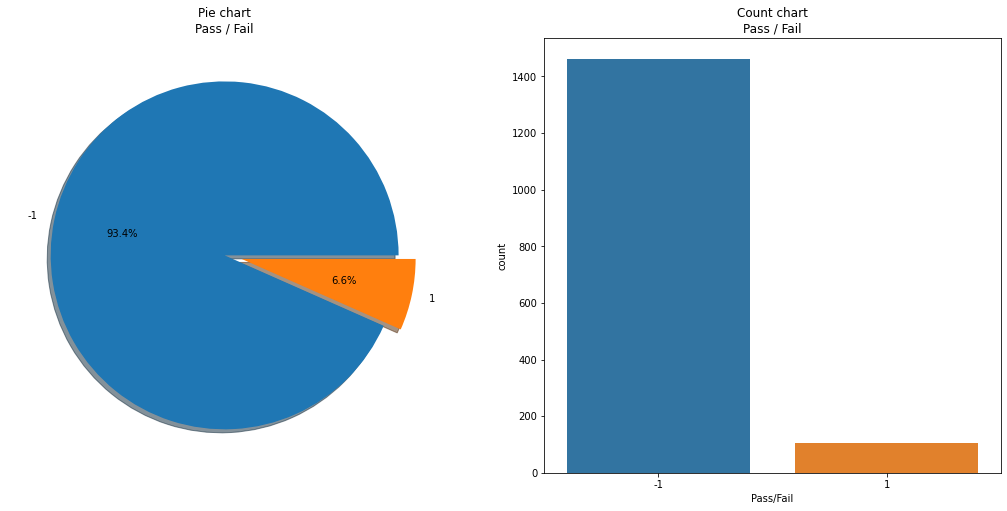

In [3]:
# 데이터의 편향성 (Pass / Fail) 확인을 위한 데이터 시각화 (Seaborn 사용)

# subplot() 을 통해 figure와 axes를 구함
fig, ax = plt.subplots(1, 2, figsize = (18,8))

# 파이 차트 생성 및 라벨링
raw_data['Pass/Fail'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow = True)
ax[0].set_title('Pie chart\nPass / Fail')
ax[0].set_ylabel('')

# Seaborn을 사용하여 countplot 생성
sb.countplot('Pass/Fail', data=raw_data, ax=ax[1])
ax[1].set_title('Count chart\nPass / Fail')

#출력
plt.show()

### 1.2 기술 통계량

In [4]:
# 위에서 Transpose()로 전치시킨 데이터 프레임 출력
raw_data_stat

,count,mean,std,min,25%,50%,75%,max
0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.4900,3056.6500,3356.3500
1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.4050,2538.8225,2846.4400
2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.0667,2218.0555,2315.2667
3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.2144,1591.2235,3715.0417
4,1553.0,4.197013,56.355540,0.6815,1.017700,1.3168,1.5257,1114.5366
...,...,...,...,...,...,...,...,...
586,1566.0,0.021458,0.012358,-0.0169,0.013425,0.0205,0.0276,0.1028
587,1566.0,0.016475,0.008808,0.0032,0.010600,0.0148,0.0203,0.0799
588,1566.0,0.005283,0.002867,0.0010,0.003300,0.0046,0.0064,0.0286
589,1566.0,99.670066,93.891919,0.0000,44.368600,71.9005,114.7497,737.3048


---
# 2. Raw Data Processing

### 2.1 Feature name 변경

In [5]:
# 가독성을 위해 Feature의 이름을 F0, F1, F2 ... F589 으로 변경
raw_data_char = raw_data.loc[:,['Time', 'Pass/Fail']]
raw_data_numb = raw_data.drop(['Time', 'Pass/Fail'], axis=1).add_prefix('F')
raw_data = pd.concat([raw_data_char, raw_data_numb], axis=1)
raw_data.head()

,Time,Pass/Fail,F0,F1,F2,F3,F4,F5,F6,F7,...,F580,F581,F582,F583,F584,F585,F586,F587,F588,F589
0,2008-07-19 11:55,-1,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,2008-07-19 12:32,-1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2008-07-19 13:17,1,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2008-07-19 14:43,-1,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,2008-07-19 15:22,-1,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


<function matplotlib.pyplot.show(close=None, block=None)>

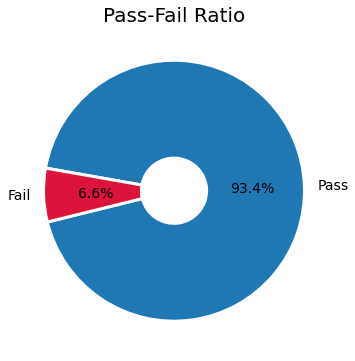

In [6]:
Pass_Fail = raw_data['Pass/Fail'].value_counts().values

ratio = [Pass_Fail[0]/len(raw_data), Pass_Fail[1]/len(raw_data)]
labels = ['Pass', 'Fail']
wedgeprops={'width': 0.75, 'edgecolor': 'w', 'linewidth': 3}
colors = ['tab:blue', 'crimson']
plt.figure(figsize=(6,6))
plt.pie(ratio, labels=labels, autopct='%.1f%%',startangle=170, counterclock=False, 
        wedgeprops=wedgeprops, colors = colors,  textprops={'fontsize': 14})
plt.title('Pass-Fail Ratio', fontsize = 20)

plt.show

### 2.2 통계상 무의미한 Feature 제거

#### 2.2.1 표준편차가 0인 Feature 제거

In [7]:
# 데이터 프레임 전치시키기
data_statistic = raw_data.describe().transpose()
data_statistic[data_statistic['std'] == 0]

,count,mean,std,min,25%,50%,75%,max
F5,1553.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0
F13,1564.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F42,1566.0,70.0,0.0,70.0,70.0,70.0,70.0,70.0
F49,1566.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
F52,1566.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
F534,1558.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F535,1558.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F536,1558.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F537,1558.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 2.2.2 표준편차가 0에 근접한 변수 제거

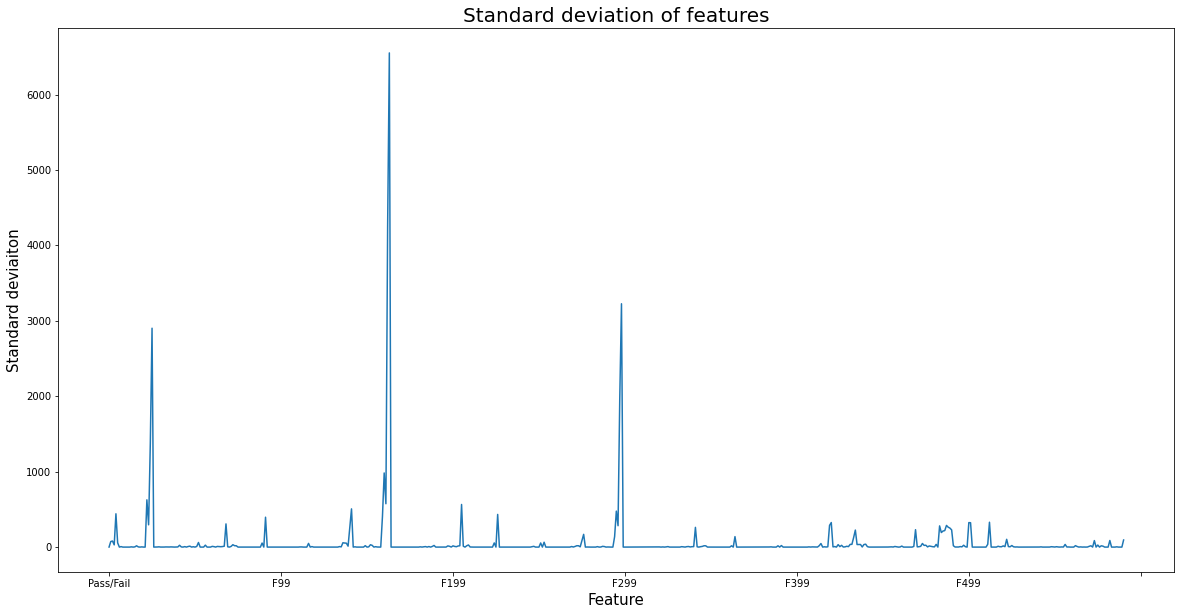

In [8]:
# raw data에 대한 표준편차 분포도
# 정규분포가 필요할까 

plt.rcParams["figure.figsize"] = (20,10)
y = raw_data.std()
y.plot()
plt.title("Standard deviation of features", fontsize = 20)
plt.xlabel("Feature", fontsize = 15)
plt.ylabel("Standard deviaiton", fontsize = 15)
plt.show()

In [9]:
# 표준편차가 0인 116개의 feature들
remove_cols = data_statistic[data_statistic['std'] == 0].index

# 표준 편차가 0인 Feature가 제거된 데이터 프레임
data_refine1 = raw_data.drop(remove_cols, axis=1)
data_refine1.describe()

,Pass/Fail,F0,F1,F2,F3,F4,F6,F7,F8,F9,...,F580,F581,F582,F583,F584,F585,F586,F587,F588,F589
count,1567.000000,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,-0.867262,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,101.112908,0.121822,1.462862,-0.000841,...,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066
std,0.498010,73.621787,80.407705,29.513152,441.691640,56.355540,6.237214,0.008961,0.073897,0.015116,...,0.003116,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919
min,-1.000000,2743.240000,2158.750000,2060.660000,0.000000,0.681500,82.131100,0.000000,1.191000,-0.053400,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,-1.000000,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,97.920000,0.121100,1.411200,-0.010800,...,0.003400,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600
50%,-1.000000,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,101.512200,0.122400,1.461600,-0.001300,...,0.004700,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500
75%,-1.000000,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,104.586700,0.123800,1.516900,0.008400,...,0.006475,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700
max,1.000000,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,129.252200,0.128600,1.656400,0.074900,...,0.028600,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


Text(0, 0.5, 'Standard deviaion')

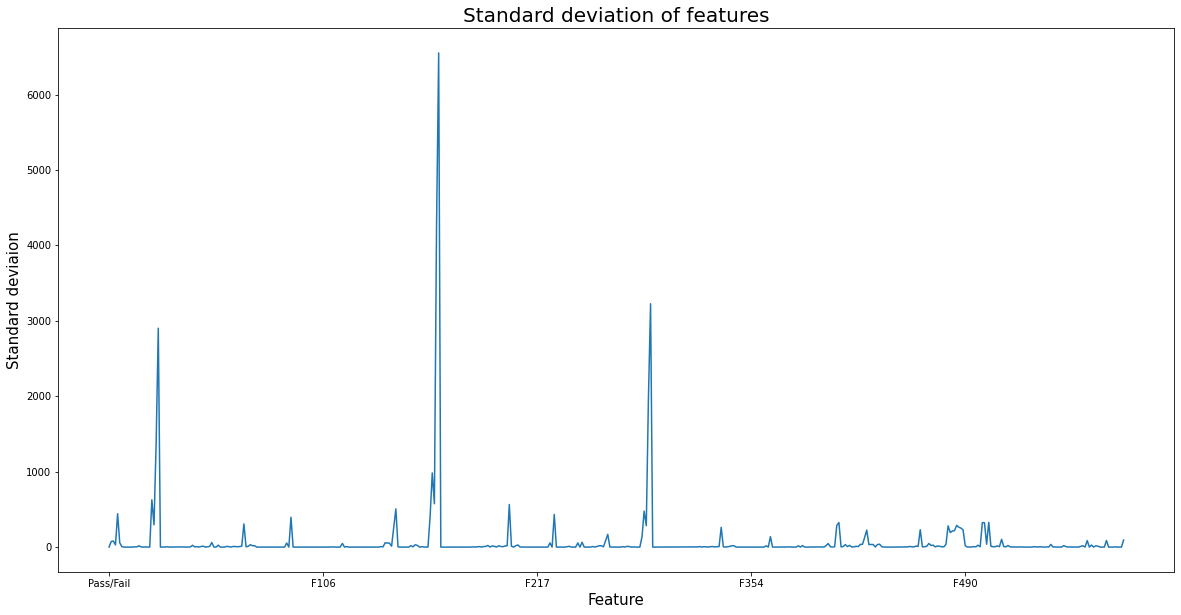

In [10]:
# std 0 제거
y = data_refine1.std()
y.plot()
plt.title("Standard deviation of features", fontsize = 20)
plt.xlabel("Feature", fontsize = 15)
plt.ylabel("Standard deviaion", fontsize = 15)

In [11]:
# 데이터 전치
data_statistic2 = data_refine1.describe().transpose()

# 표준편차가 0.005 이하인 Feature들
remove_list = data_statistic2[(data_statistic2['std'] > 0) & (data_statistic2['std'] < 0.005)].index

# Feature 제거 후 확인 
data_refine2 = data_refine1.drop(remove_list, axis=1)
data_refine2.describe()

,Pass/Fail,F0,F1,F2,F3,F4,F6,F7,F8,F9,...,F576,F577,F578,F579,F581,F583,F585,F586,F587,F589
count,1567.000000,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.000000,1558.000000,1565.000000,1565.000000,...,1567.000000,1567.000000,618.000000,618.000000,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,-0.867262,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,101.112908,0.121822,1.462862,-0.000841,...,5.563747,16.642363,0.021615,0.016829,97.934373,0.015318,3.067826,0.021458,0.016475,99.670066
std,0.498010,73.621787,80.407705,29.513152,441.691640,56.355540,6.237214,0.008961,0.073897,0.015116,...,16.921369,12.485267,0.011730,0.009640,87.520966,0.017180,3.578033,0.012358,0.008808,93.891919
min,-1.000000,2743.240000,2158.750000,2060.660000,0.000000,0.681500,82.131100,0.000000,1.191000,-0.053400,...,0.663600,4.582000,-0.016900,0.003200,0.000000,0.006000,1.197500,-0.016900,0.003200,0.000000
25%,-1.000000,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,97.920000,0.121100,1.411200,-0.010800,...,1.408450,11.501550,0.013800,0.010600,46.184900,0.011600,2.306500,0.013425,0.010600,44.368600
50%,-1.000000,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,101.512200,0.122400,1.461600,-0.001300,...,1.624500,13.817900,0.020400,0.014800,72.288900,0.013800,2.757650,0.020500,0.014800,71.900500
75%,-1.000000,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,104.586700,0.123800,1.516900,0.008400,...,1.902000,17.080900,0.027700,0.020000,116.539150,0.016500,3.295175,0.027600,0.020300,114.749700
max,1.000000,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,129.252200,0.128600,1.656400,0.074900,...,90.423500,96.960100,0.102800,0.079900,737.304800,0.476600,99.303200,0.102800,0.079900,737.304800


Text(0, 0.5, 'Standard ')

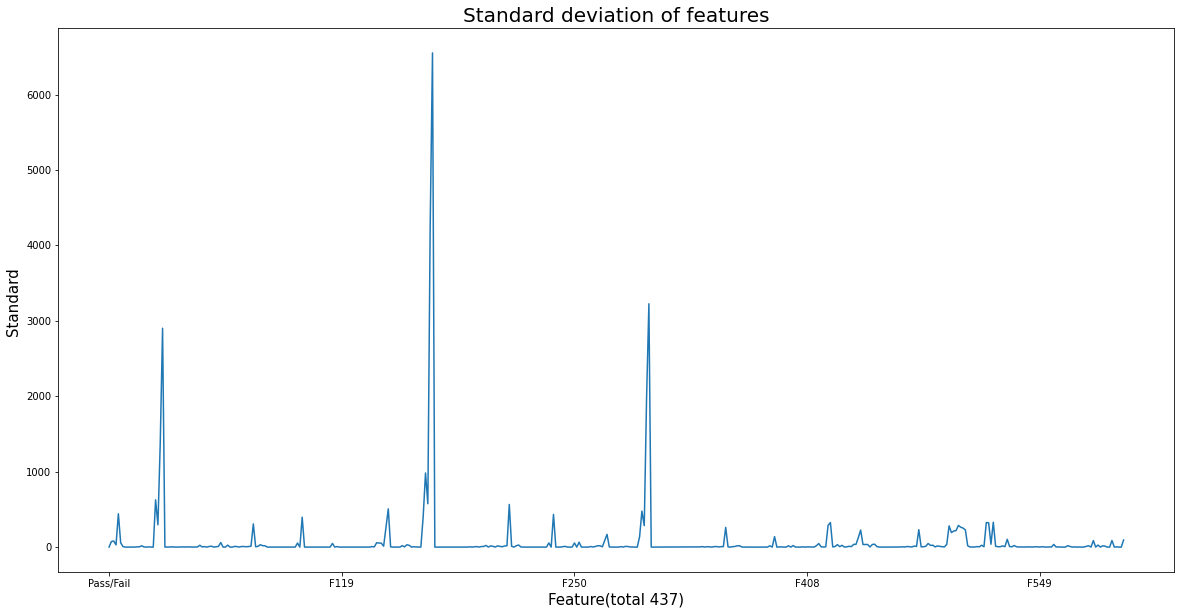

In [12]:
# std 0.005 미만 제거 
y = data_refine2.std()
y.plot()
plt.title("Standard deviation of features", fontsize = 20)
plt.xlabel("Feature(total 437)", fontsize = 15)
plt.ylabel("Standard ", fontsize = 15)

0.005보단 크지만 0에 가까운 표준편차를 가진 값들이 이미 많기 때문에 전후의 그래프 상의 급격한 차이를 기대하기 어려워보임. 다른 방식을 고민해보는것도 좋을 것 같다.

### 2.3 변수 간 상관관계 확인 (다중 공선성)
#### 독립 변수 간 상관관계가 높으면 정확한 선형 회귀 예측이 불가능하다.

In [13]:
# Feature간 상관관계를 일일히 확인하기 위한 작업
corr_data = data_refine2.corr()
corr_data

,Pass/Fail,F0,F1,F2,F3,F4,F6,F7,F8,F9,...,F576,F577,F578,F579,F581,F583,F585,F586,F587,F589
Pass/Fail,1.000000,-0.025144,-0.002615,-0.000957,-0.024631,-0.013760,0.016244,0.012993,0.028018,-0.031192,...,-0.028488,-0.049633,0.013944,0.040198,-0.020748,0.005981,0.005034,0.004157,0.035392,-0.002654
F0,-0.025144,1.000000,-0.145071,0.004775,-0.007655,-0.011047,0.002281,0.031510,-0.052731,0.009052,...,0.013230,0.008603,-0.033438,-0.070715,-0.028380,0.023469,0.023605,0.018472,-0.025909,0.004177
F1,-0.002615,-0.145071,1.000000,0.005802,-0.007603,-0.001641,-0.025702,-0.012084,0.031321,0.024015,...,0.002570,-0.010149,-0.018035,0.075029,0.083463,0.002905,0.002273,-0.009417,0.017290,0.044834
F2,-0.000957,0.004775,0.005802,1.000000,0.298935,0.095891,-0.136225,-0.273970,0.023609,0.016291,...,0.002593,-0.028713,-0.030516,-0.025474,-0.010759,0.015711,0.015765,-0.025548,-0.029479,-0.033226
F3,-0.024631,-0.007655,-0.007603,0.298935,1.000000,-0.058483,-0.685835,0.138290,-0.103656,0.068998,...,0.008218,0.016443,0.020209,-0.069807,-0.096619,0.025461,0.026043,0.034779,-0.039309,-0.081157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F583,0.005981,0.023469,0.002905,0.015711,0.025461,-0.001301,-0.039453,0.010284,0.017395,-0.036059,...,-0.017316,-0.023993,0.017818,-0.005231,0.000896,1.000000,0.999890,0.002257,-0.002650,-0.003008
F585,0.005034,0.023605,0.002273,0.015765,0.026043,-0.001617,-0.039569,0.010345,0.017930,-0.036132,...,-0.017148,-0.023925,0.018874,-0.005748,-0.000673,0.999890,1.000000,0.002744,-0.002931,-0.003801
F586,0.004157,0.018472,-0.009417,-0.025548,0.034779,-0.044016,-0.041296,0.058171,0.010436,0.033759,...,-0.009905,-0.002684,1.000000,0.246119,-0.475397,0.002257,0.002744,1.000000,0.167913,-0.486559
F587,0.035392,-0.025909,0.017290,-0.029479,-0.039309,-0.031145,0.034184,-0.021472,0.022853,0.059341,...,-0.001723,-0.009405,0.246119,1.000000,0.396369,-0.002650,-0.002931,0.167913,1.000000,0.390813


<function matplotlib.pyplot.show(close=None, block=None)>

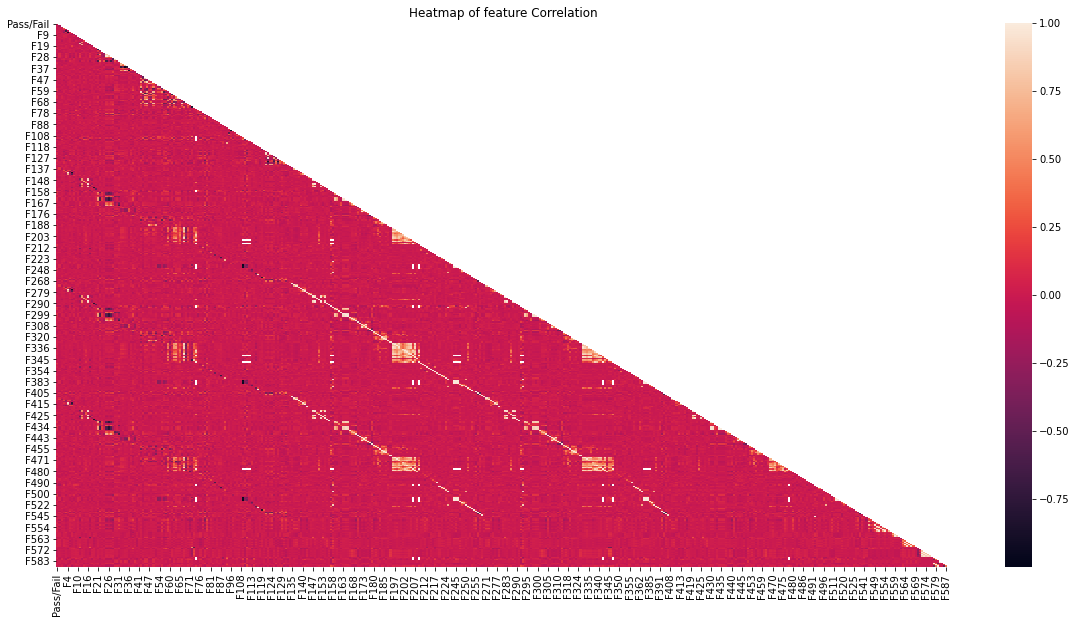

In [14]:
# 정제 전 히트맵 --> 다중 공선성과 관련하여서 히트맵이 가장 유용하다고 생각
# 그러나 소수의 feature일 때의 얘기이고 feature수가 많아지면 과연 좋은 방식인가 고민이 됨
# 단순한 도표로 보여주는건 어떠한가
# 아니면 상관관계가 이렇게 되어있다 라는 식으로 설명

mask = np.zeros_like(corr_data)

mask[np.triu_indices_from(mask)] = True

sb.heatmap(corr_data, mask = mask)
plt.title('Heatmap of feature Correlation')
plt.show

In [15]:
corr_data_nan = corr_data[corr_data > abs(0.8)]
corr_data_nan

,Pass/Fail,F0,F1,F2,F3,F4,F6,F7,F8,F9,...,F576,F577,F578,F579,F581,F583,F585,F586,F587,F589
Pass/Fail,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.00000,0.99989,NaN,NaN,NaN
F585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.99989,1.00000,NaN,NaN,NaN
F586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
F587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

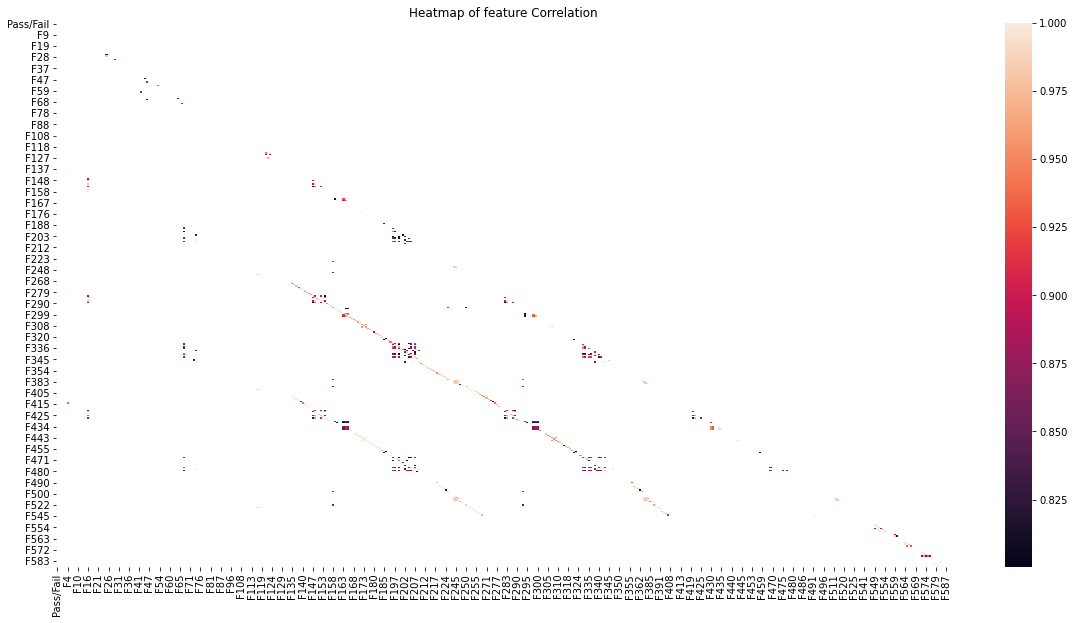

In [16]:
# 정제 전 correlation 0.8 이상의 heatmap
# 위에 것과 크게 다르지 않다고 봄

mask = np.zeros_like(corr_data_nan.corr())
mask[np.triu_indices_from(mask)] = True
sb.heatmap(corr_data_nan, mask = mask)
plt.title('Heatmap of feature Correlation')
plt.show

In [17]:
# 다중공선성이 높은 Feature를 찾는 과정
col_names = list(corr_data_nan)
row_names = list(corr_data_nan.index)
result = []

for i in range(0, len(col_names)):
    for j in range(0, len(row_names)):
        temp = []
        if((corr_data_nan[col_names[i]][row_names[j]] > 0.8) and (corr_data_nan[col_names[i]][row_names[j]])):
            temp.append(col_names[i])
            temp.append(row_names[j])
            temp.append(corr_data_nan[col_names[i]][row_names[j]])
            result.append(temp)

result = result[1:]
result

[['F0', 'F0', 1.0],
 ['F1', 'F1', 1.0],
 ['F2', 'F2', 1.0],
 ['F3', 'F3', 1.0],
 ['F4', 'F4', 1.0],
 ['F4', 'F140', 0.9999751247610738],
 ['F4', 'F275', 0.9999755698304479],
 ['F4', 'F413', 0.9384157839693644],
 ['F6', 'F6', 1.0],
 ['F7', 'F7', 1.0],
 ['F8', 'F8', 1.0],
 ['F9', 'F9', 1.0],
 ['F10', 'F10', 1.0],
 ['F11', 'F11', 1.0],
 ['F12', 'F12', 1.0],
 ['F14', 'F14', 1.0],
 ['F15', 'F15', 1.0],
 ['F16', 'F16', 1.0],
 ['F16', 'F147', 0.8856944709713139],
 ['F16', 'F148', 0.9702942514604942],
 ['F16', 'F152', 0.9775661160561909],
 ['F16', 'F154', 0.8736683117857272],
 ['F16', 'F282', 0.8847738822048031],
 ['F16', 'F283', 0.9713242452185902],
 ['F16', 'F287', 0.9776476351736364],
 ['F16', 'F289', 0.87713123008573],
 ['F16', 'F420', 0.8963185589448716],
 ['F16', 'F421', 0.9630499264468172],
 ['F16', 'F425', 0.9367395458941121],
 ['F16', 'F427', 0.8934125804427401],
 ['F17', 'F17', 1.0],
 ['F18', 'F18', 1.0],
 ['F19', 'F19', 1.0],
 ['F20', 'F20', 1.0],
 ['F21', 'F21', 1.0],
 ['F22', 'F22

In [18]:
# 데이터 정제 과정
result = pd.DataFrame(result)
result = result.drop_duplicates([2], keep='first')

x = result[0].value_counts()
xd = pd.DataFrame(x)

y = result[1].value_counts()
yd = pd.DataFrame(y)

z = pd.concat([xd, yd], ignore_index=True, axis=1)
z = z.fillna(0)

z['sum'] = z[0]+z[1]
z = z.sort_values(by=['sum'], axis=0, ascending=False)
z

,0,1,sum
F479,0.0,19.0,19.0
F207,12.0,7.0,19.0
F196,17.0,1.0,18.0
F199,15.0,3.0,18.0
F197,14.0,2.0,16.0
...,...,...,...
F217,1.0,0.0,1.0
F153,1.0,0.0,1.0
F146,1.0,0.0,1.0
F324,0.0,1.0,1.0


In [19]:
# 다중 공선성이 높은 30개 제거
## 이 부분은 보완이 필요할 것 같습니다.
choose = []
for i in range(0, 30):
    choose.append(list(z.index)[i])
choose

['F479',
 'F207',
 'F196',
 'F199',
 'F197',
 'F477',
 'F205',
 'F67',
 'F343',
 'F469',
 'F341',
 'F336',
 'F332',
 'F333',
 'F335',
 'F340',
 'F204',
 'F154',
 'F287',
 'F427',
 'F16',
 'F431',
 'F425',
 'F147',
 'F164',
 'F421',
 'F420',
 'F430',
 'F289',
 'F148']

In [20]:
data_refine2 = data_refine2.drop(choose, axis=1)
data_refine2.describe()

,Pass/Fail,F0,F1,F2,F3,F4,F6,F7,F8,F9,...,F576,F577,F578,F579,F581,F583,F585,F586,F587,F589
count,1567.000000,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.000000,1558.000000,1565.000000,1565.000000,...,1567.000000,1567.000000,618.000000,618.000000,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,-0.867262,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,101.112908,0.121822,1.462862,-0.000841,...,5.563747,16.642363,0.021615,0.016829,97.934373,0.015318,3.067826,0.021458,0.016475,99.670066
std,0.498010,73.621787,80.407705,29.513152,441.691640,56.355540,6.237214,0.008961,0.073897,0.015116,...,16.921369,12.485267,0.011730,0.009640,87.520966,0.017180,3.578033,0.012358,0.008808,93.891919
min,-1.000000,2743.240000,2158.750000,2060.660000,0.000000,0.681500,82.131100,0.000000,1.191000,-0.053400,...,0.663600,4.582000,-0.016900,0.003200,0.000000,0.006000,1.197500,-0.016900,0.003200,0.000000
25%,-1.000000,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,97.920000,0.121100,1.411200,-0.010800,...,1.408450,11.501550,0.013800,0.010600,46.184900,0.011600,2.306500,0.013425,0.010600,44.368600
50%,-1.000000,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,101.512200,0.122400,1.461600,-0.001300,...,1.624500,13.817900,0.020400,0.014800,72.288900,0.013800,2.757650,0.020500,0.014800,71.900500
75%,-1.000000,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,104.586700,0.123800,1.516900,0.008400,...,1.902000,17.080900,0.027700,0.020000,116.539150,0.016500,3.295175,0.027600,0.020300,114.749700
max,1.000000,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,129.252200,0.128600,1.656400,0.074900,...,90.423500,96.960100,0.102800,0.079900,737.304800,0.476600,99.303200,0.102800,0.079900,737.304800


### 2.4 결측치 처리
#### 2.4.1 결측치가 50% 이상인 Feature 제거

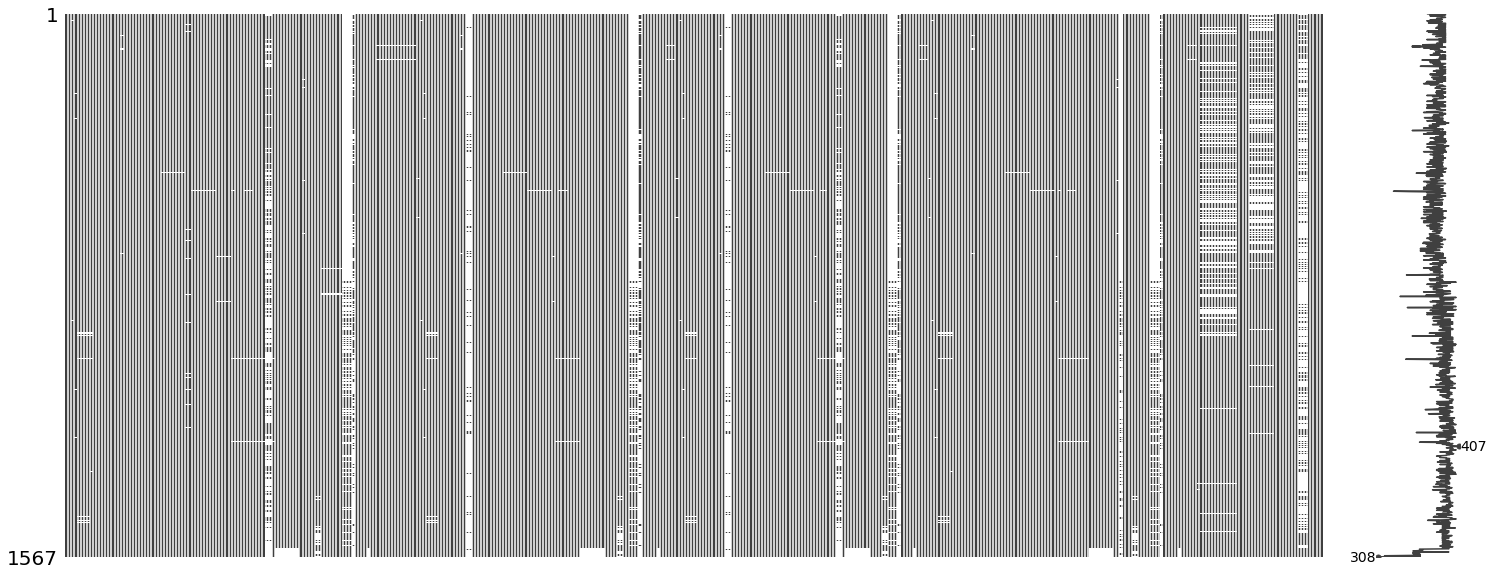

In [21]:
import missingno as msno
msno.matrix(data_refine2)
plt.show()

In [22]:
# 결측치 비율 확인
null_features = data_refine2.isnull().sum()
null_data = pd.DataFrame(null_features)
null_data['null_percent'] = (null_data[0] / len(data_refine2.index)) *100
null_data

,0,null_percent
Time,0,0.000000
Pass/Fail,0,0.000000
F0,6,0.382897
F1,7,0.446713
F2,14,0.893427
...,...,...
F583,1,0.063816
F585,1,0.063816
F586,1,0.063816
F587,1,0.063816


In [23]:
# 결측치가 50% 이상인 Feature 확인
remove_over_null = null_data[null_data['null_percent']>0.5].index
remove_over_null

Index(['F2', 'F3', 'F4', 'F6', 'F7', 'F19', 'F40', 'F41', 'F72', 'F73',
       ...
       'F563', 'F564', 'F565', 'F566', 'F567', 'F568', 'F569', 'F578', 'F579',
       'F581'],
      dtype='object', length=140)

In [24]:
# 결측치 50% 이상인 Feature 제거 후 확인
data_refine3 = data_refine2.drop(remove_over_null, axis=1)
data_refine3.isnull().sum()

Time         0
Pass/Fail    0
F0           6
F1           7
F8           2
            ..
F583         1
F585         1
F586         1
F587         1
F589         1
Length: 268, dtype: int64

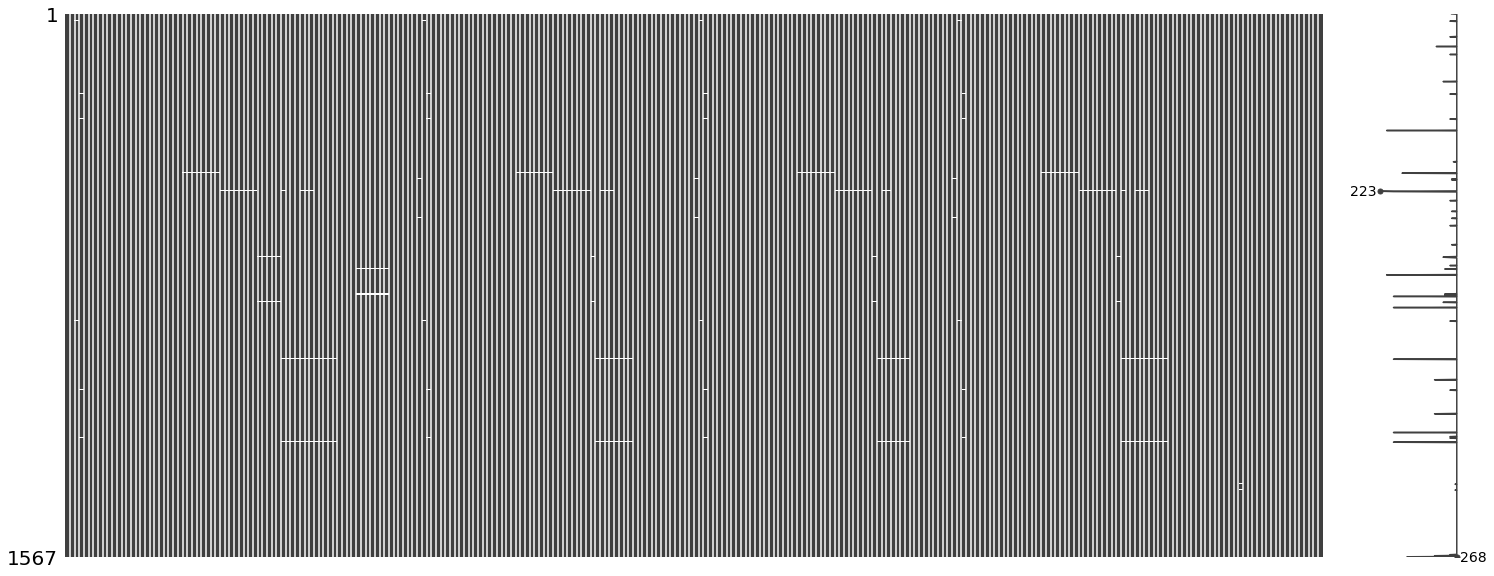

In [25]:
msno.matrix(data_refine3)
plt.show()

In [26]:
data_refine3 = data_refine3.drop(['Time'], axis=1)
data_refine3

,Pass/Fail,F0,F1,F8,F9,F10,F11,F12,F14,F15,...,F573,F574,F575,F576,F577,F583,F585,F586,F587,F589
0,-1,3030.93,2564.00,1.5005,0.0162,-0.0034,0.9455,202.4396,7.9558,414.8710,...,0.3157,3.0624,0.1026,1.6765,14.9509,0.0118,2.3630,NaN,NaN,NaN
1,-1,3095.78,2465.14,1.4966,-0.0005,-0.0148,0.9627,200.5470,10.1548,414.7347,...,0.2653,2.0111,0.0772,1.1065,10.9003,0.0223,4.4447,0.0096,0.0201,208.2045
2,1,2932.61,2559.94,1.4436,0.0041,0.0013,0.9615,202.0179,9.5157,416.7075,...,0.1882,4.0923,0.0640,2.0952,9.2721,0.0157,3.1745,0.0584,0.0484,82.8602
3,-1,2988.72,2479.90,1.4882,-0.0124,-0.0033,0.9629,201.8482,9.6052,422.2894,...,0.1738,2.8971,0.0525,1.7585,8.5831,0.0103,2.0544,0.0202,0.0149,73.8432
4,-1,3032.24,2502.87,1.5031,-0.0031,-0.0072,0.9569,201.9424,10.5661,420.5925,...,0.2224,3.1776,0.0706,1.6597,10.9698,0.4766,99.3032,0.0202,0.0149,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,-1,2899.41,2464.36,1.3424,-0.0045,-0.0057,0.9579,203.9867,11.7692,419.3404,...,0.2363,2.6401,0.0785,1.4879,11.7256,0.0143,2.8669,0.0068,0.0138,203.1720
1563,-1,3052.31,2522.55,1.4333,-0.0061,-0.0093,0.9618,204.0173,9.1620,405.8178,...,0.3891,1.9077,0.1213,1.0187,17.8379,0.0131,2.6238,0.0068,0.0138,203.1720
1564,-1,2978.81,2379.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.4154,2.1760,0.1352,1.2237,17.7267,0.0153,3.0590,0.0197,0.0086,43.5231
1565,-1,2894.92,2532.01,1.4622,-0.0072,0.0032,0.9694,197.2448,9.7354,401.9153,...,0.3669,3.2524,0.1040,1.7085,19.2104,0.0178,3.5662,0.0262,0.0245,93.4941


#### 2.4.2 결측치 보정 (다중 대치법 - bayesian ridge 사용)

In [27]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

### 이 부분도 수정이 필요한 것 같습니다.
data_refine4 = pd.DataFrame(IterativeImputer(verbose=False).fit_transform(data_refine3))

c:\users\hwang tae young\appdata\local\programs\python\python39\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [28]:
# 결측치 보정된 데이터 확인
data_refine4.columns = data_refine3.columns
data_refine4.describe()

,Pass/Fail,F0,F1,F8,F9,F10,F11,F12,F14,F15,...,F573,F574,F575,F576,F577,F583,F585,F586,F587,F589
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,-0.867262,3014.406123,2495.839141,1.462786,-0.000839,0.000145,0.964356,199.956634,9.006573,413.085394,...,0.345636,9.162315,0.104729,5.563747,16.642363,0.015318,3.067862,0.021459,0.016474,99.670671
std,0.498010,73.488134,80.229521,0.073891,0.015107,0.009296,0.012445,3.255199,2.794070,17.205081,...,0.248478,26.920150,0.067791,16.921369,12.485267,0.017174,3.576891,0.012354,0.008805,93.861939
min,-1.000000,2743.240000,2158.750000,1.191000,-0.053400,-0.034900,0.655400,182.094000,2.249300,333.448600,...,0.066700,1.039500,0.023000,0.663600,4.582000,0.006000,1.197500,-0.016900,0.003200,0.000000
25%,-1.000000,2966.665000,2452.885000,1.411100,-0.010800,-0.005600,0.958100,198.130950,7.096750,406.131000,...,0.242250,2.567850,0.075100,1.408450,11.501550,0.011600,2.306500,0.013450,0.010600,44.368600
50%,-1.000000,3011.270000,2499.040000,1.461500,-0.001300,0.000400,0.965800,199.537100,8.973900,412.209700,...,0.293400,2.975800,0.089500,1.624500,13.817900,0.013800,2.757700,0.020500,0.014800,72.023000
75%,-1.000000,3056.540000,2538.745000,1.516850,0.008400,0.005900,0.971300,202.006750,10.858700,419.082800,...,0.366900,3.492500,0.112150,1.902000,17.080900,0.016500,3.294950,0.027600,0.020300,114.749700
max,1.000000,3356.350000,2846.440000,1.656400,0.074900,0.053000,0.984800,272.045100,19.546500,824.927100,...,2.196700,170.020400,0.550200,90.423500,96.960100,0.476600,99.303200,0.102800,0.079900,737.304800


### 2.5 이상치 보정
#### 2.5.1 이상치 확인

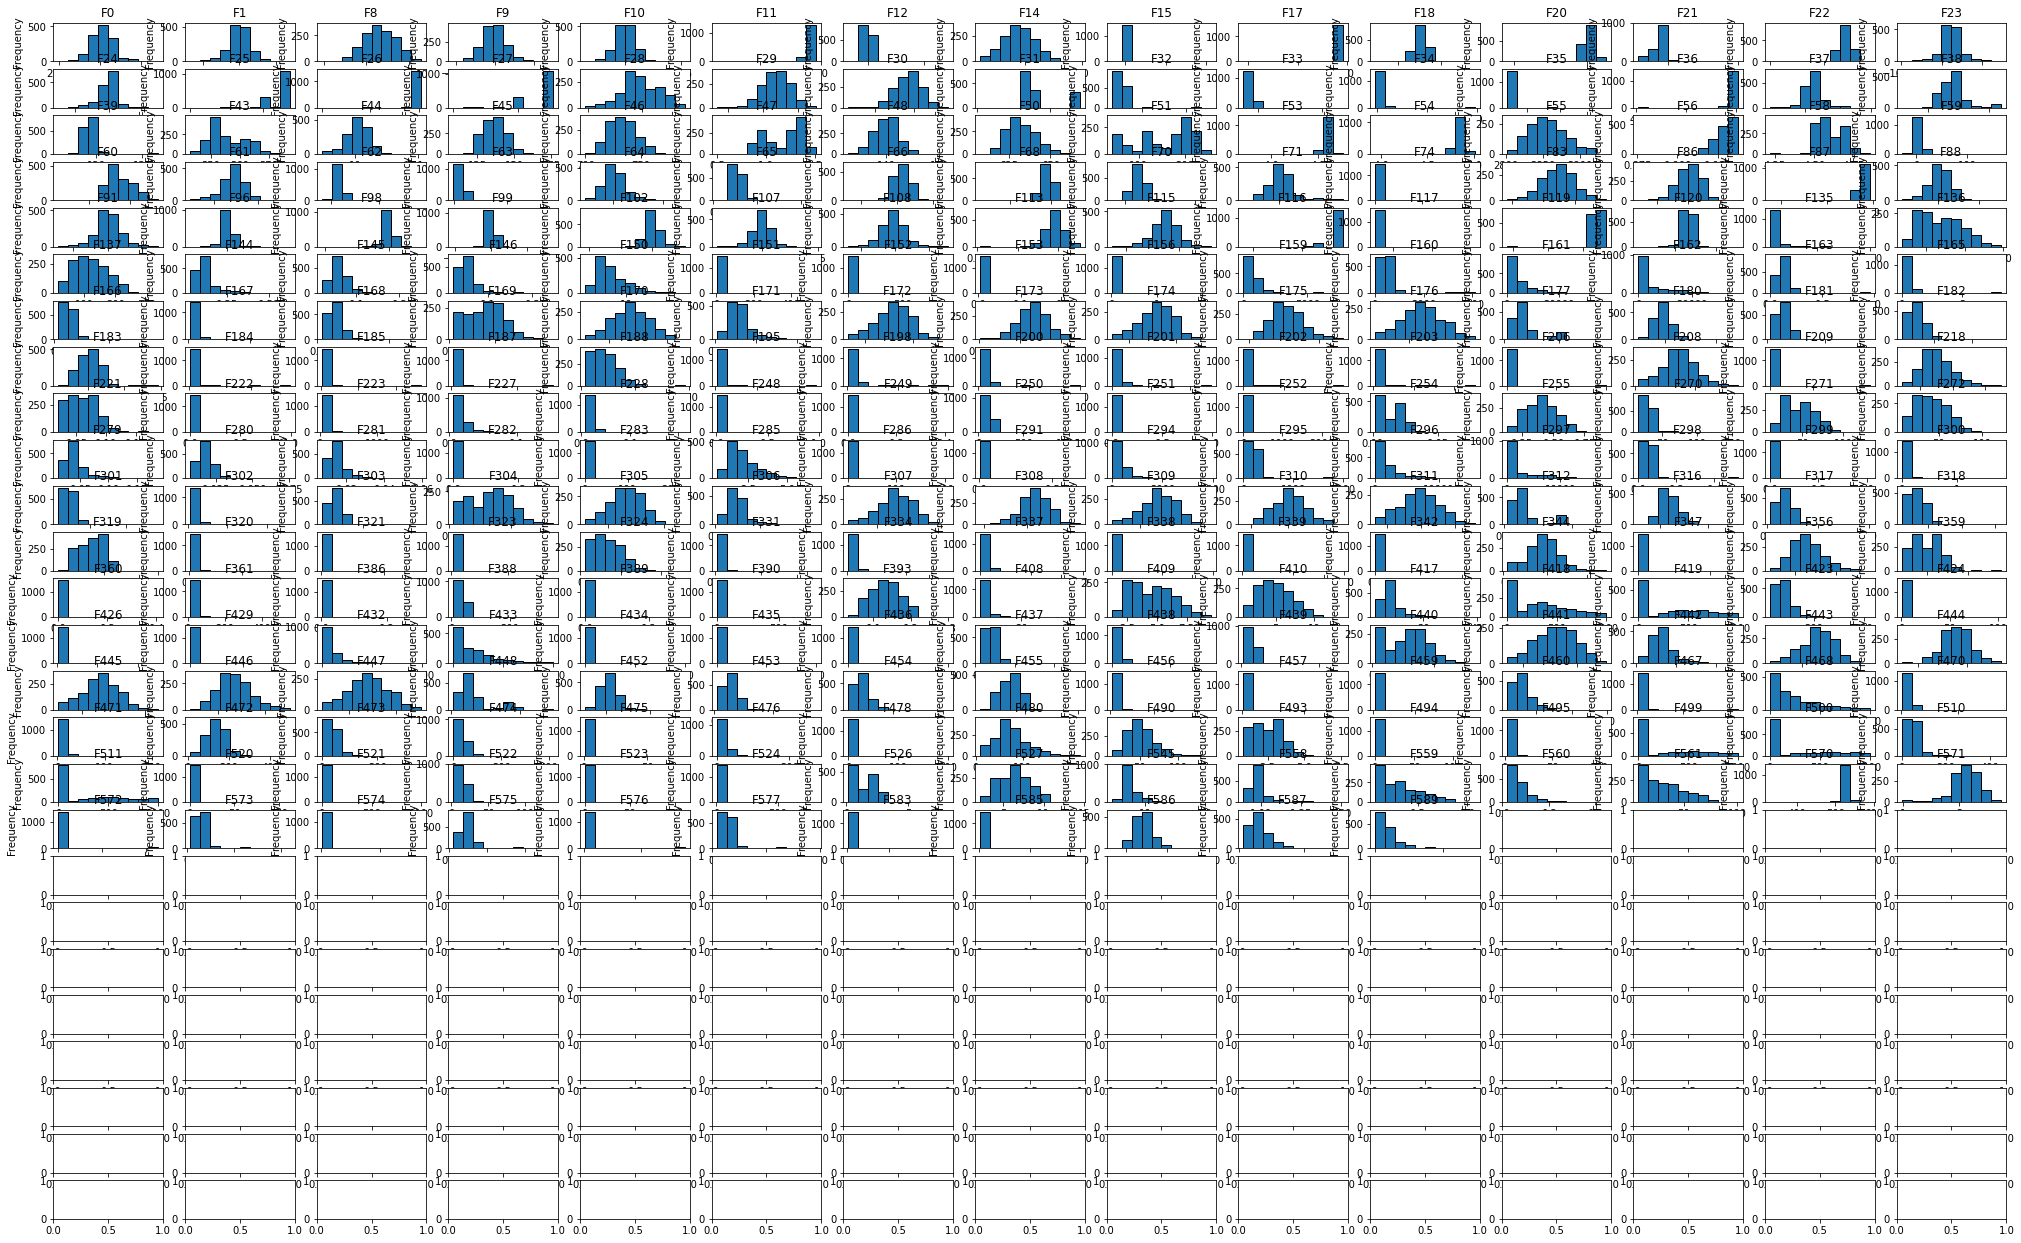

In [29]:
# Pass / Fail에 대한 Feature가 불균형한 형태이므로 (오버샘플링 이전) 나누어 진행
fail_data = data_refine4[data_refine4['Pass/Fail'] == 1]
pass_data = data_refine4[data_refine4['Pass/Fail'] == -1]

# 본격적으로 보정하기 전에 인덱스 제거
list_of_col = list(data_refine4.columns)
list_of_col.remove('Pass/Fail')

# 이상치 확인을 위한 시각화 진행
## 이 부분도 수정이 필요해 보입니다 (상수 말고 다른 내용을 넣어야 할 듯..?)
fig, ax = plt.subplots(26, 15)
fig.set_size_inches(35,22)

# Pass 먼저 
for var, subplot in zip(list_of_col, ax.flatten()):
    pass_data[var].plot(kind='hist', ax=subplot, title=var, edgecolor='black')

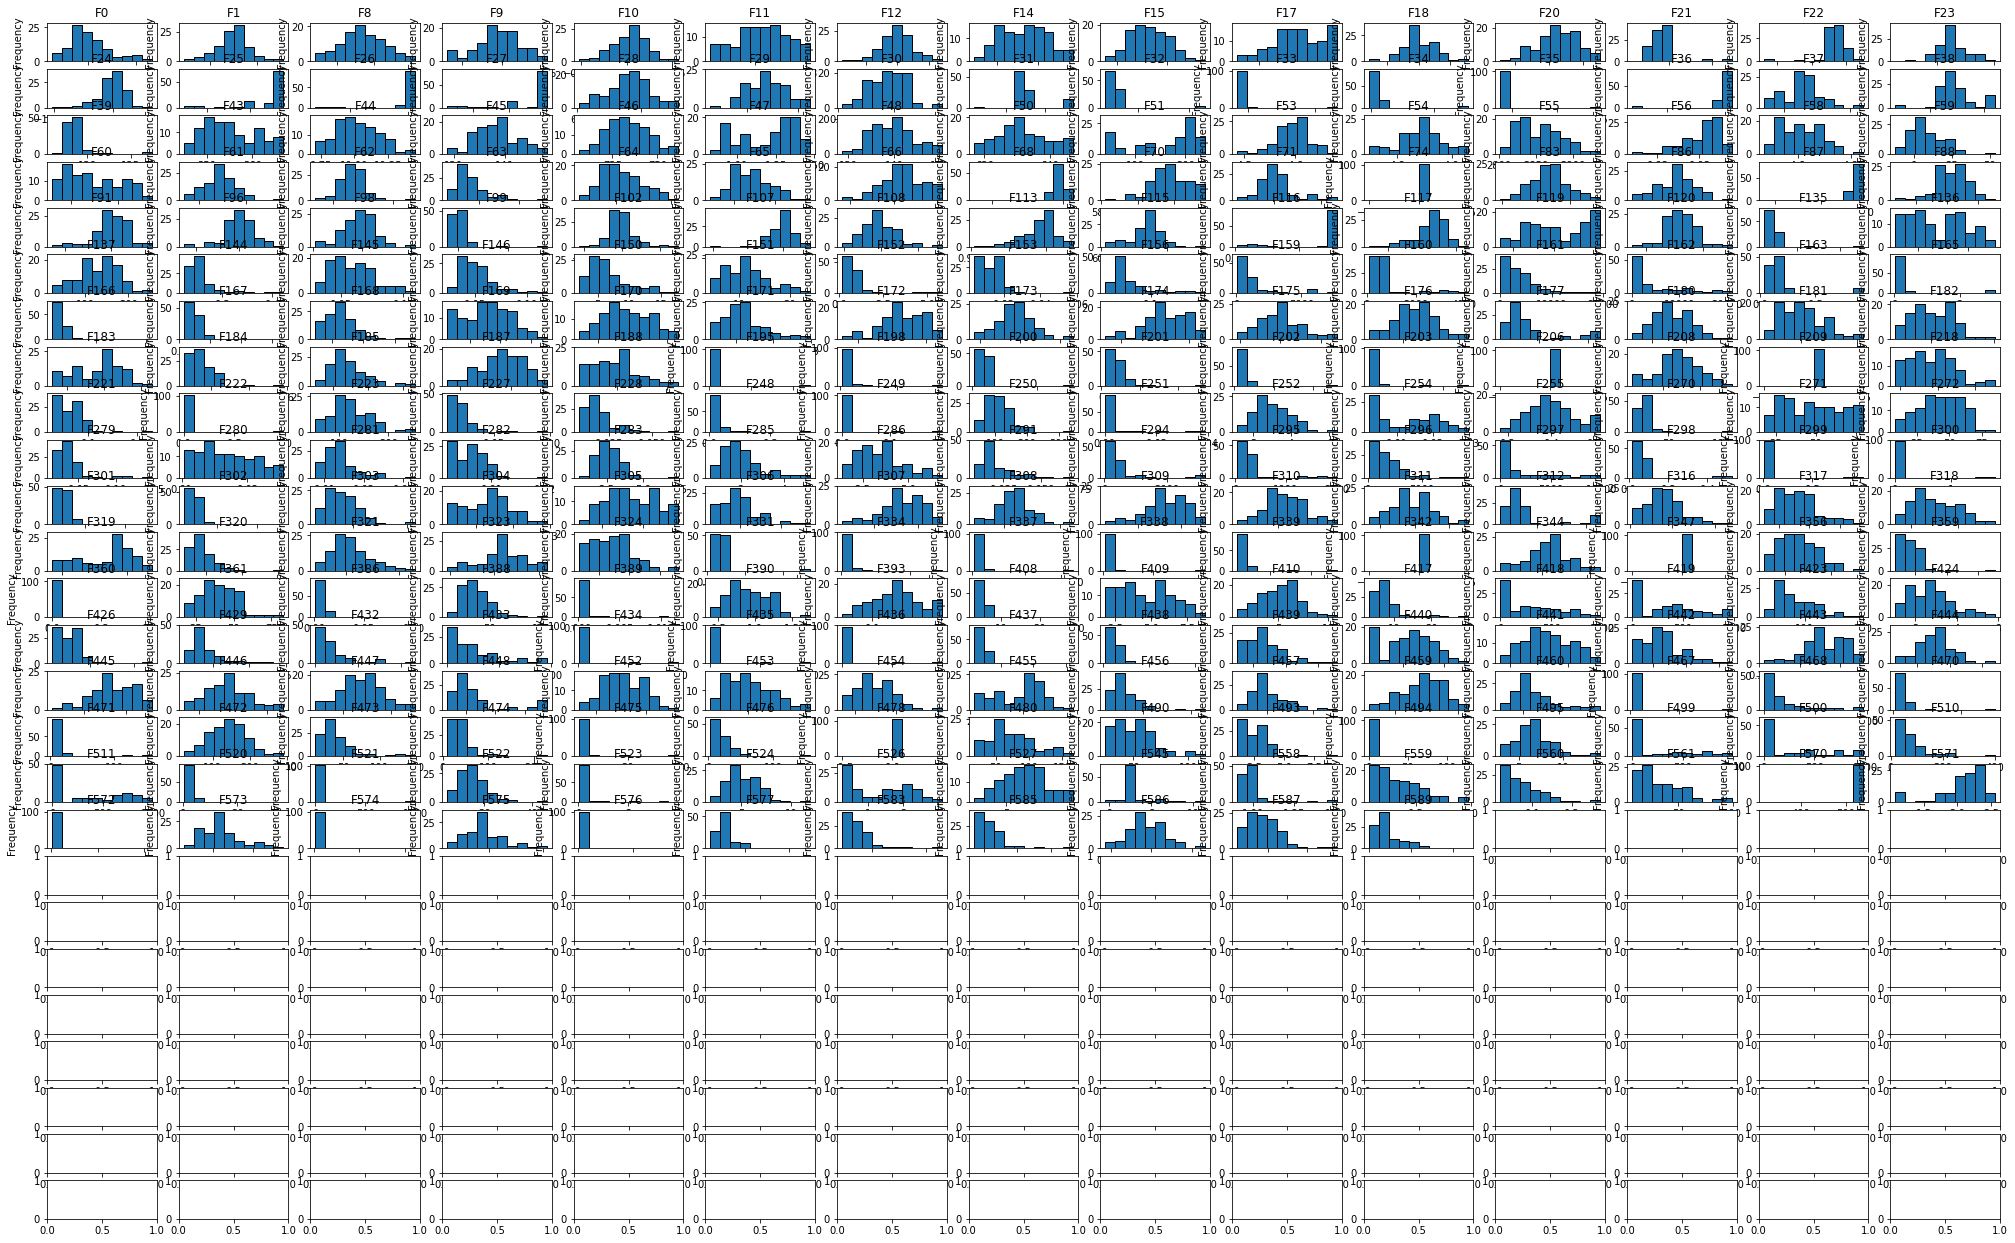

In [30]:
# Fail 차례
fig, ax = plt.subplots(26,15)
fig.set_size_inches((35,22))

for var, subplot in zip(list_of_col, ax.flatten()):
    fail_data[var].plot(kind='hist', ax = subplot, title=var, edgecolor='black')

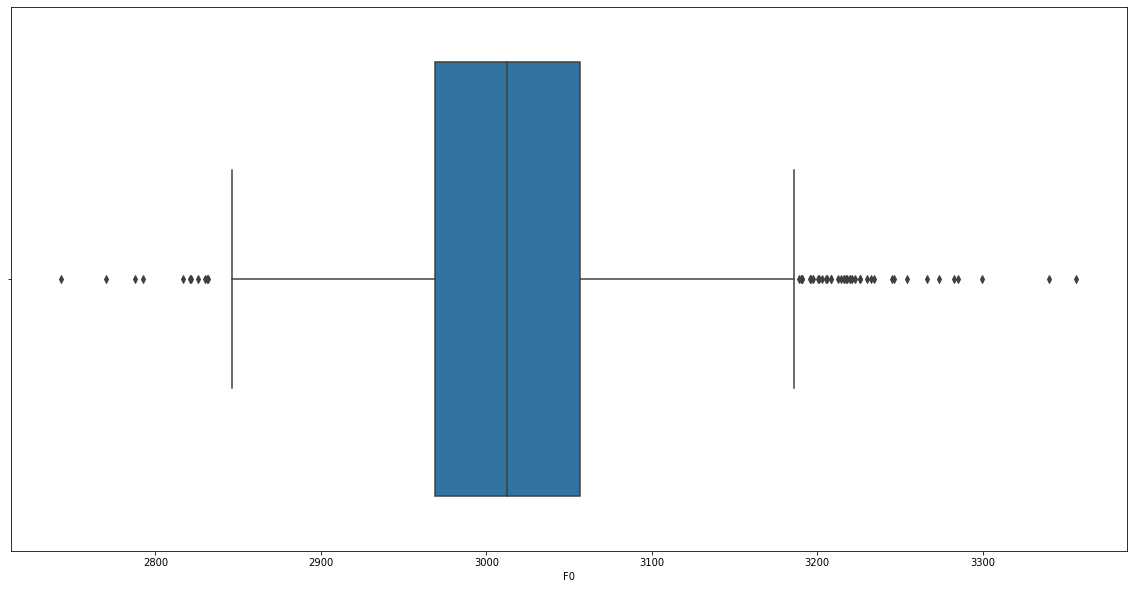

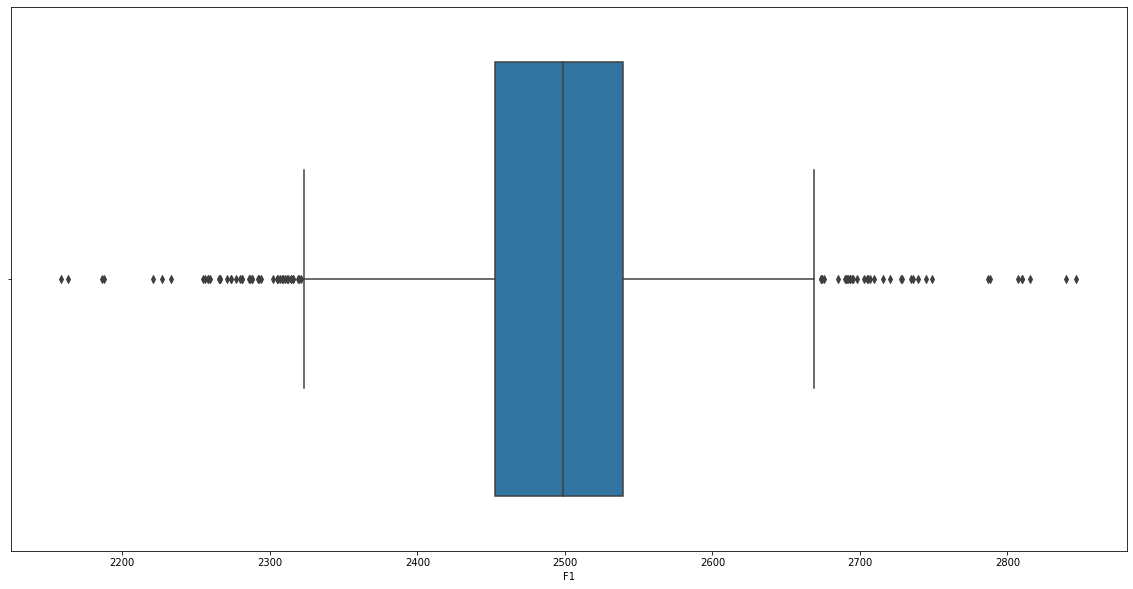

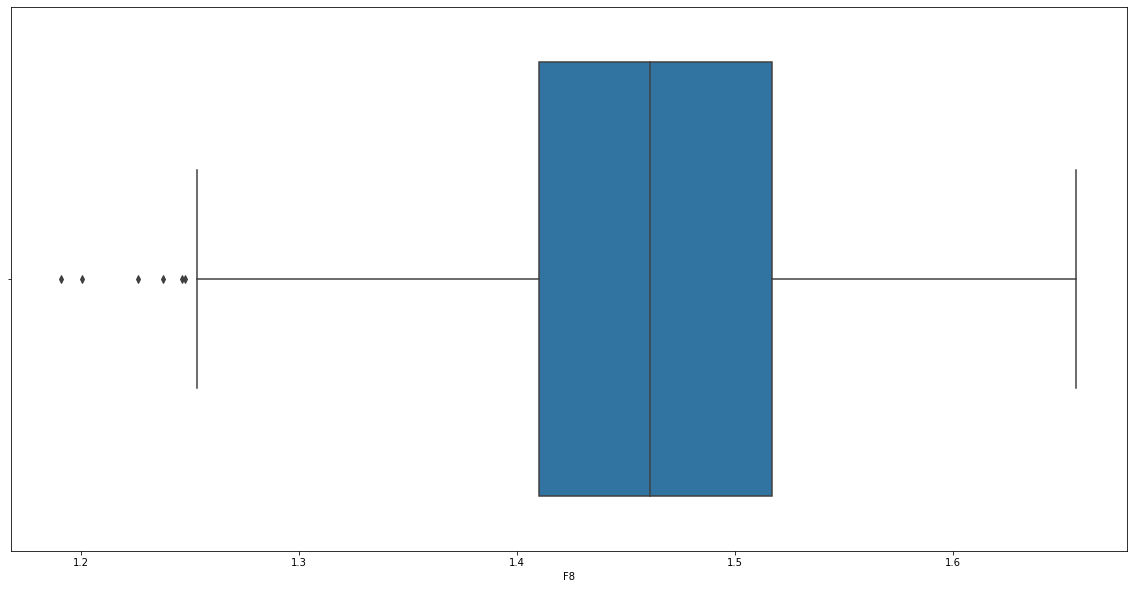

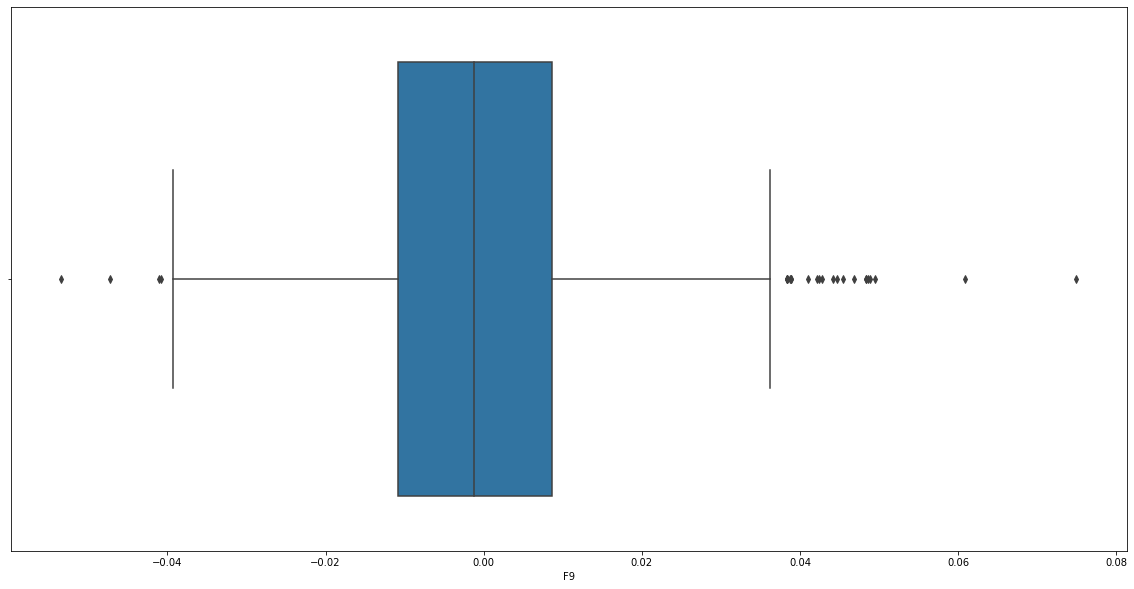

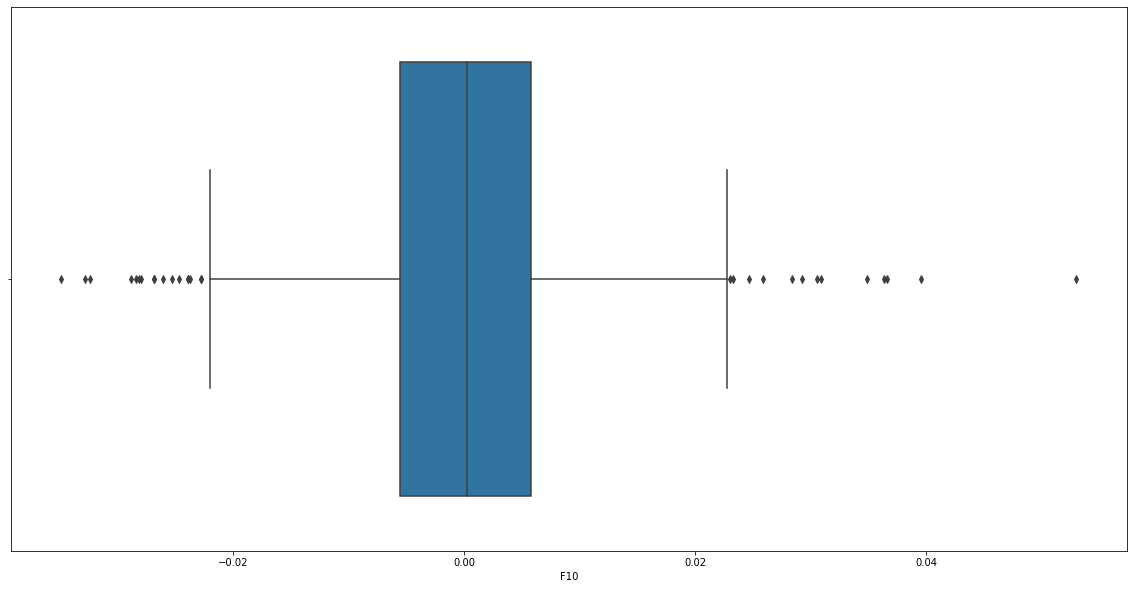

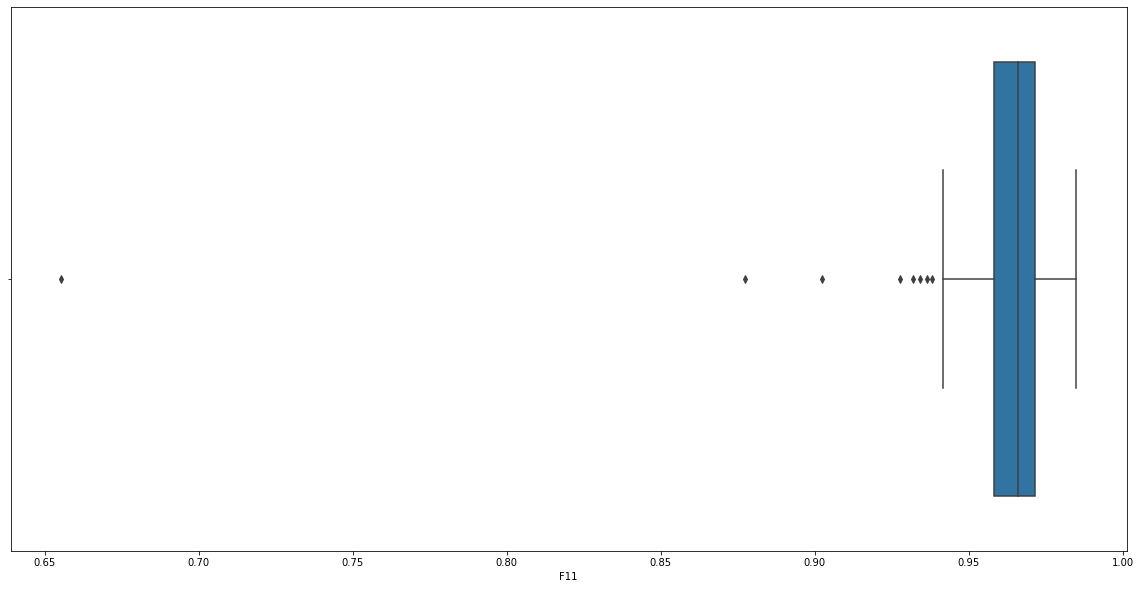

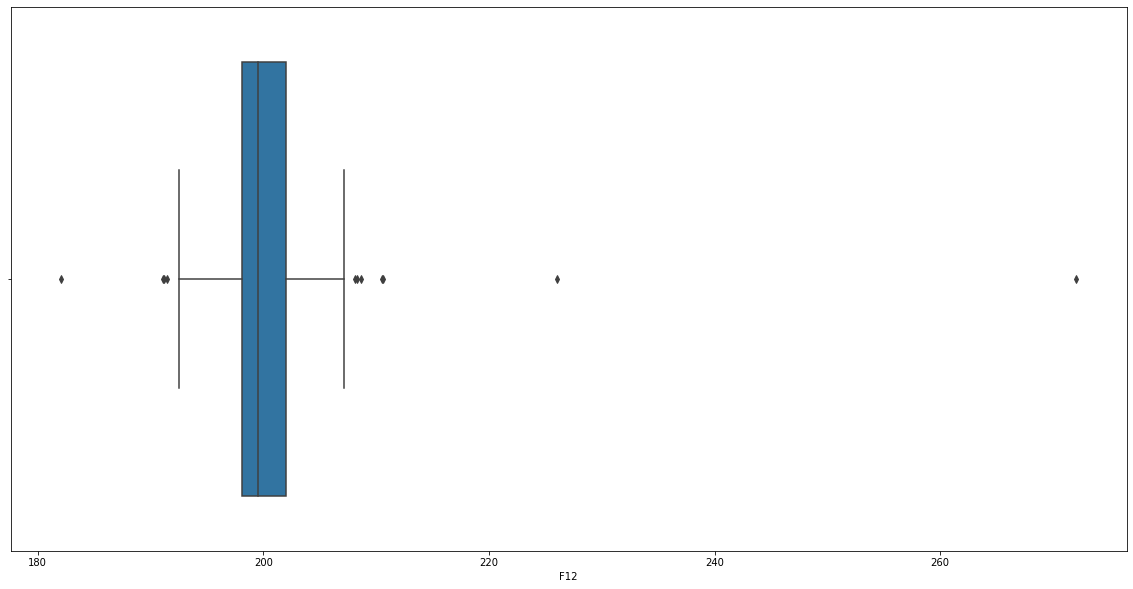

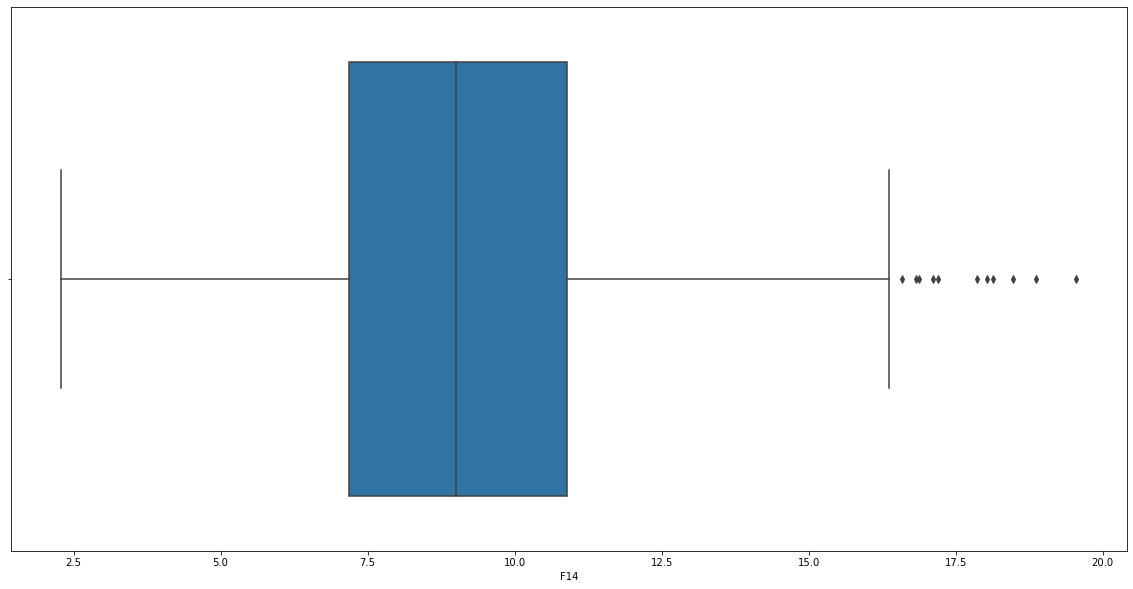

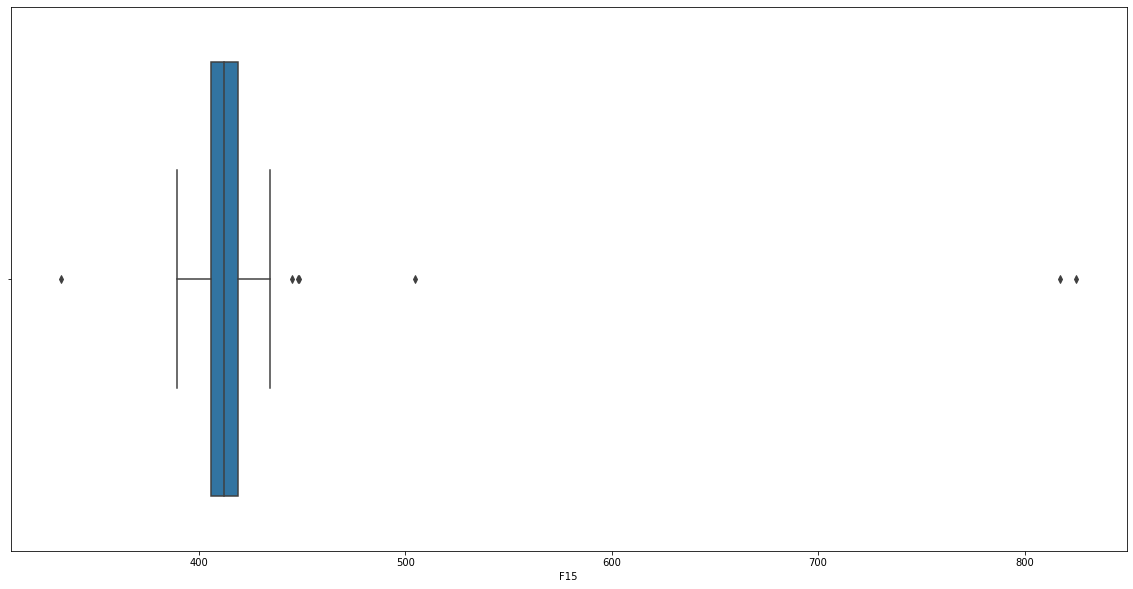

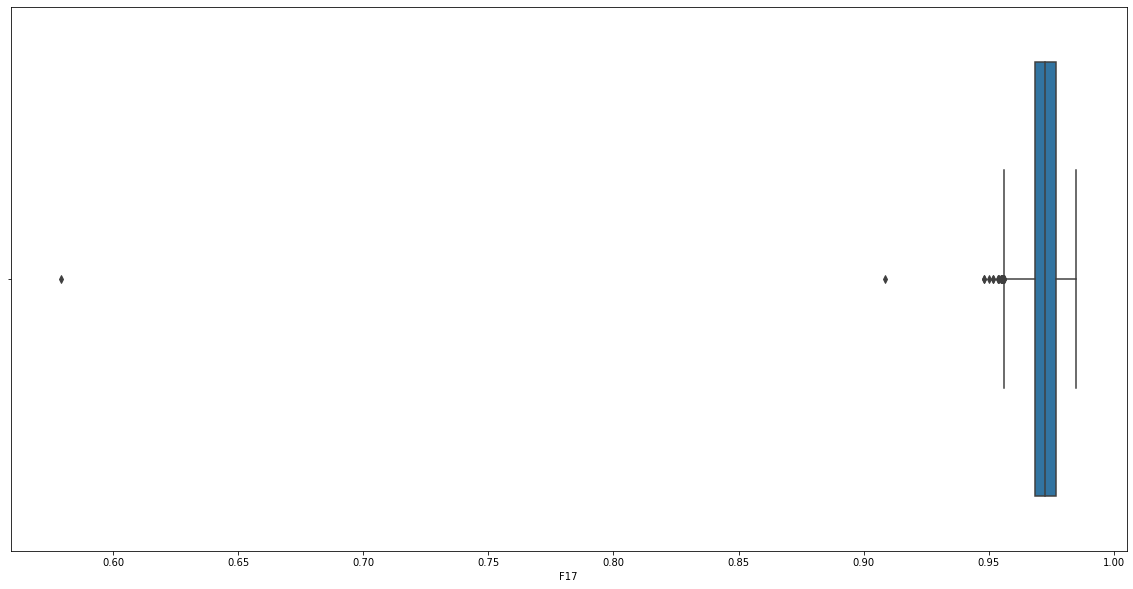

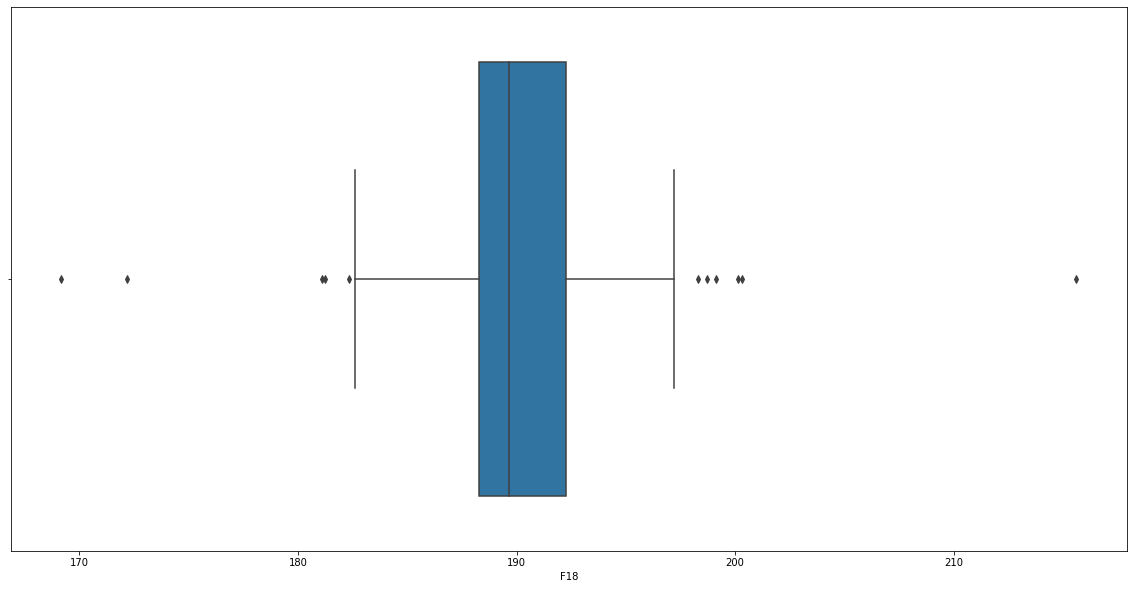

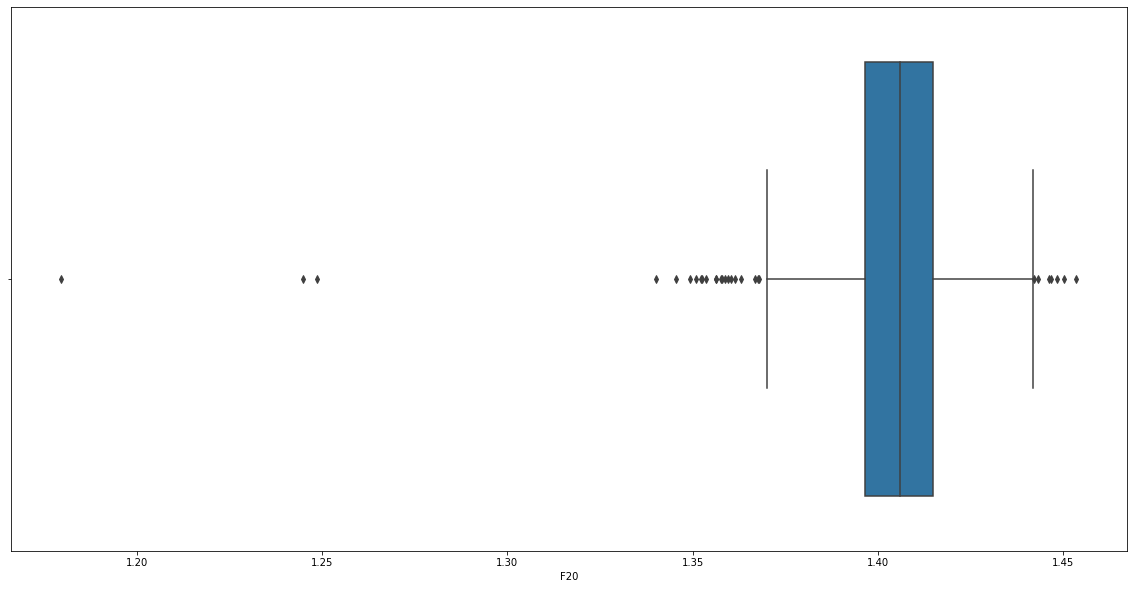

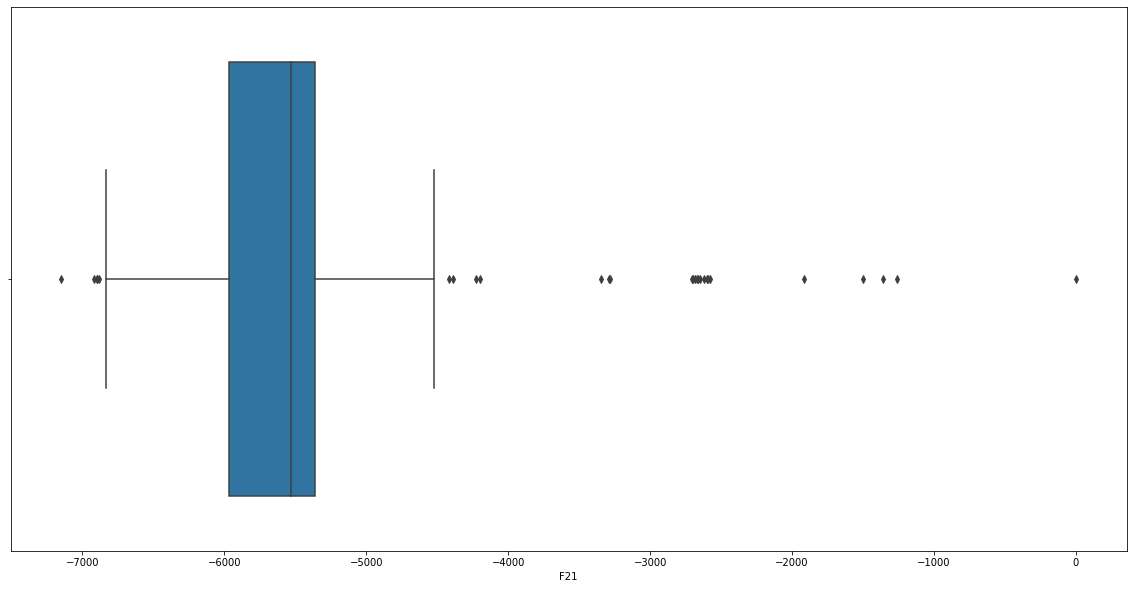

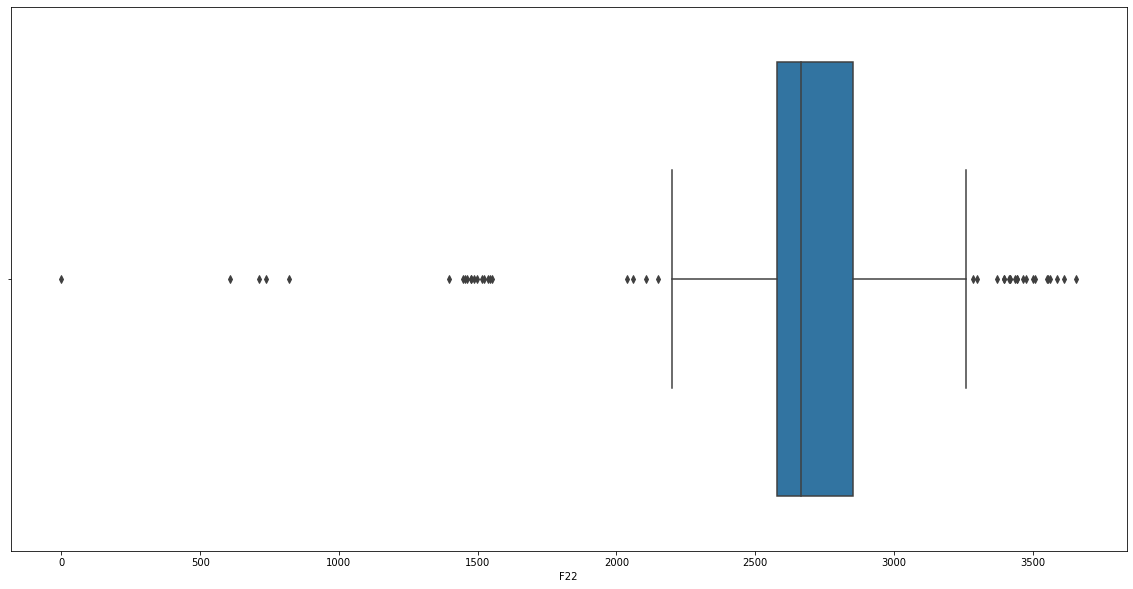

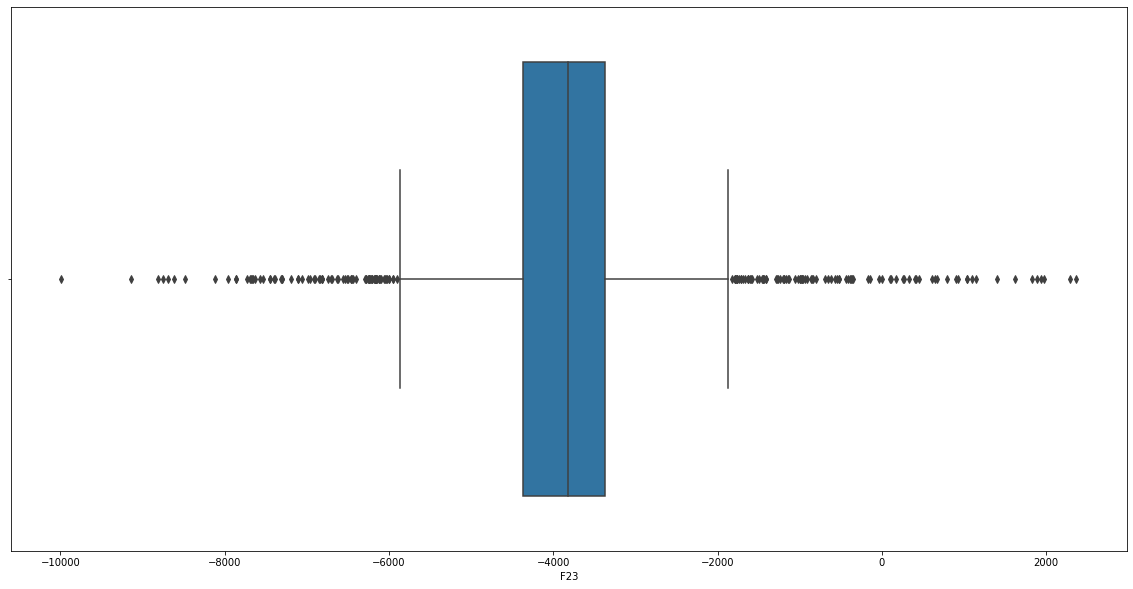

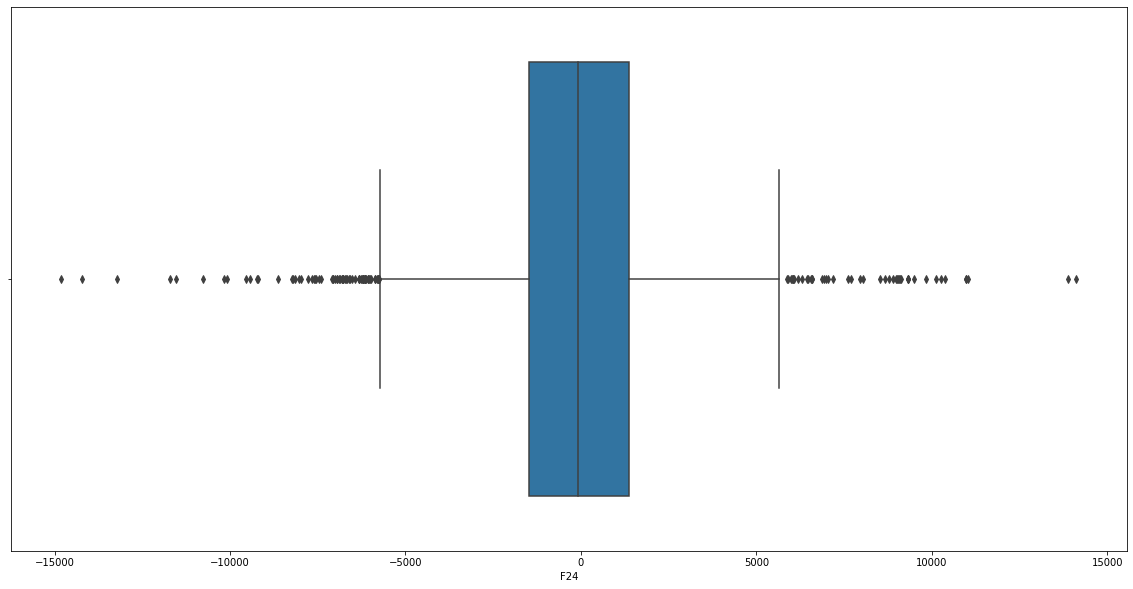

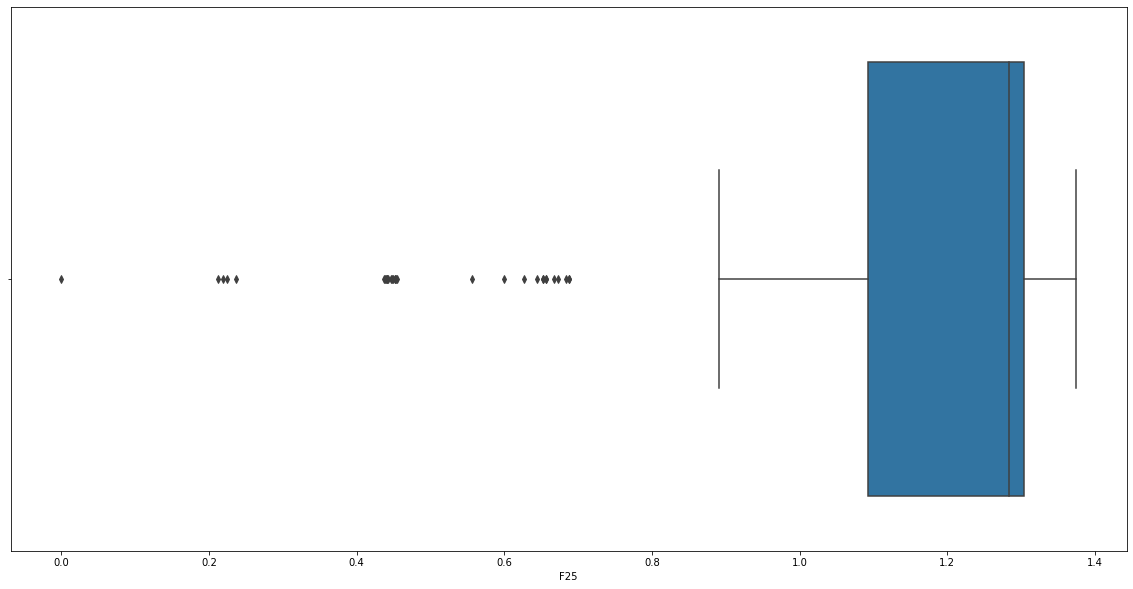

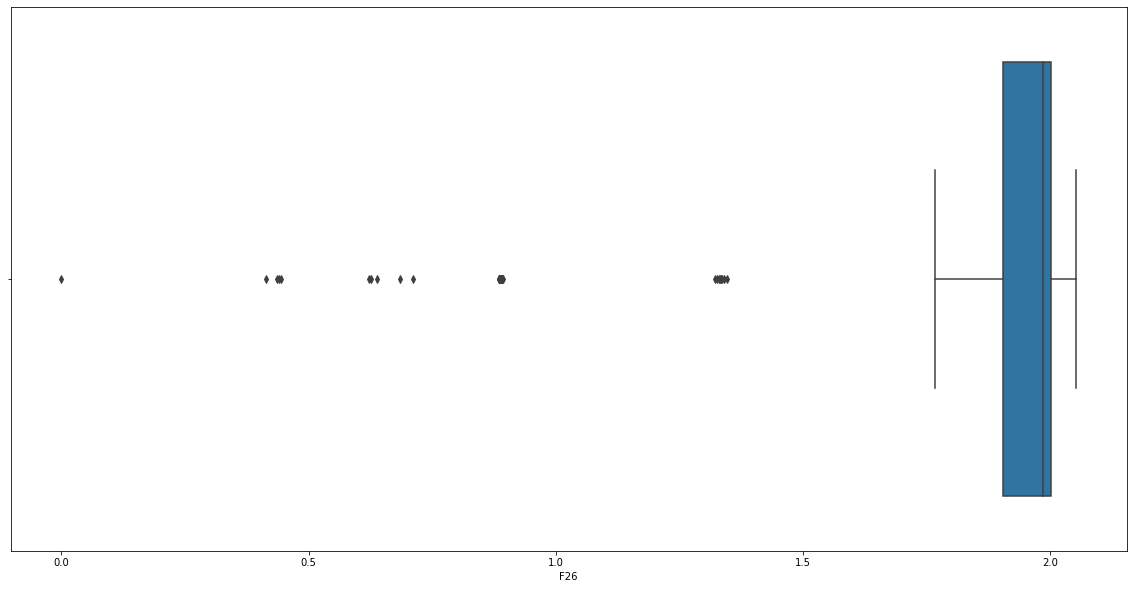

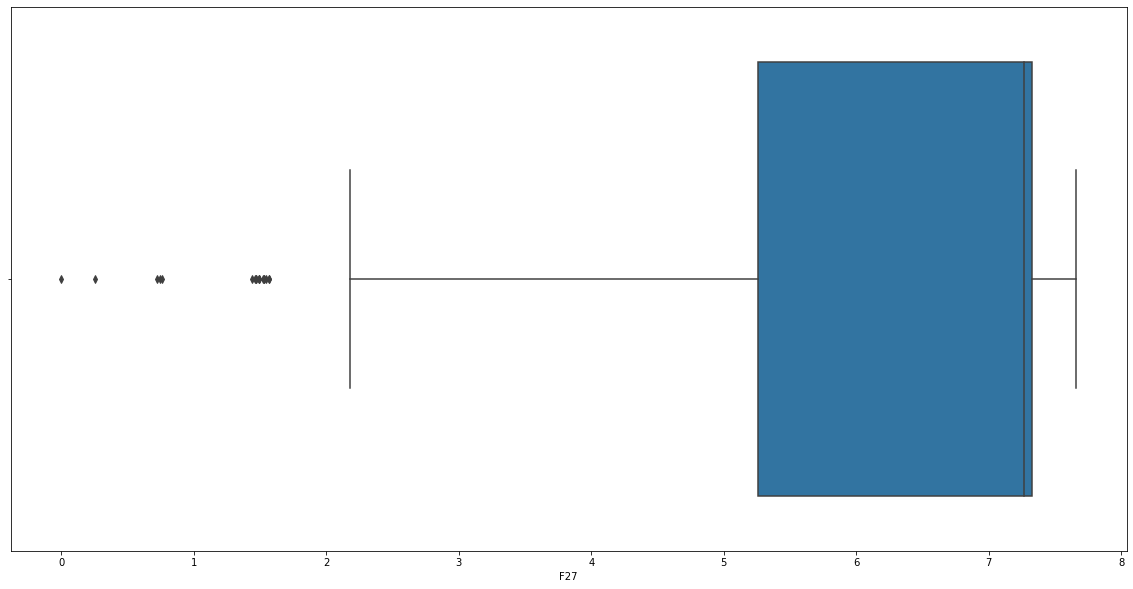

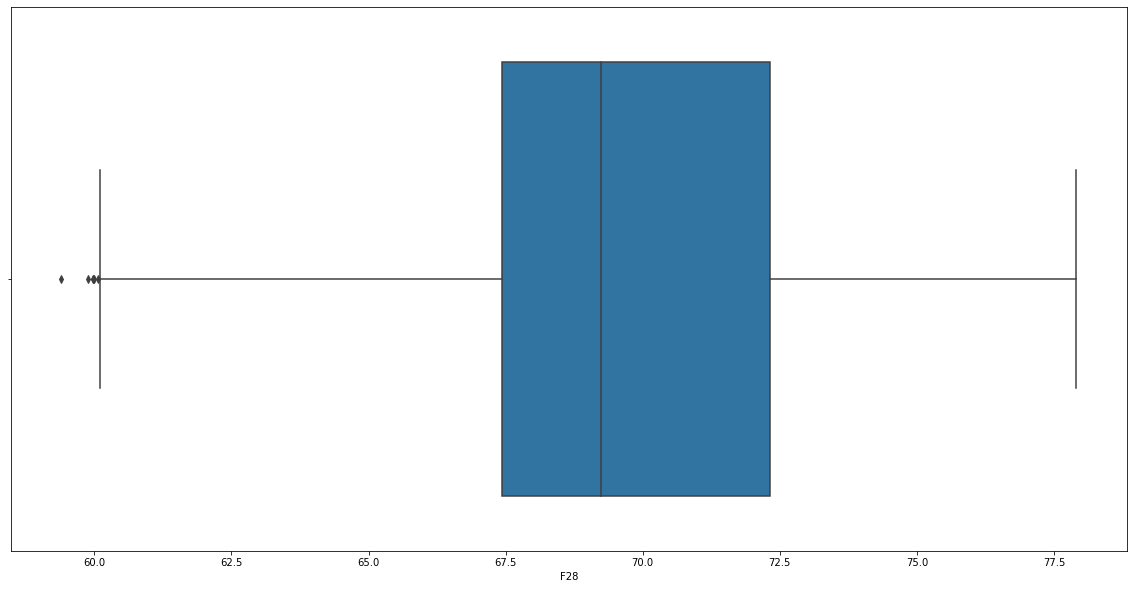

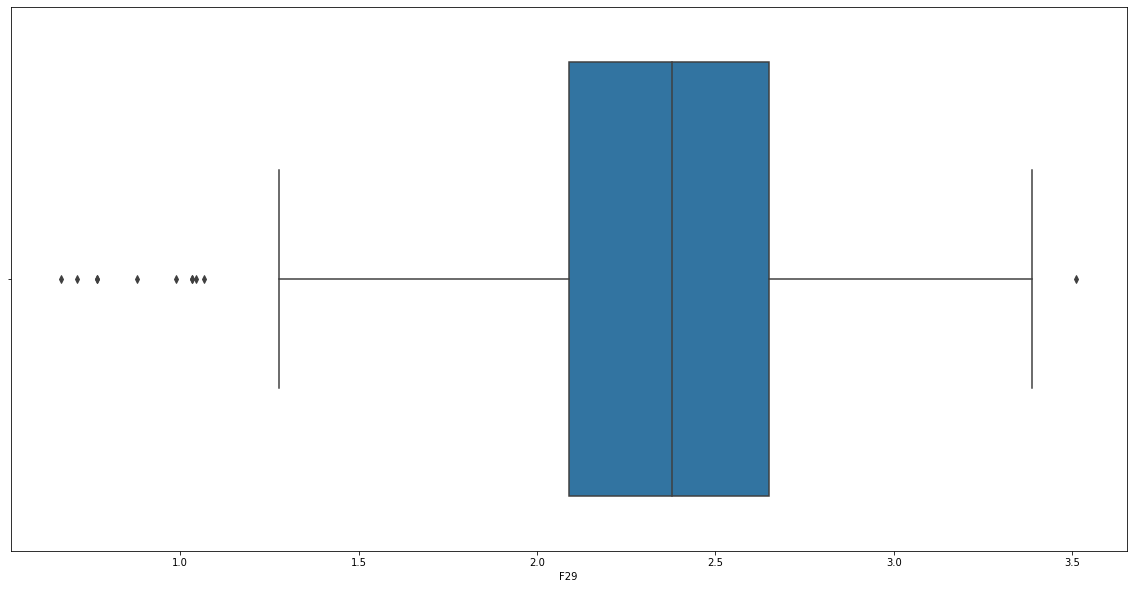

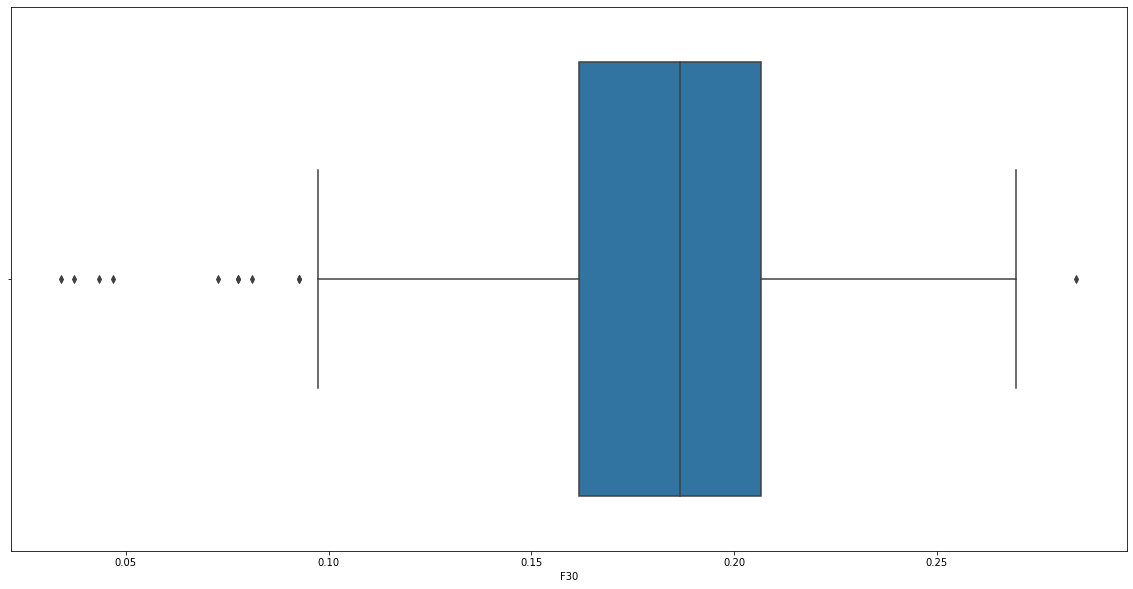

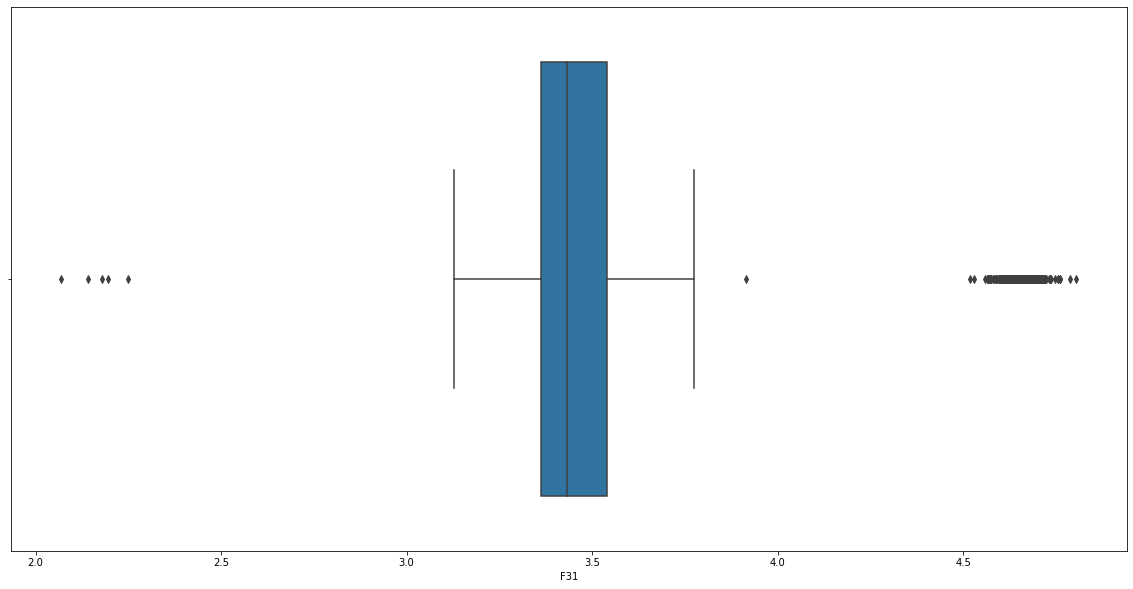

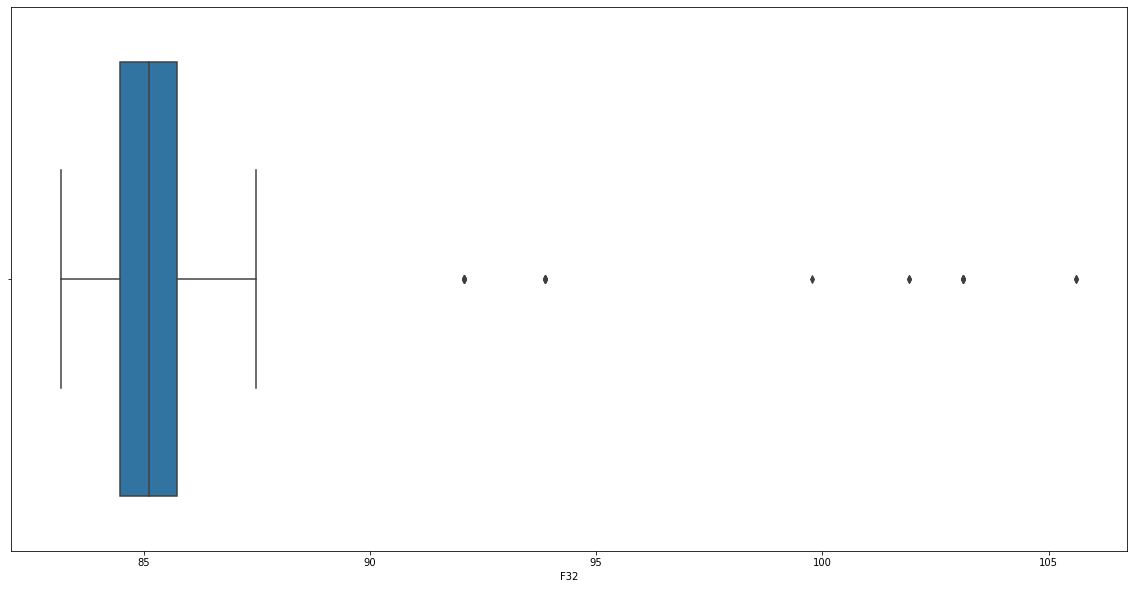

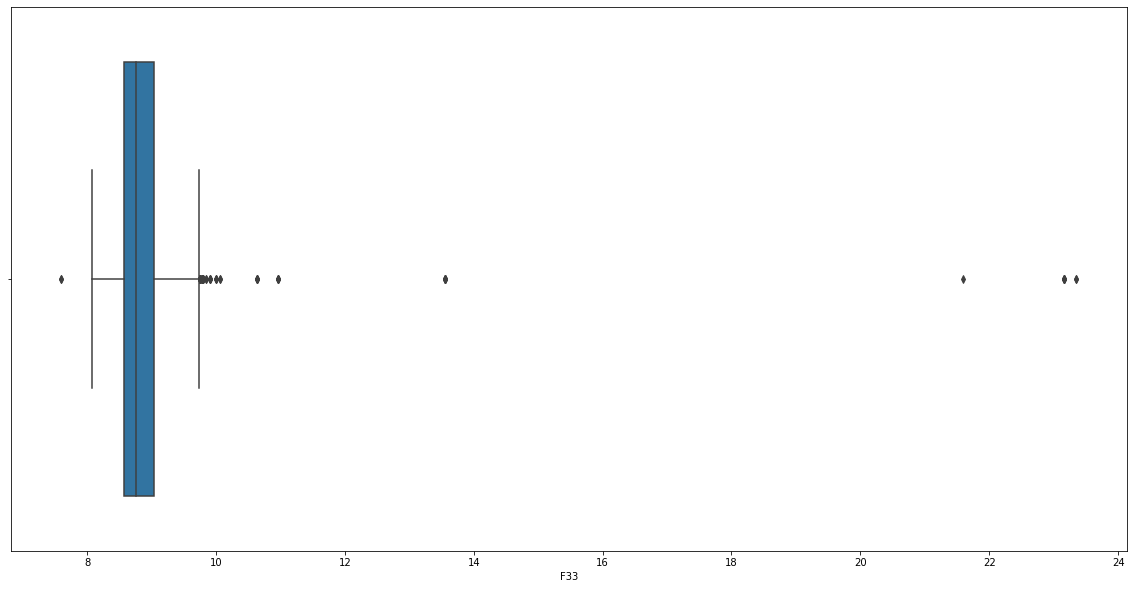

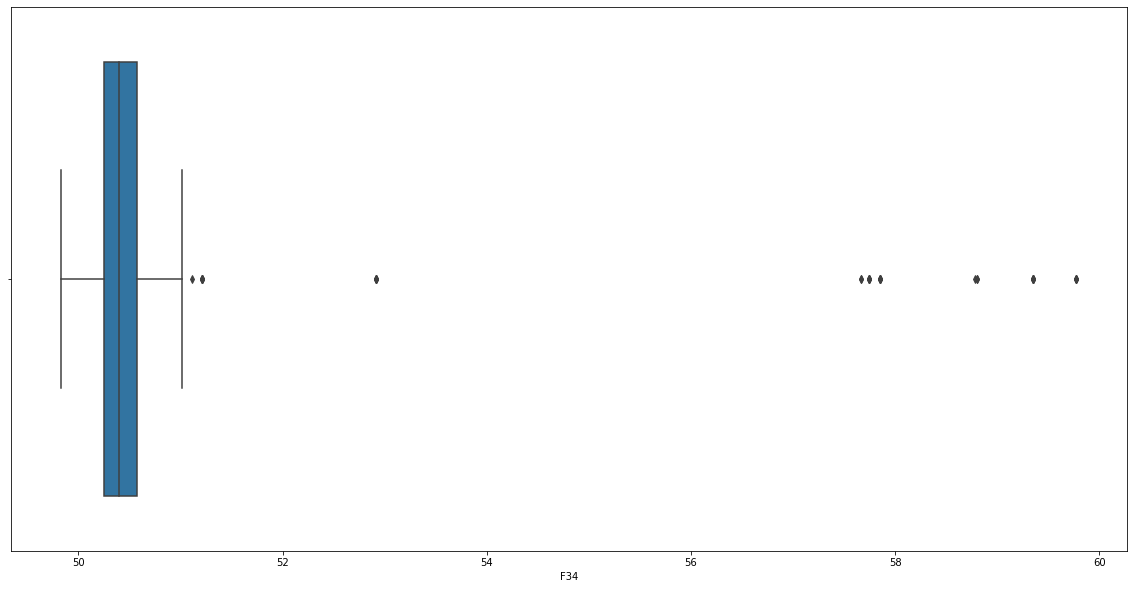

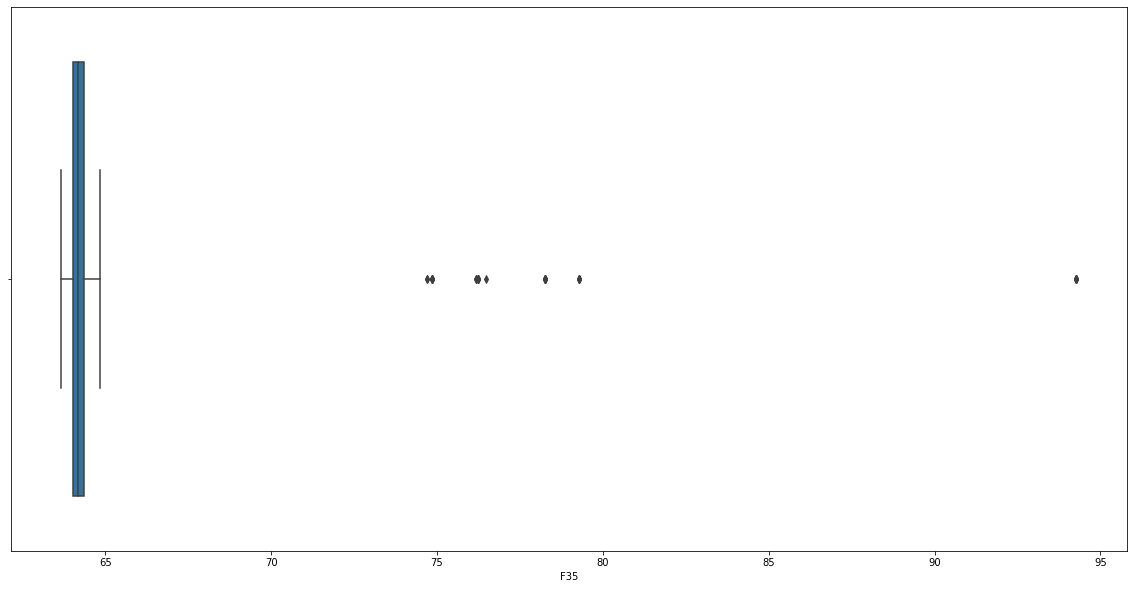

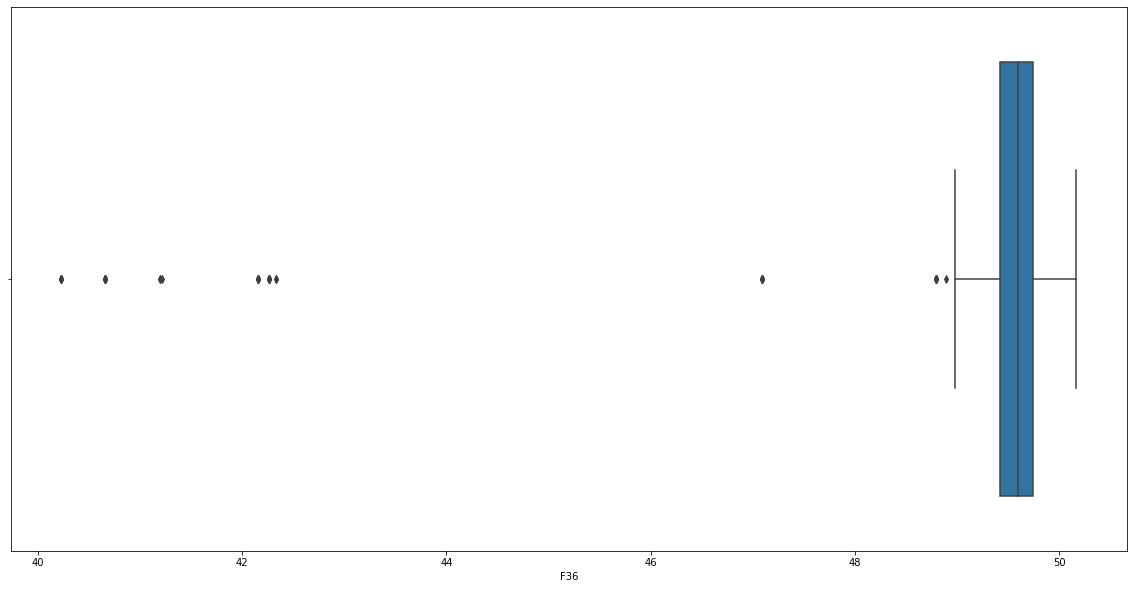

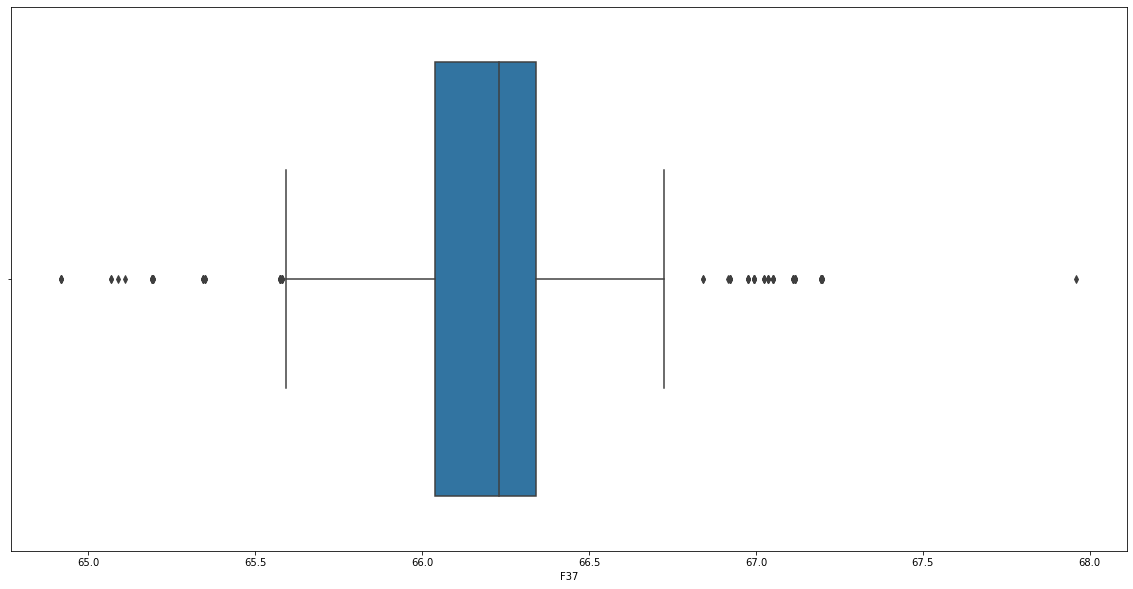

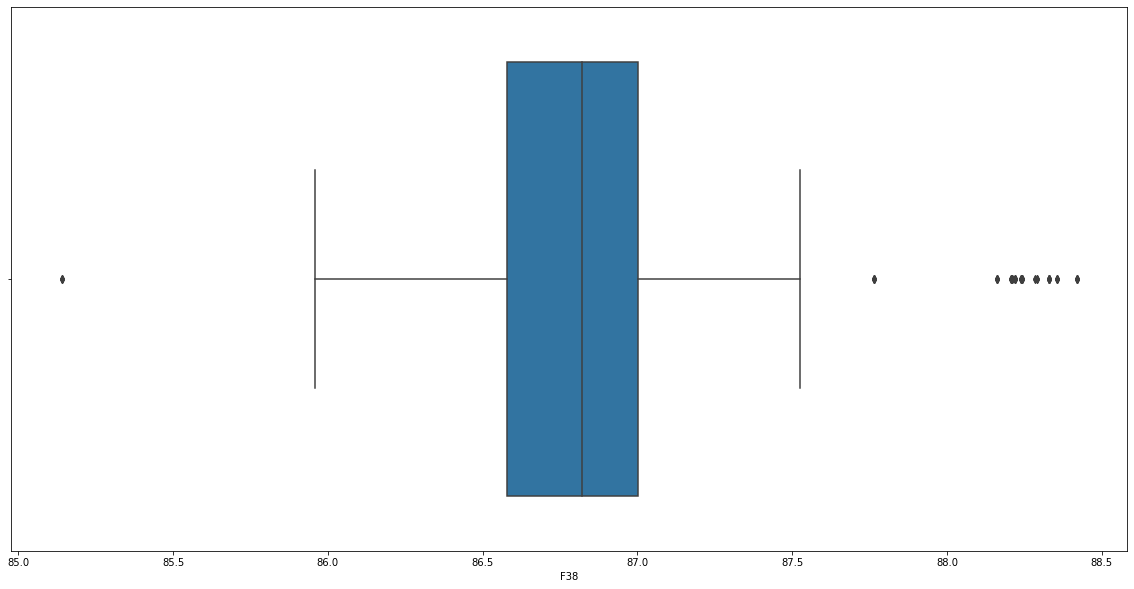

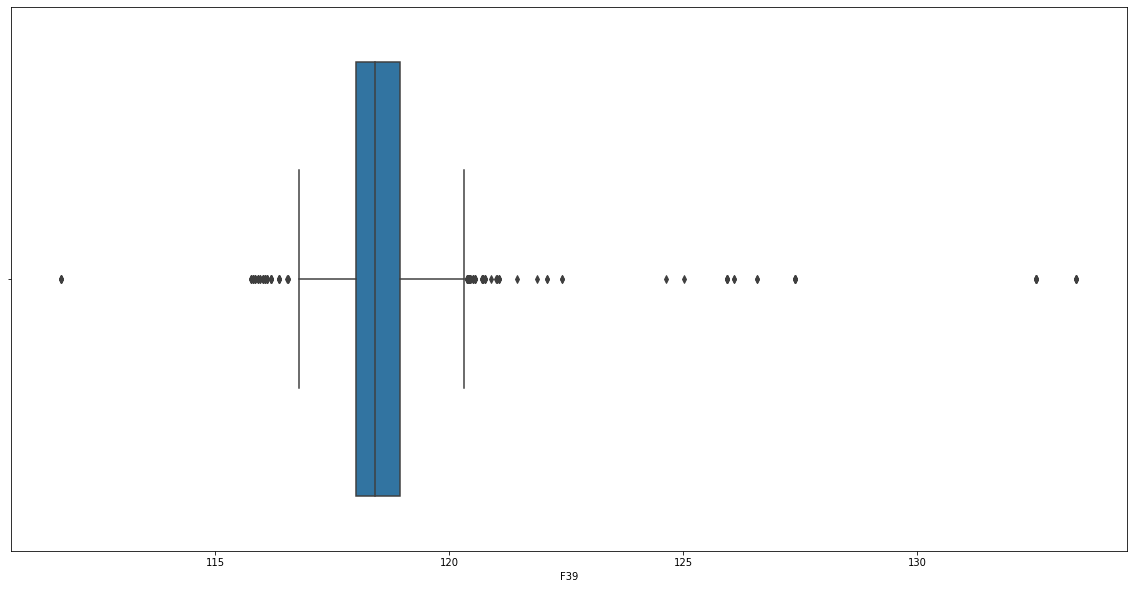

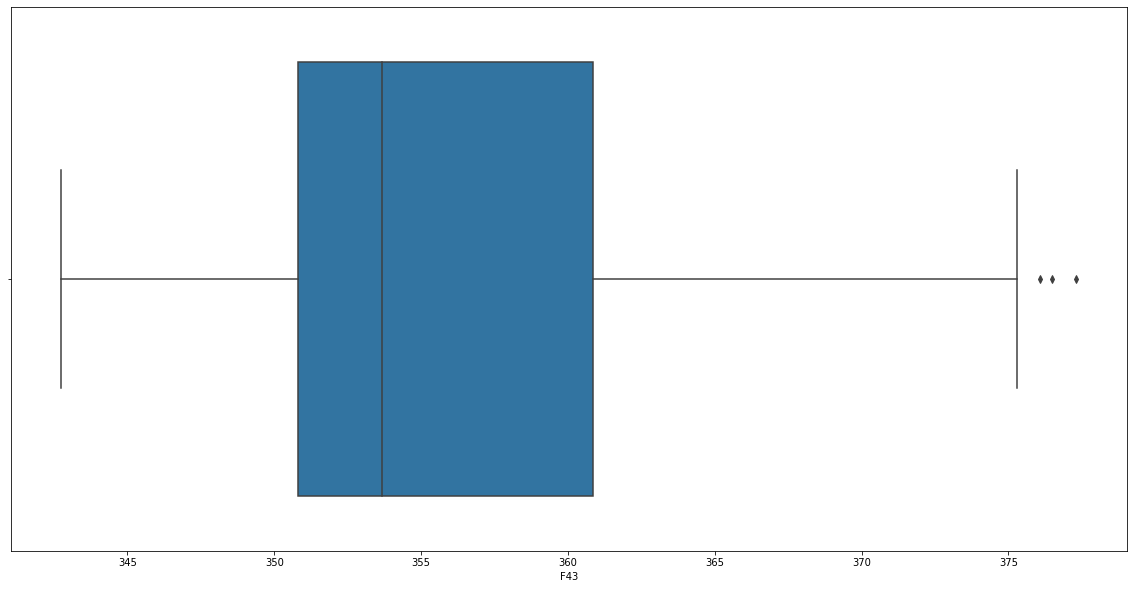

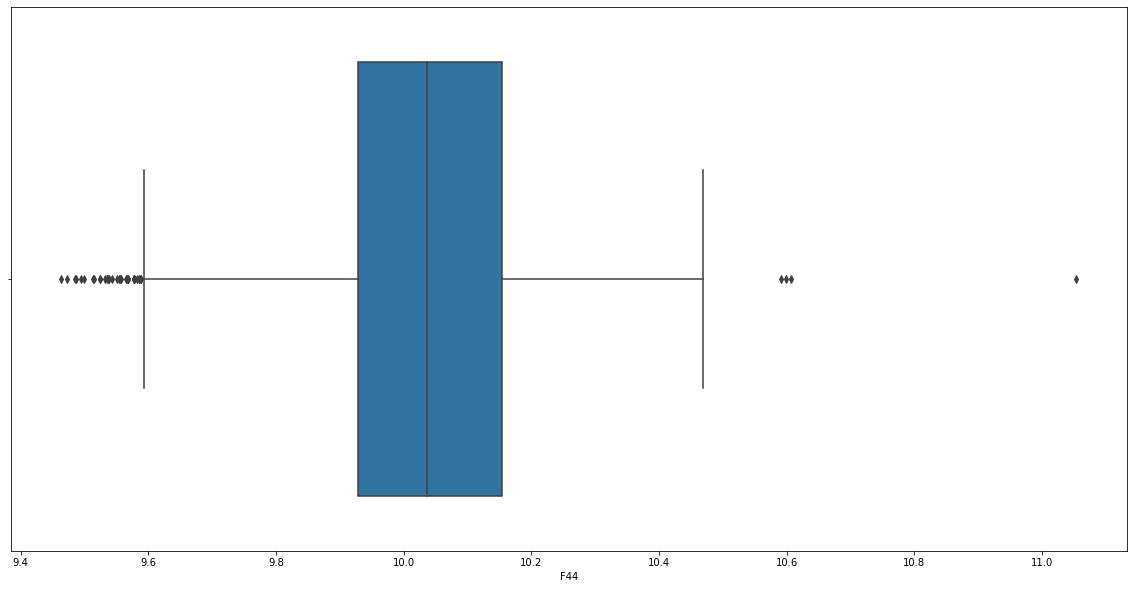

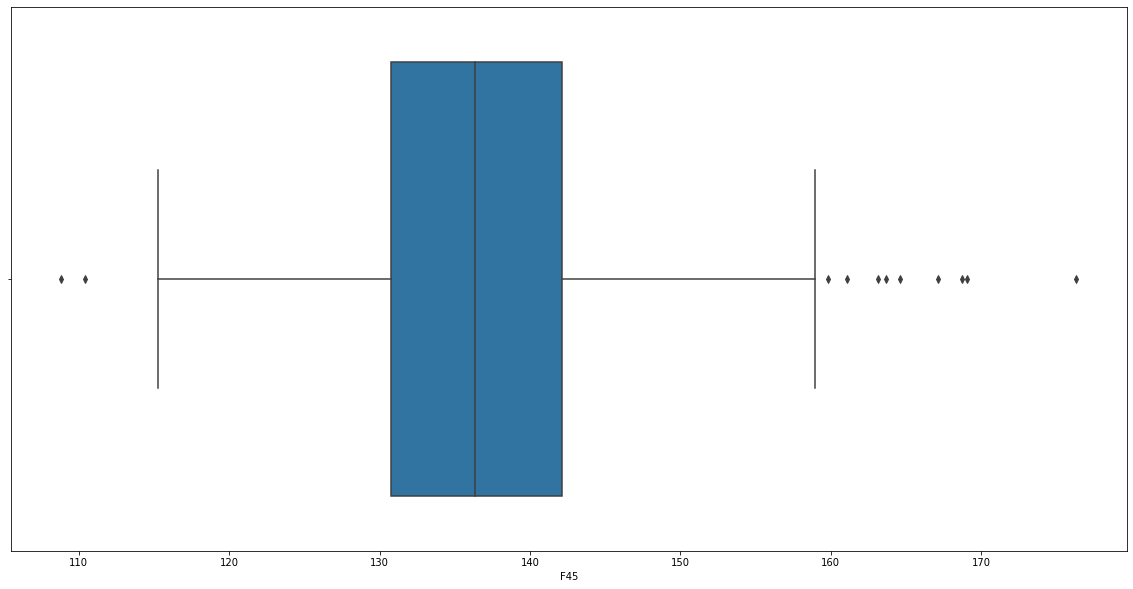

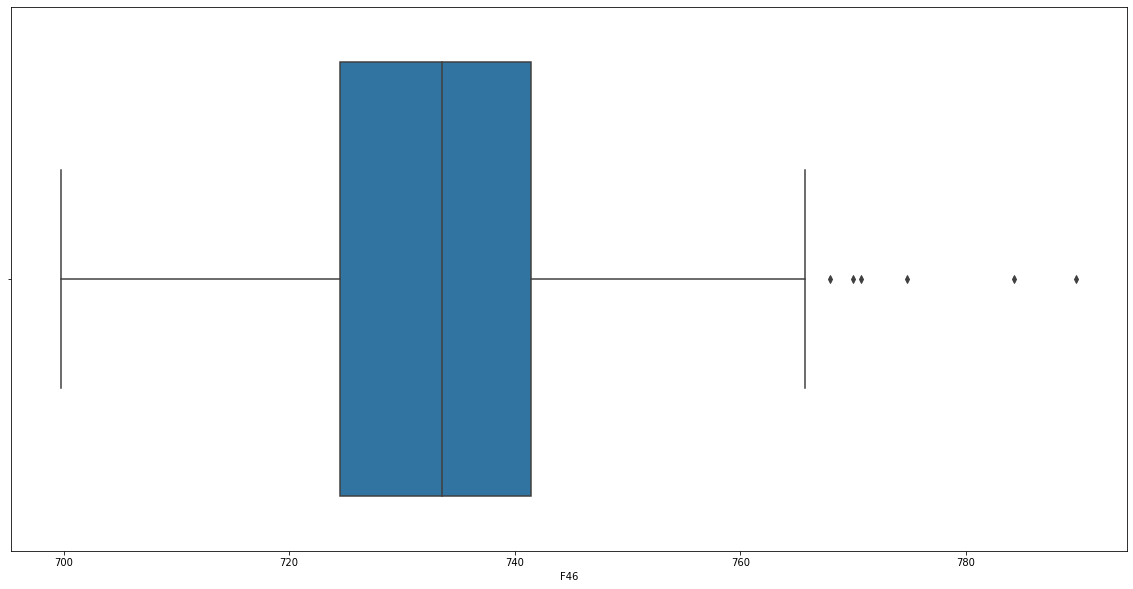

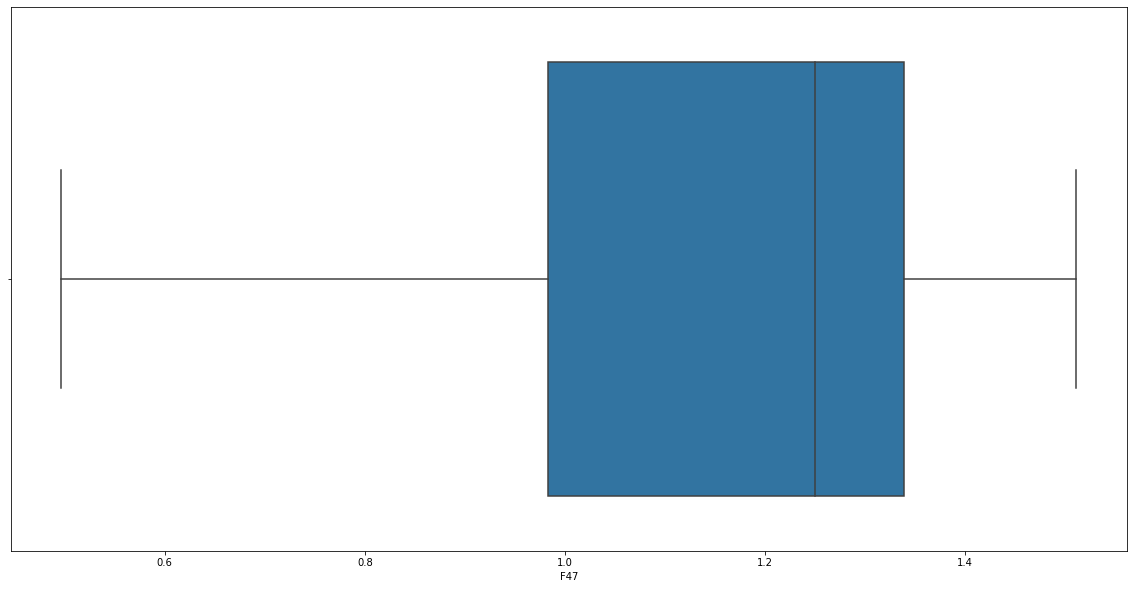

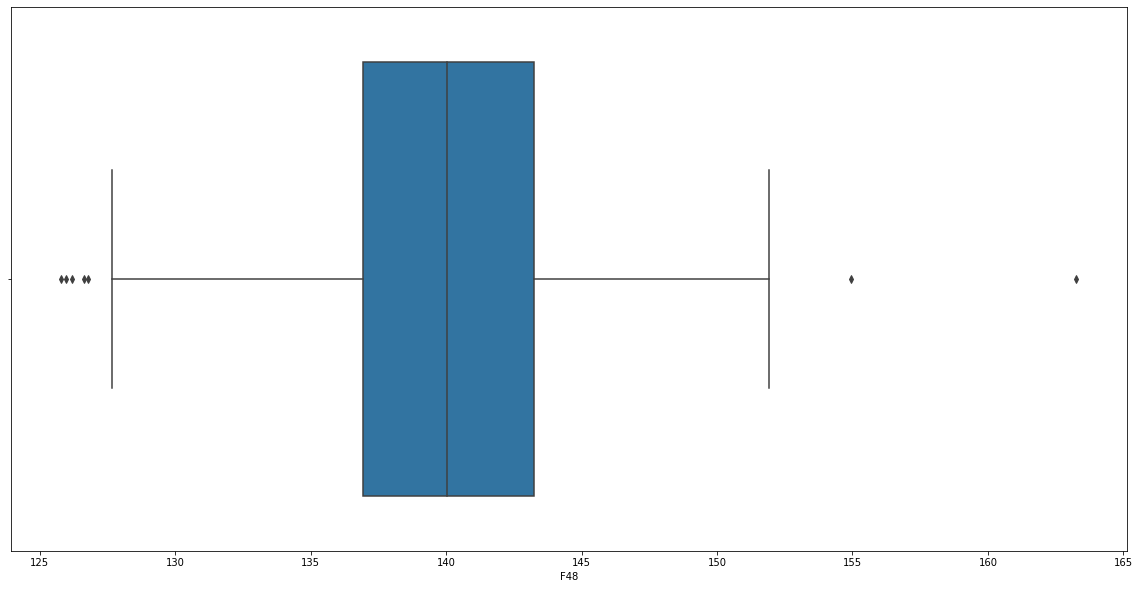

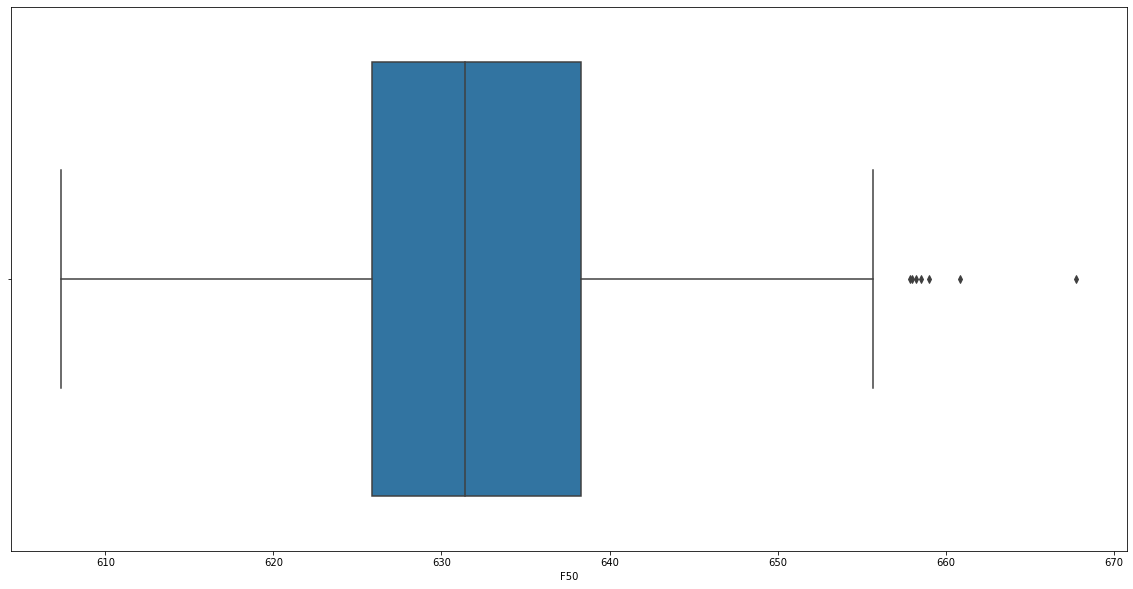

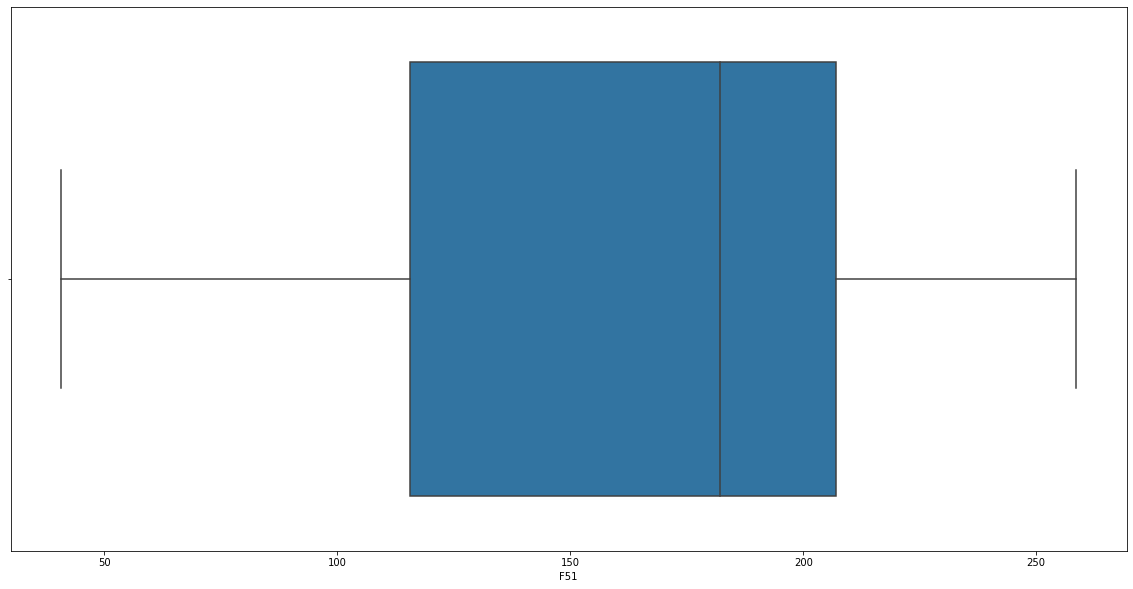

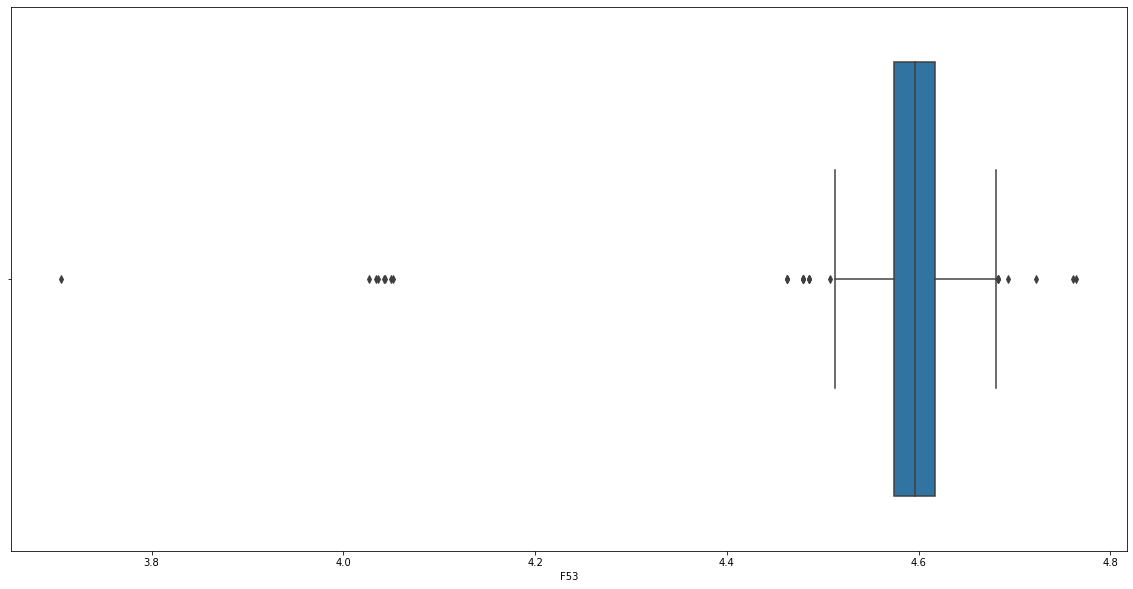

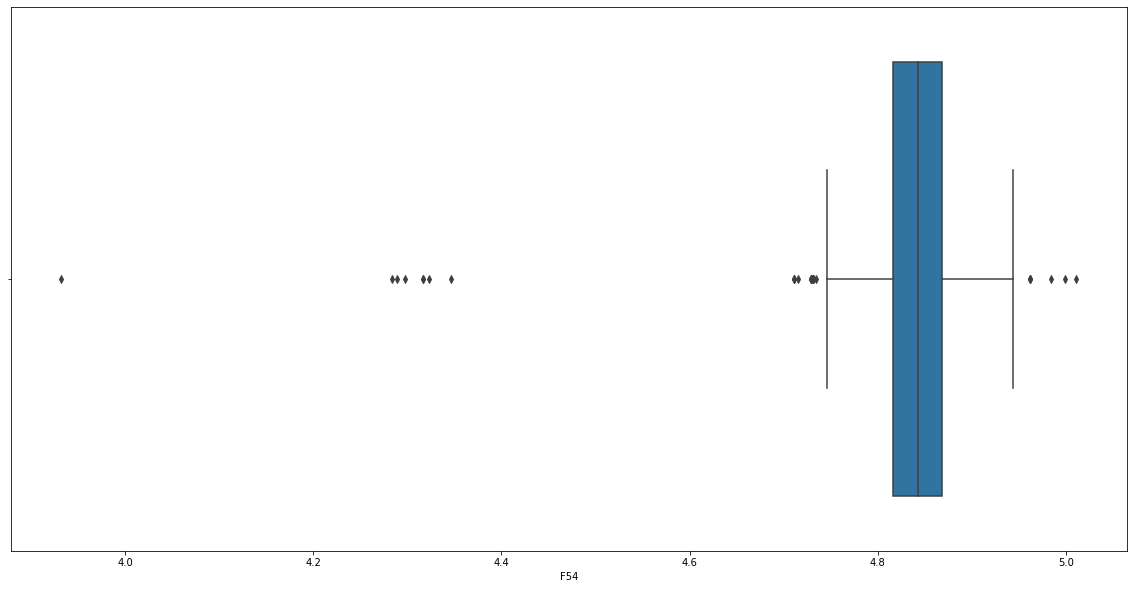

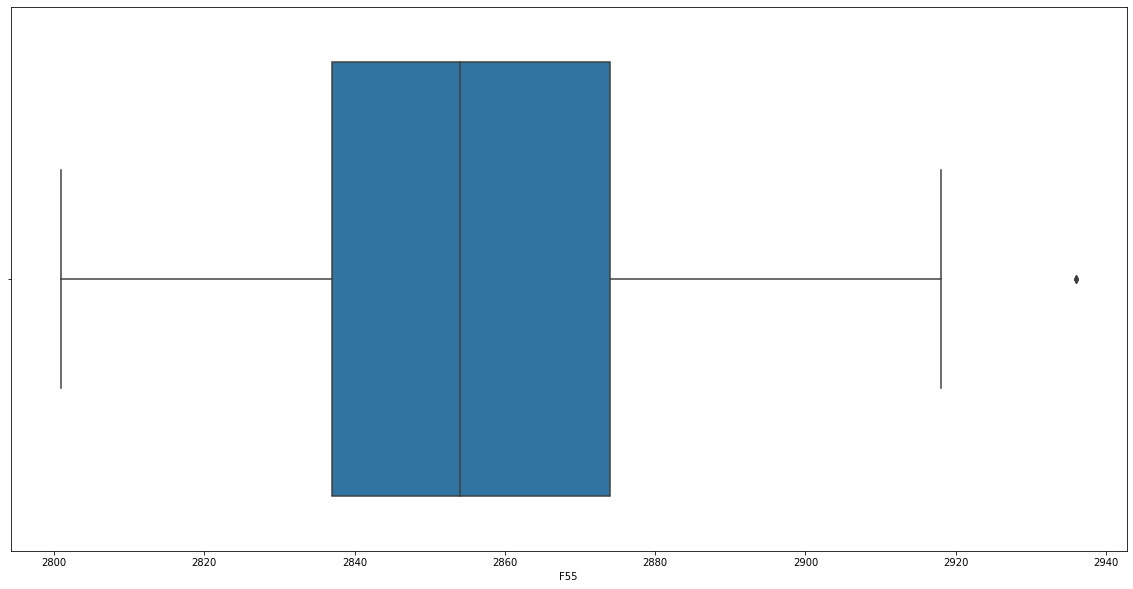

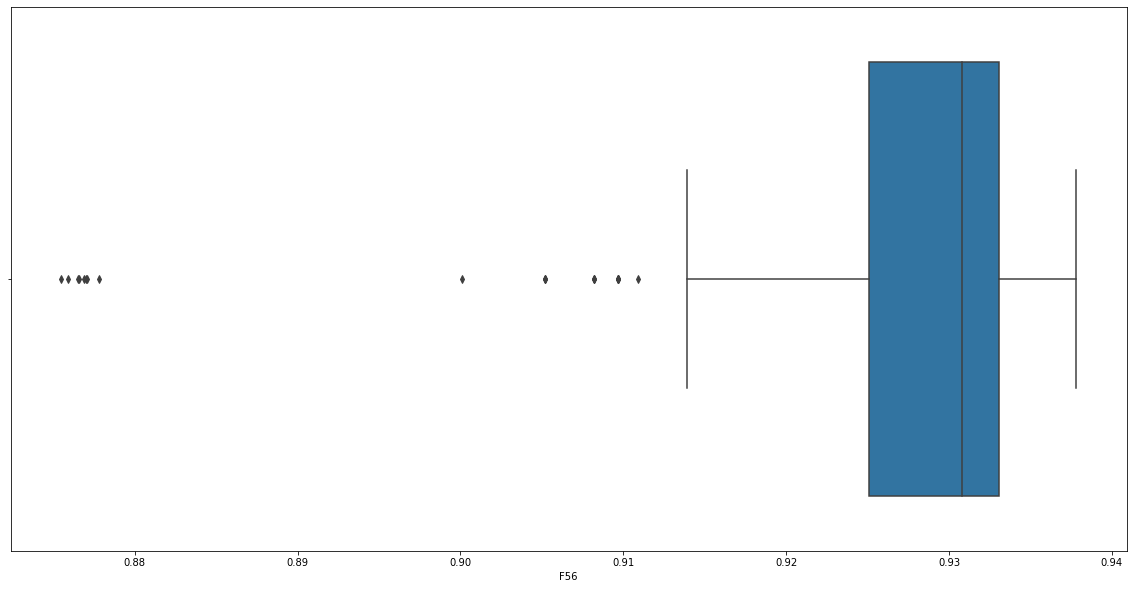

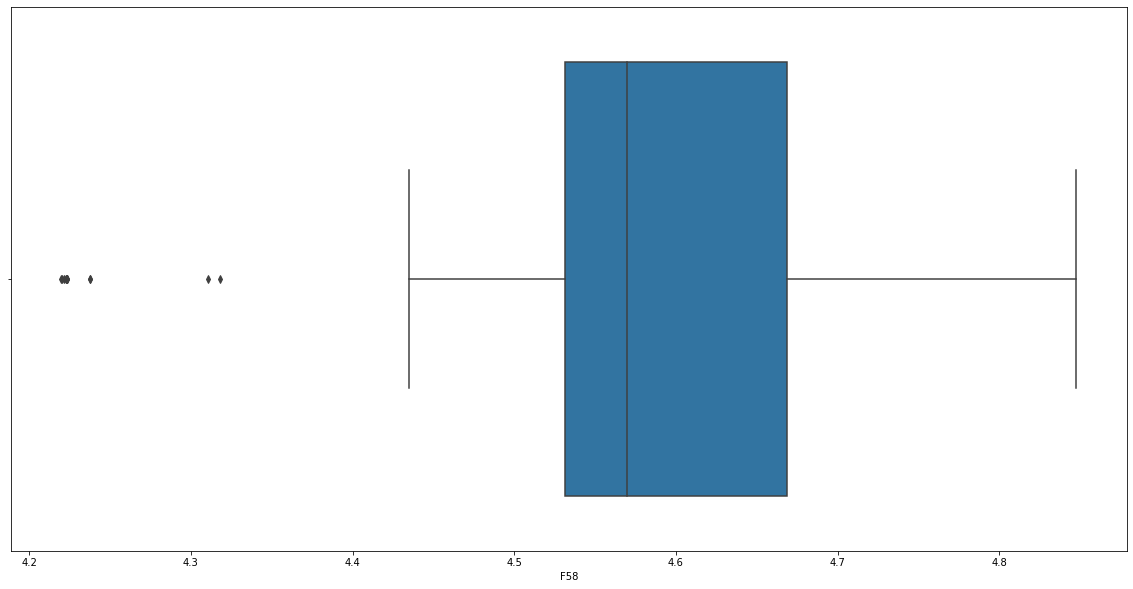

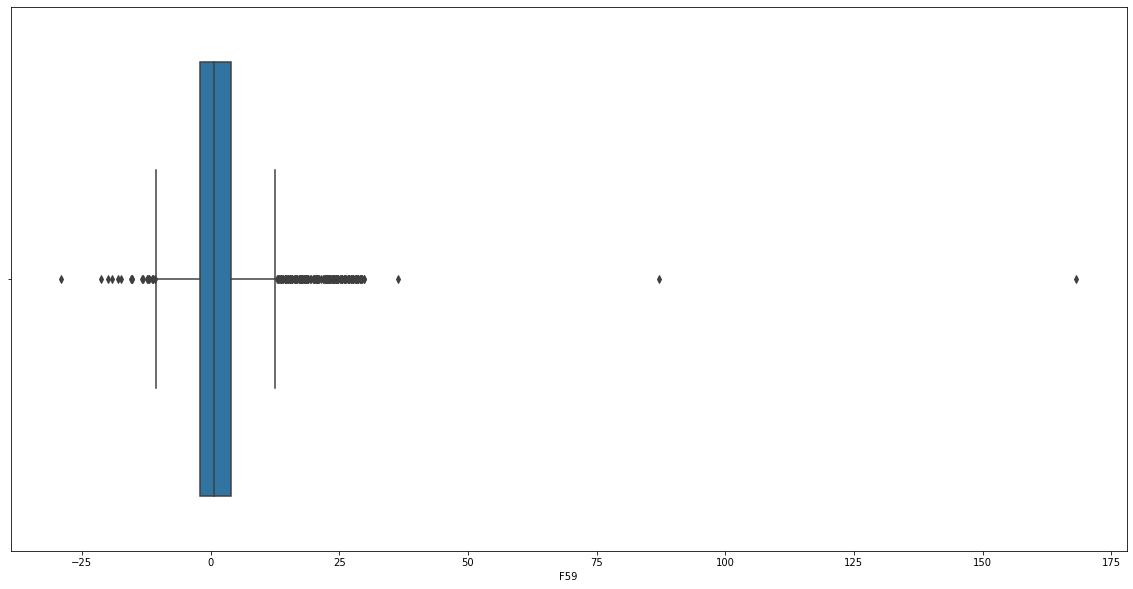

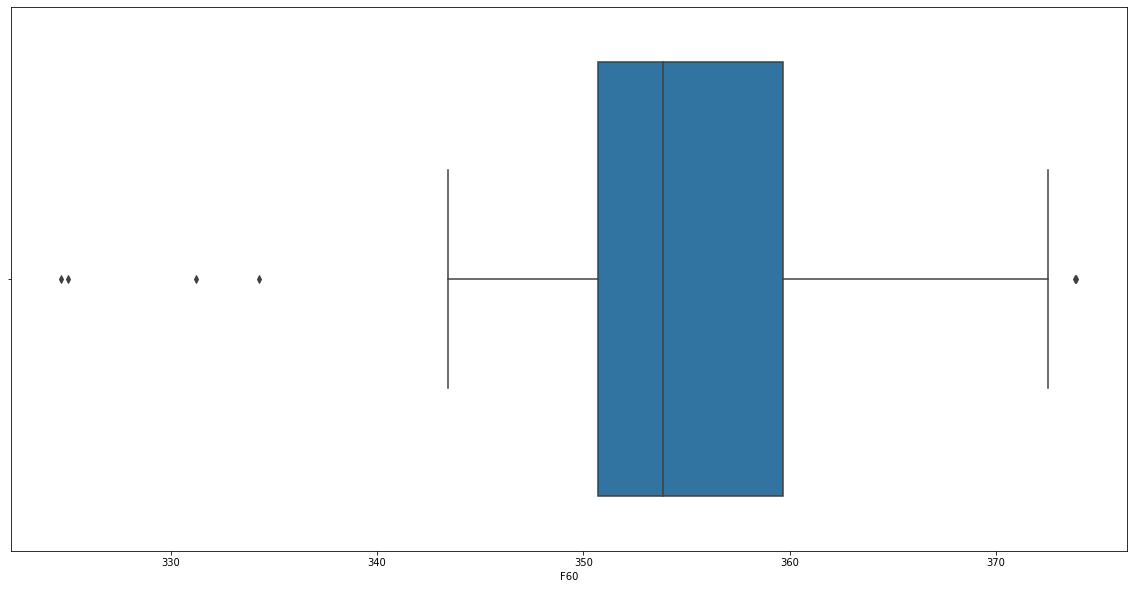

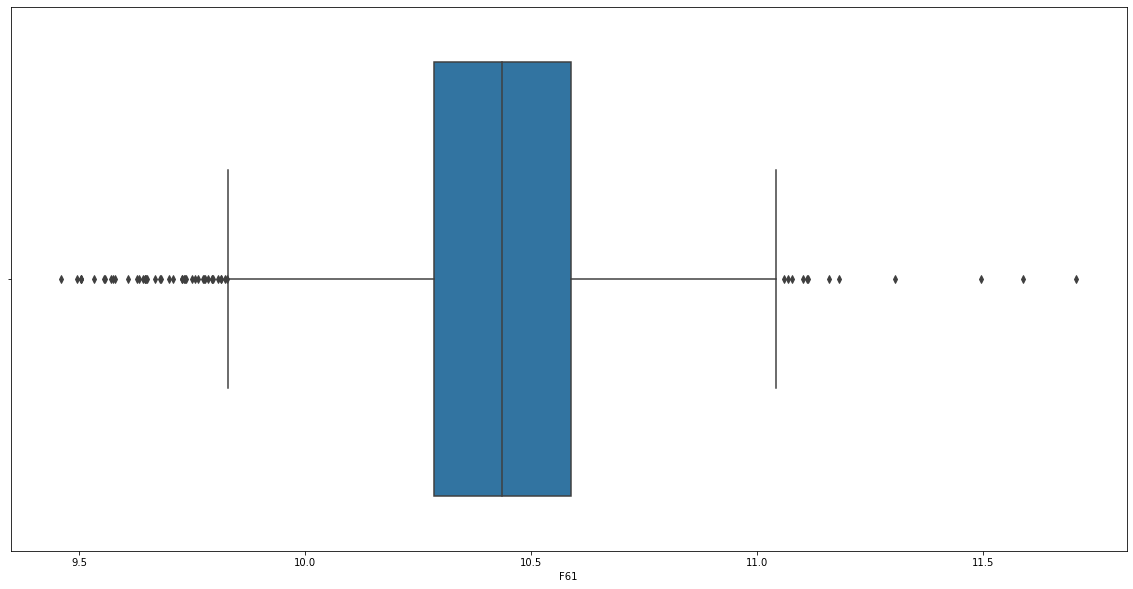

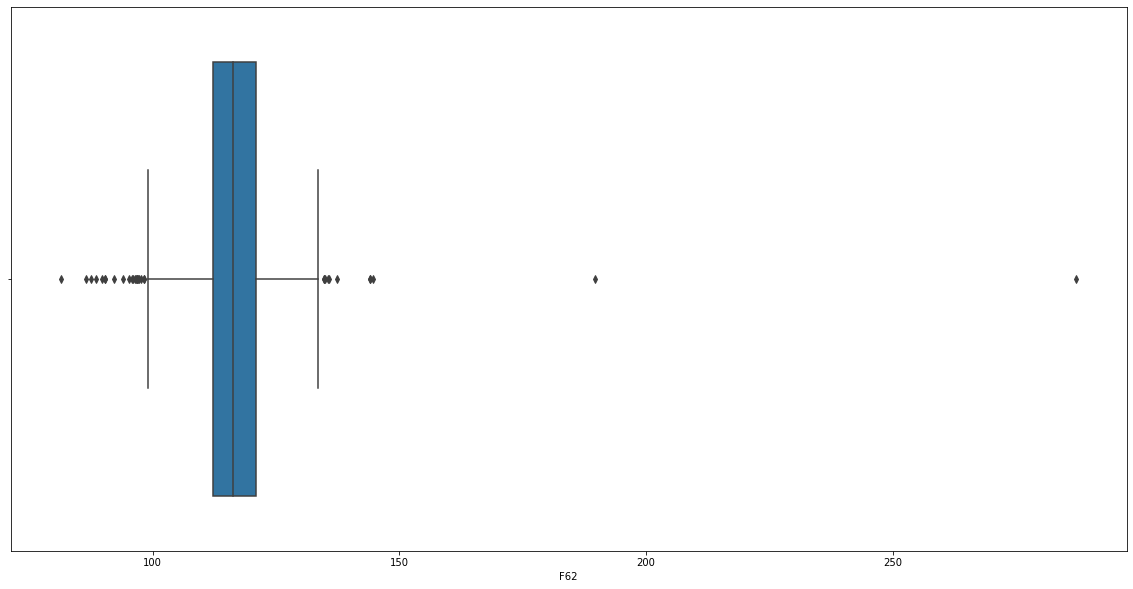

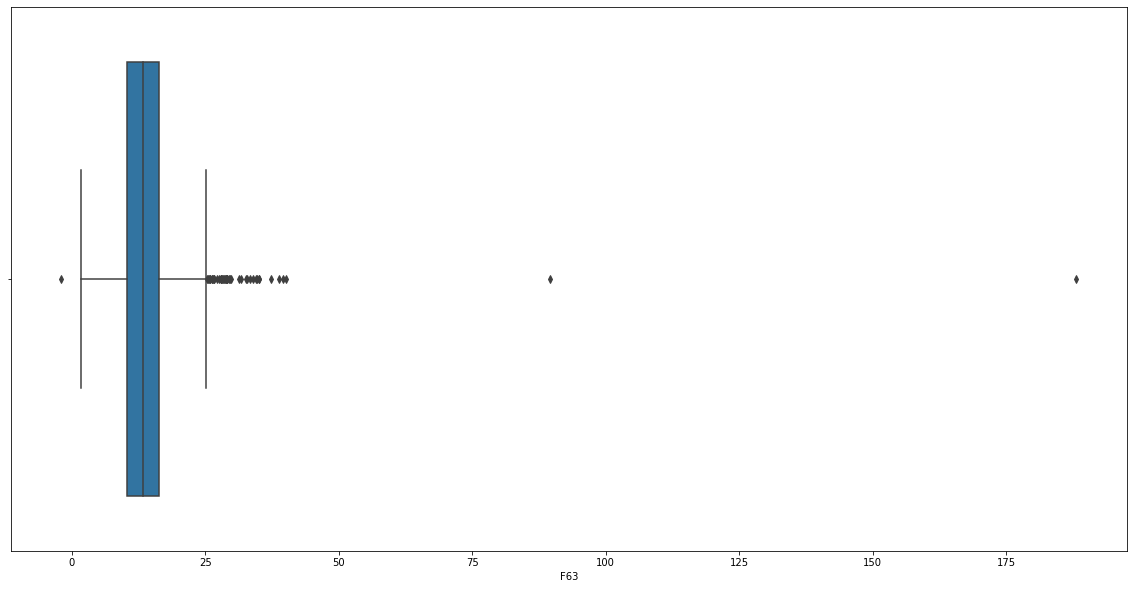

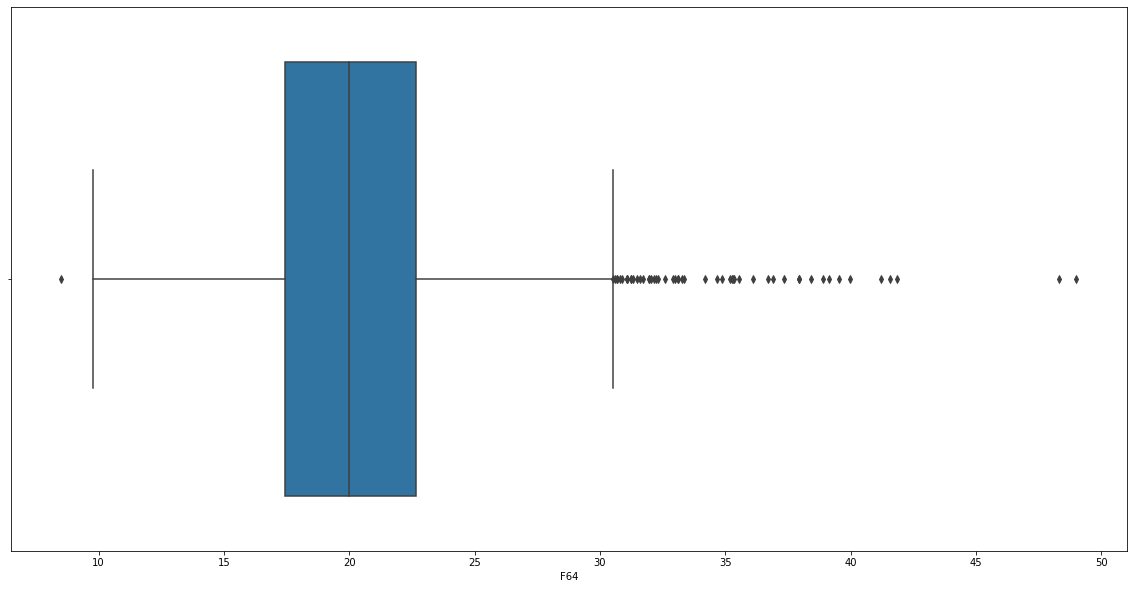

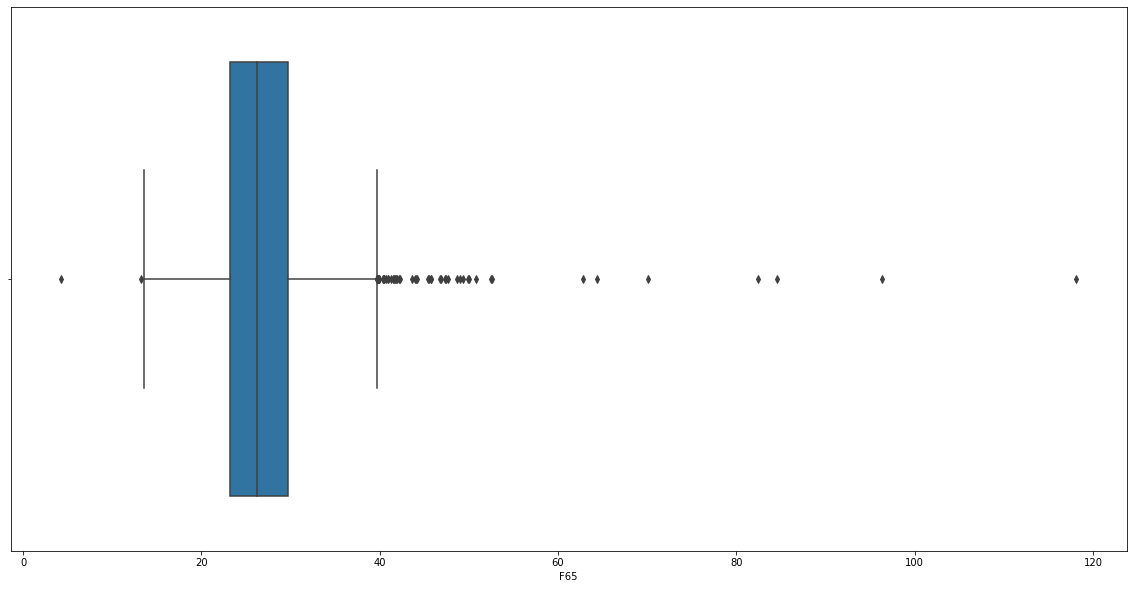

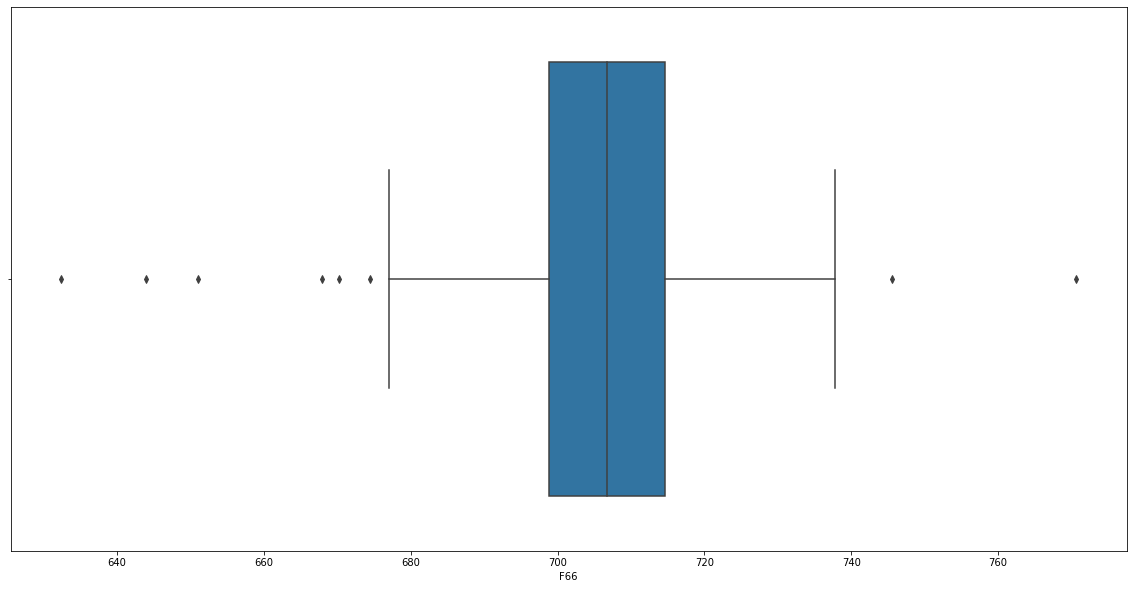

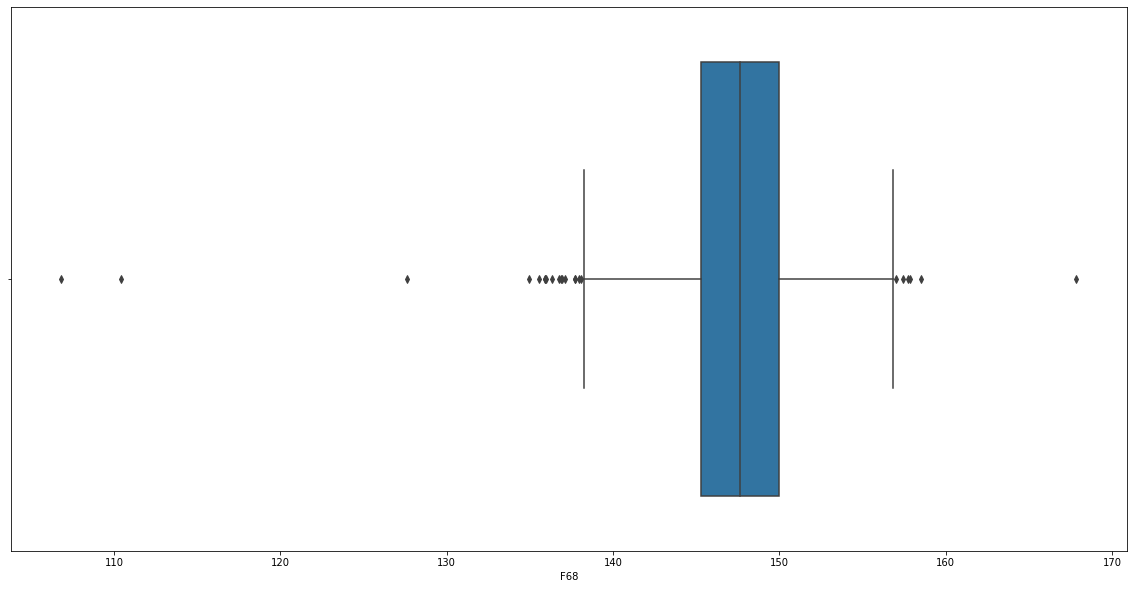

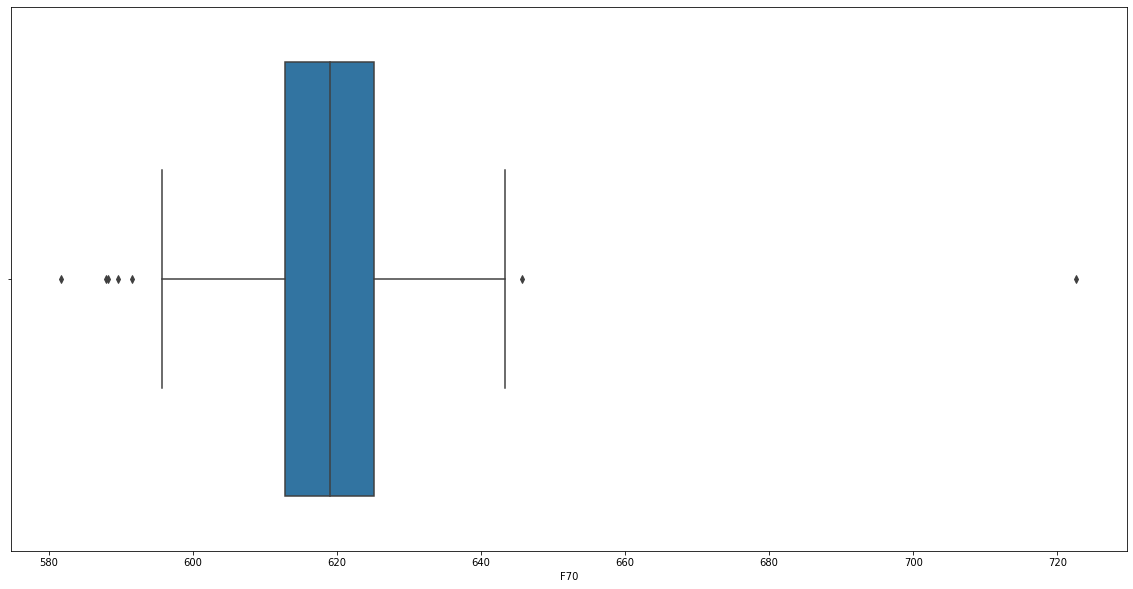

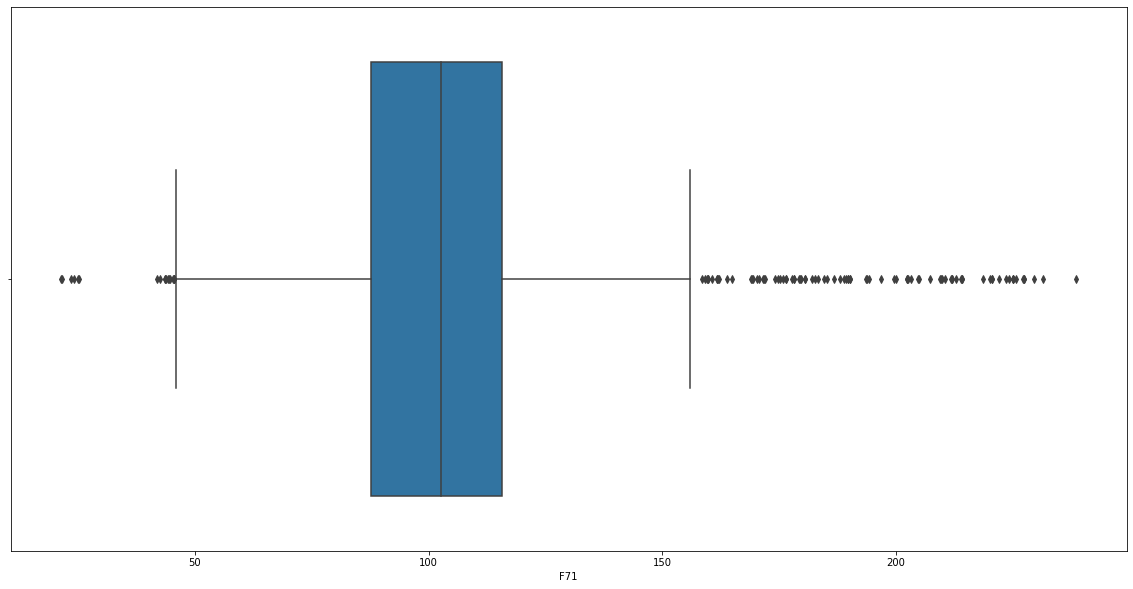

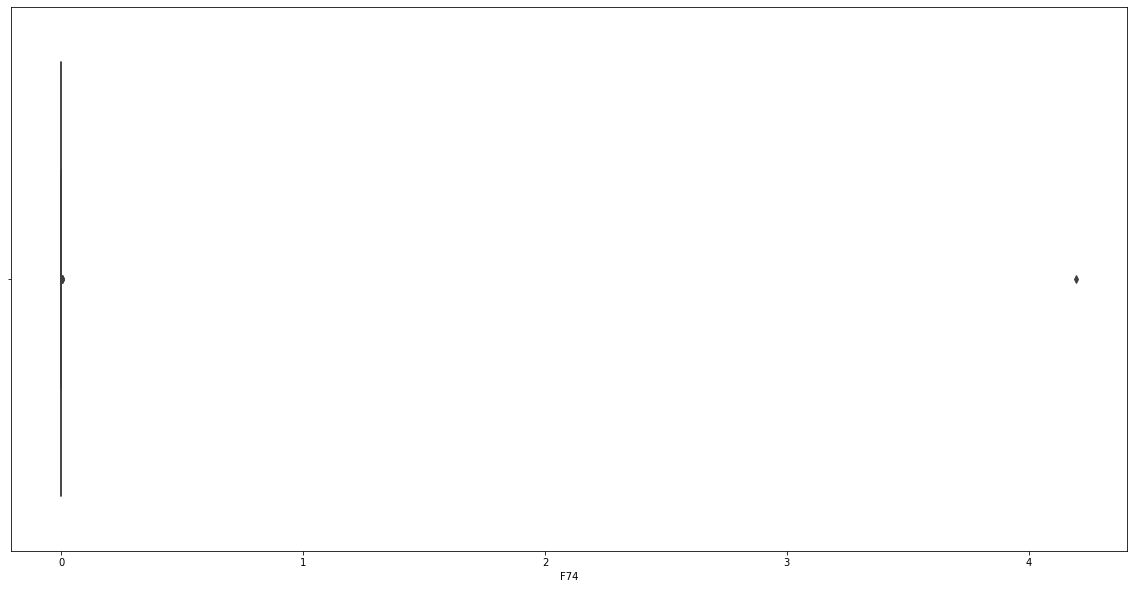

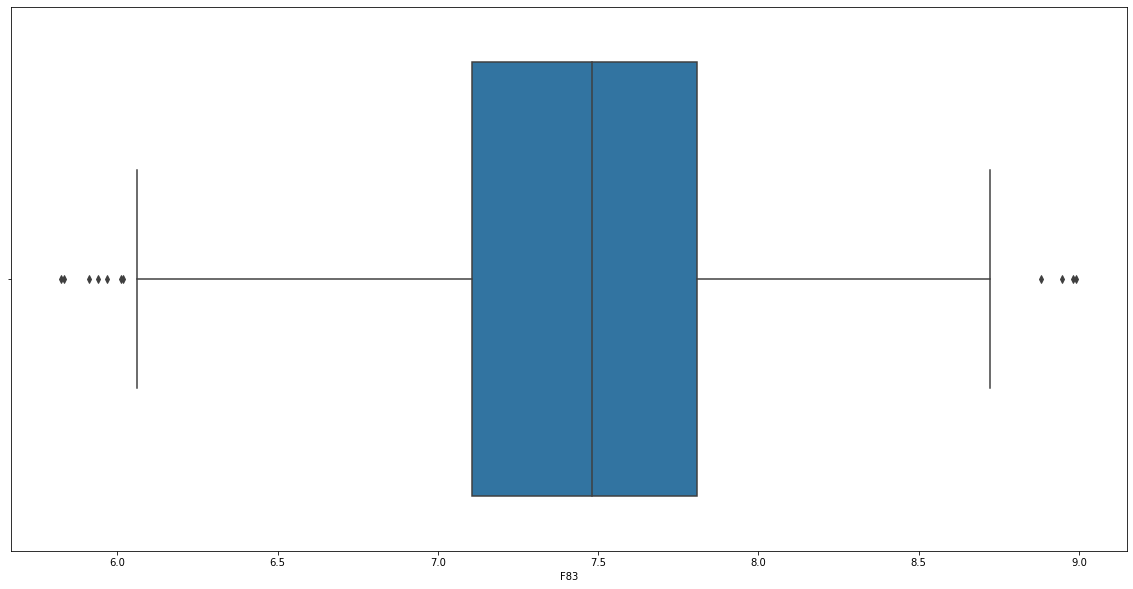

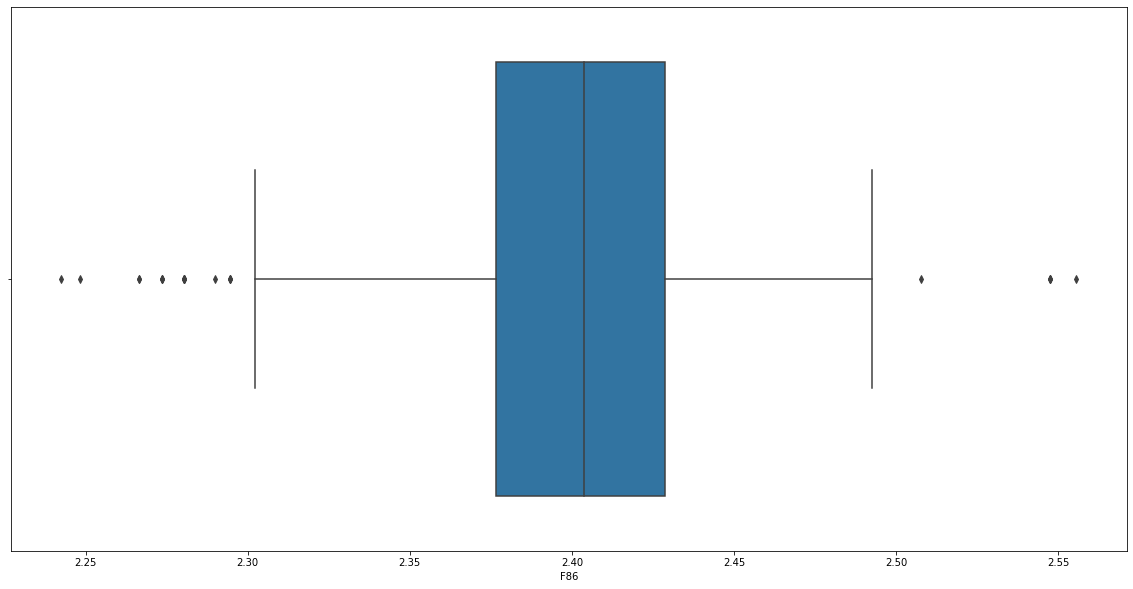

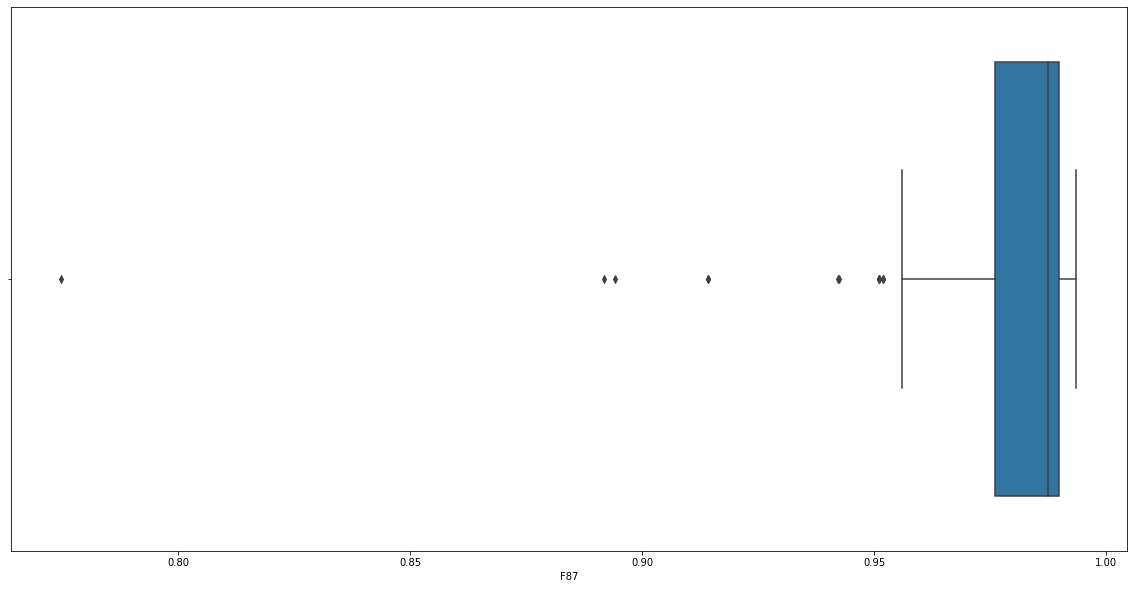

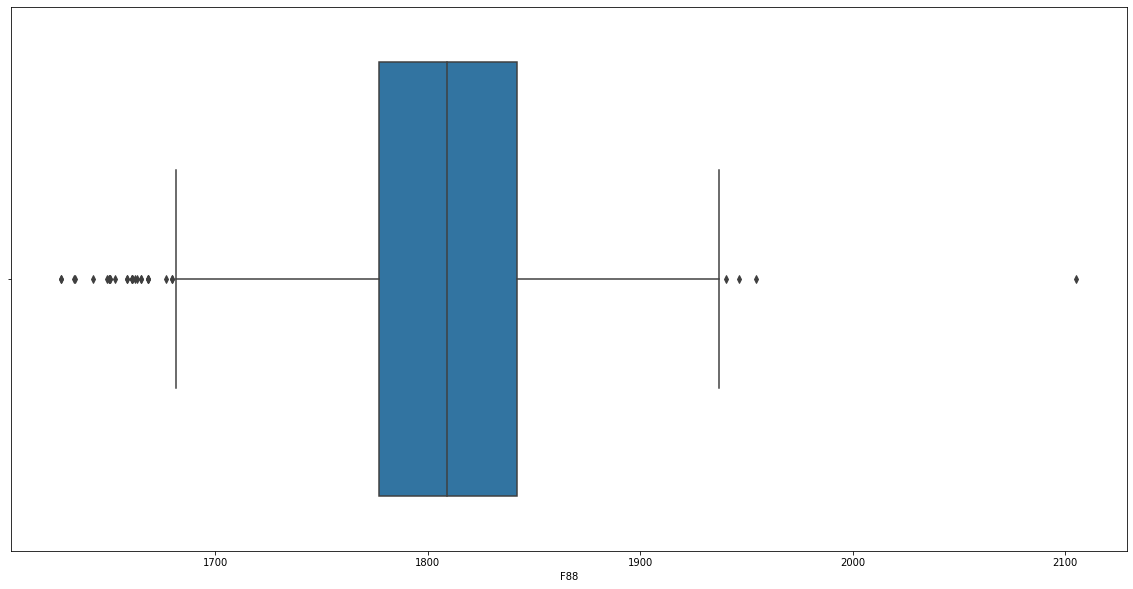

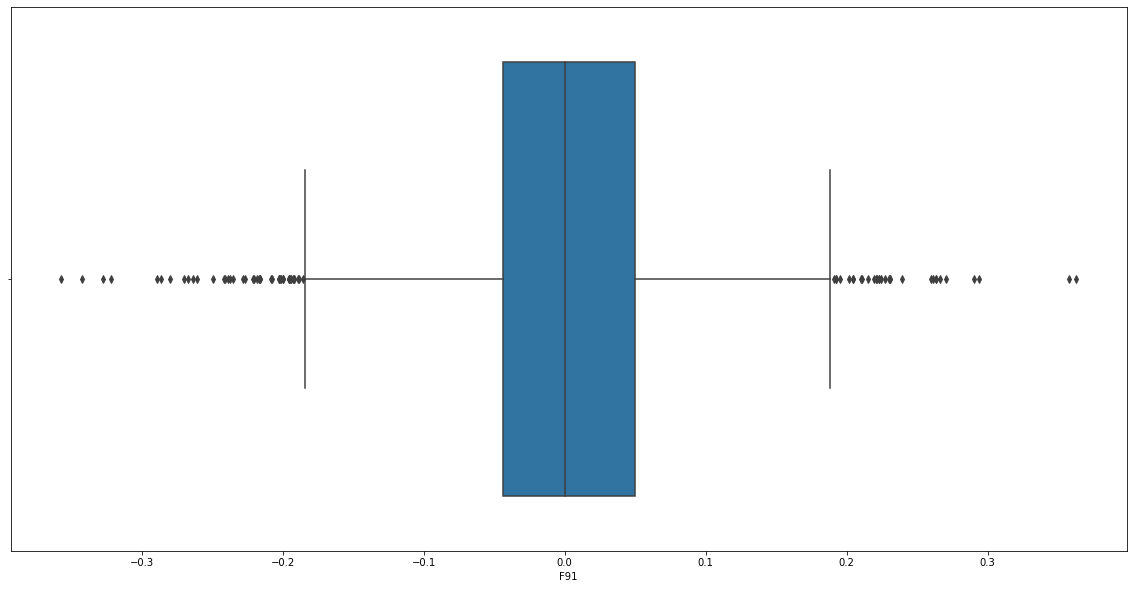

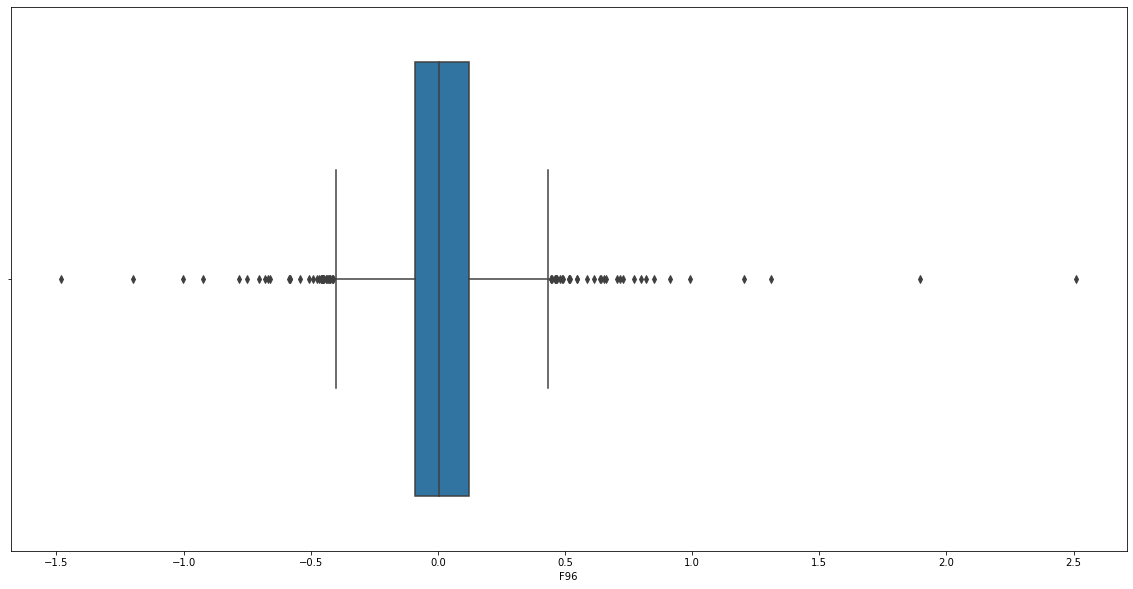

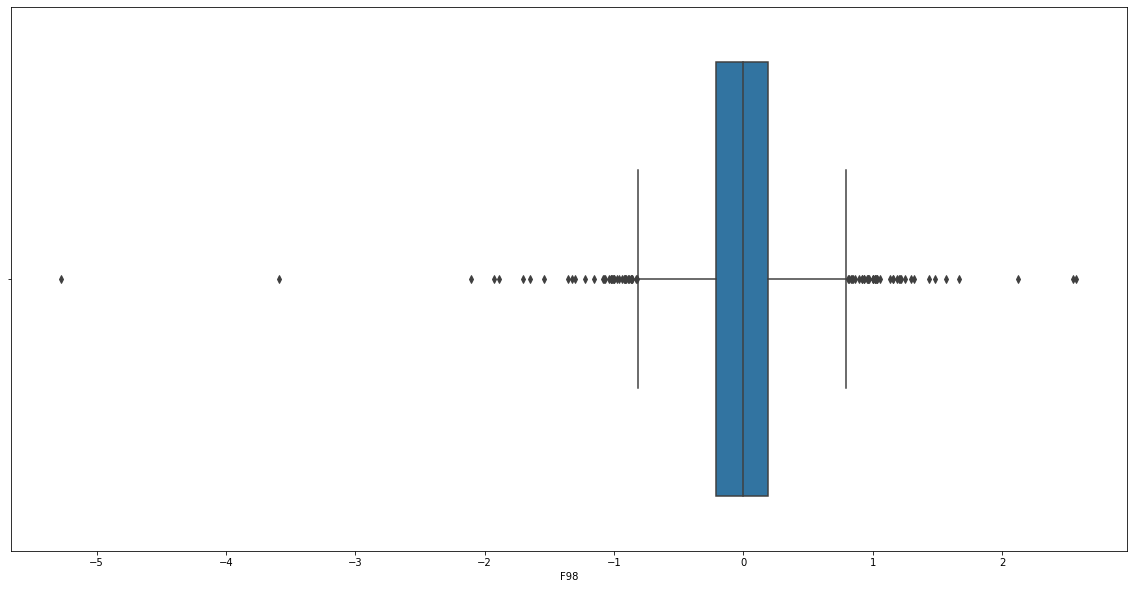

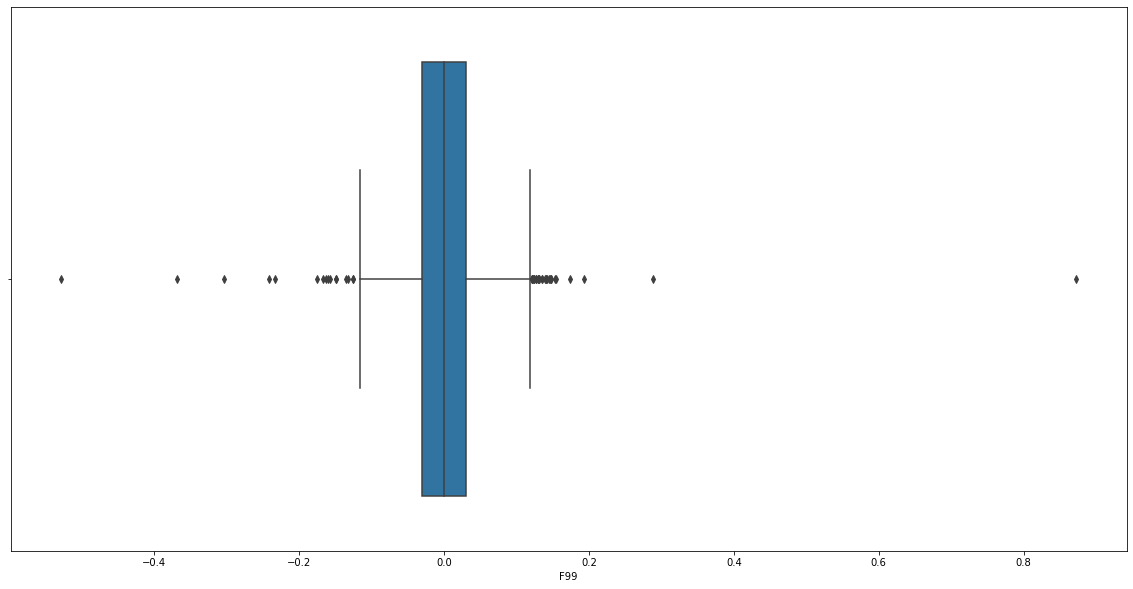

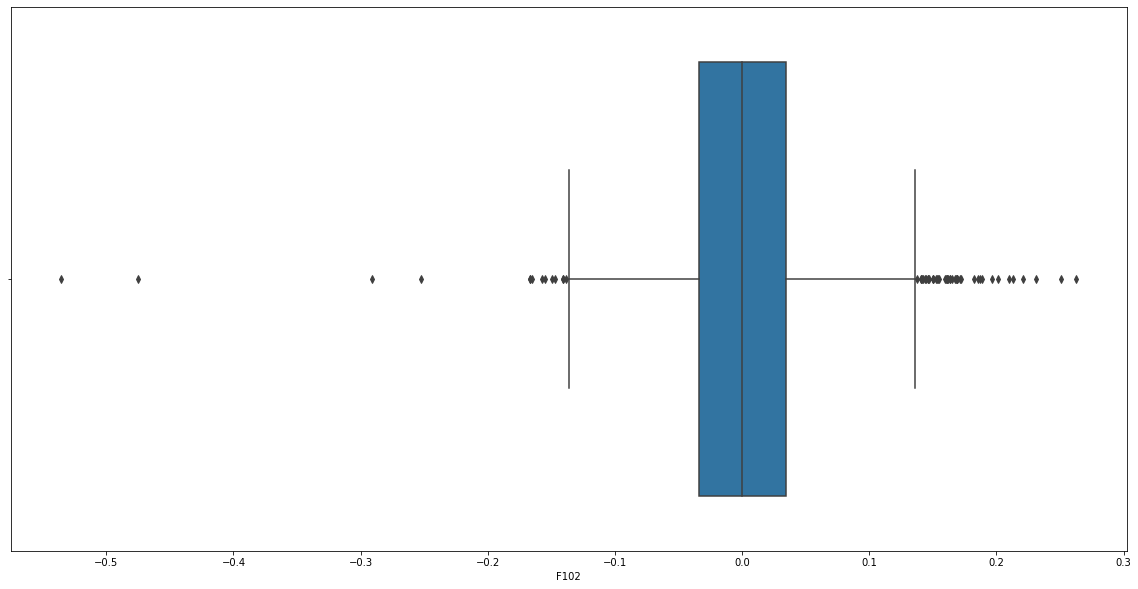

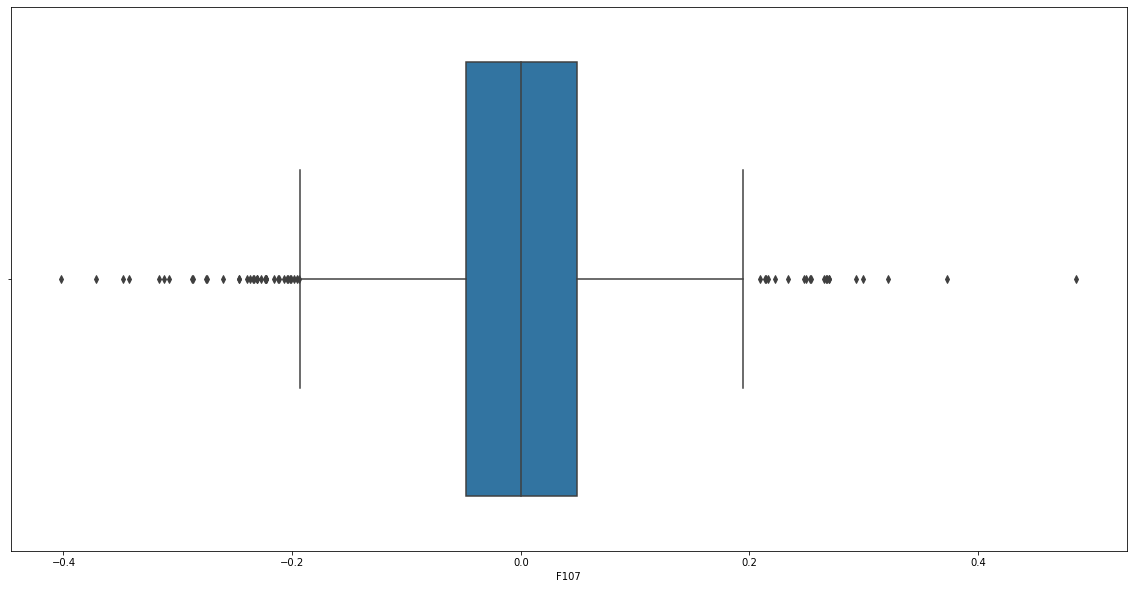

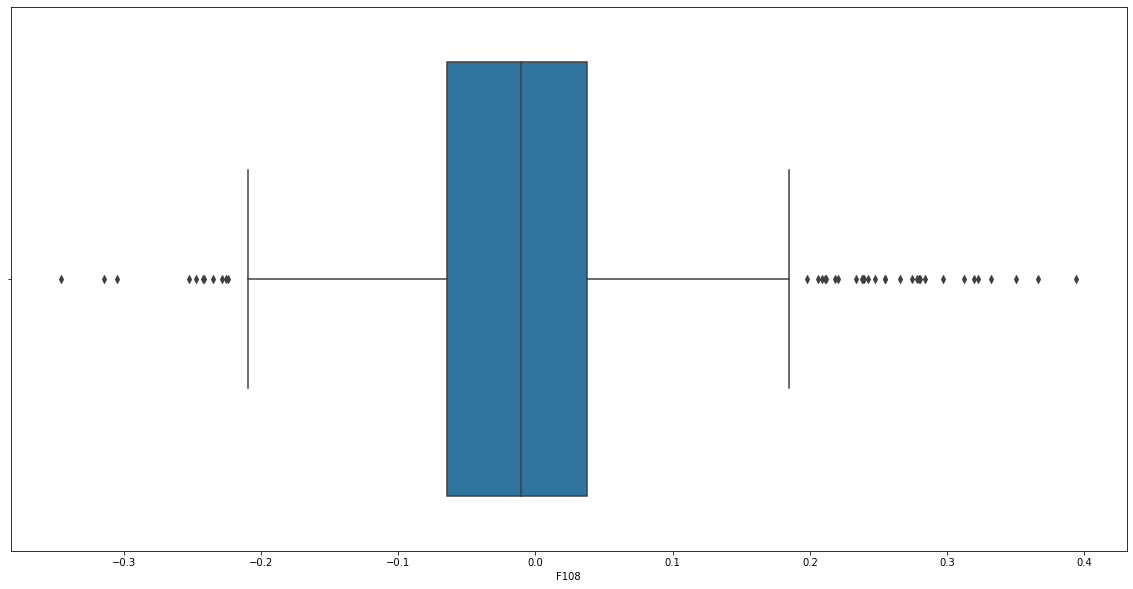

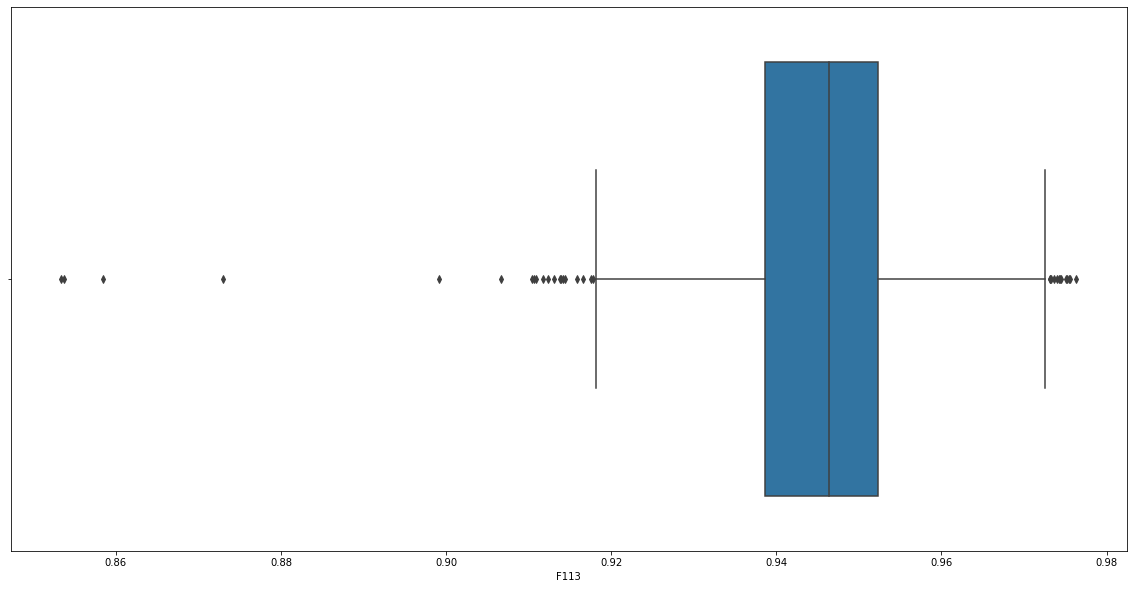

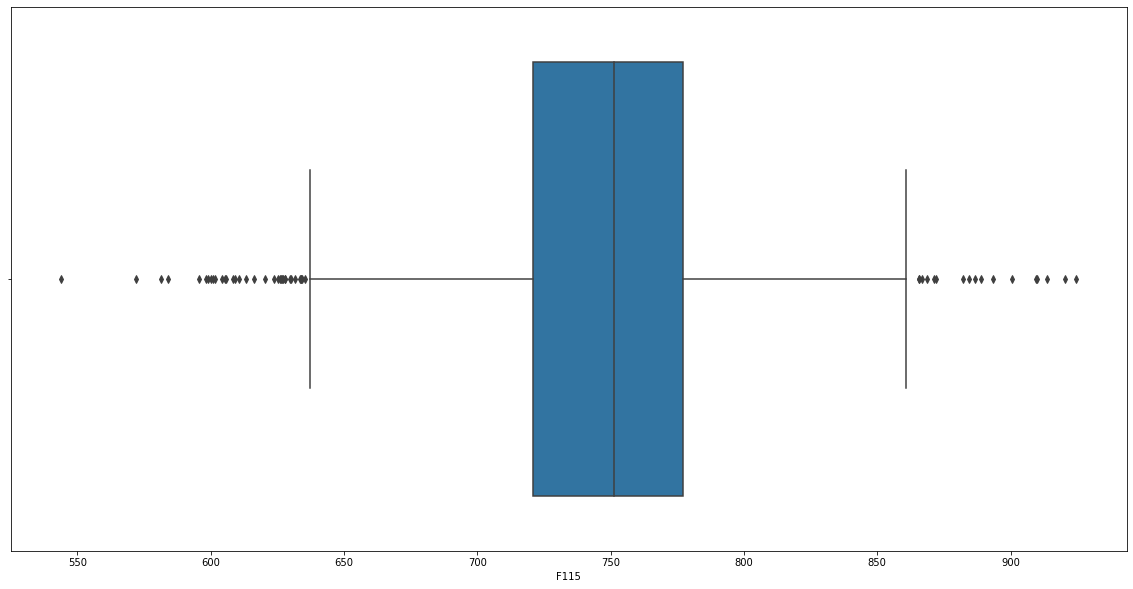

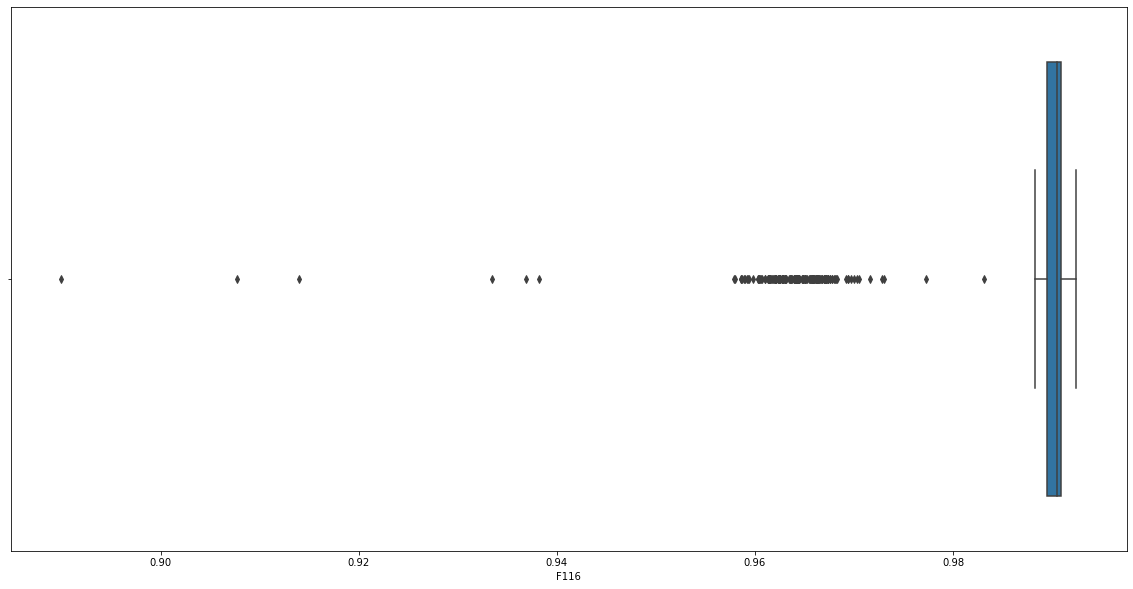

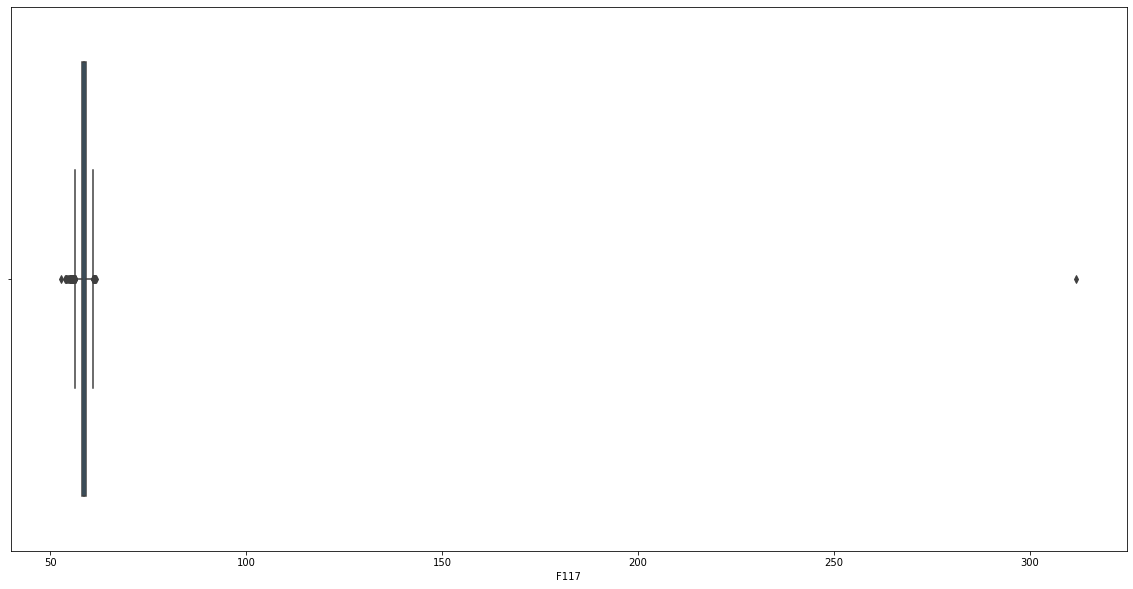

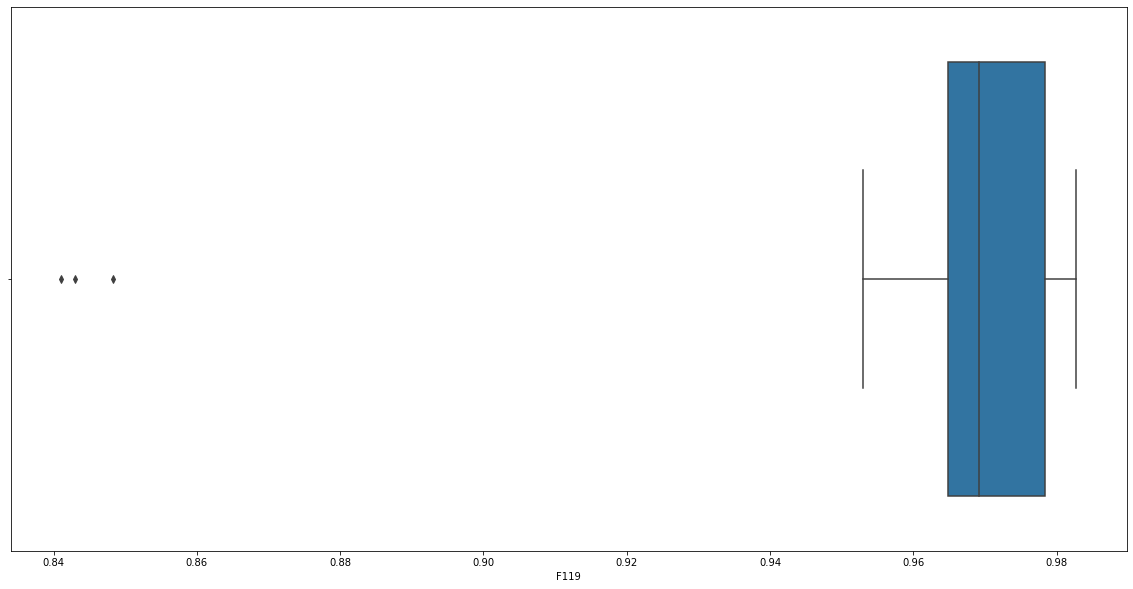

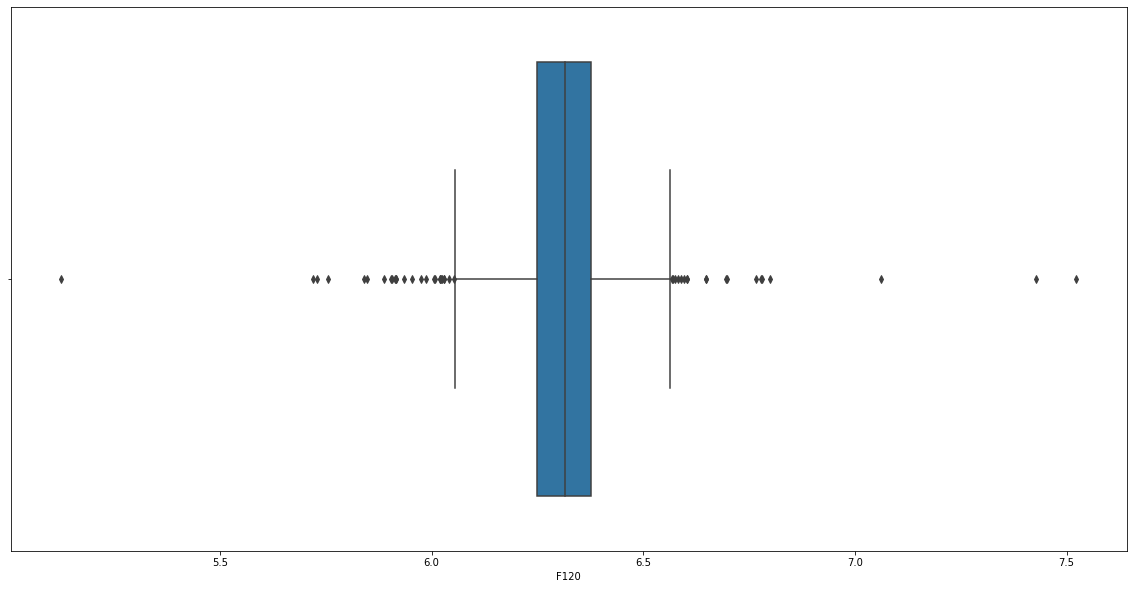

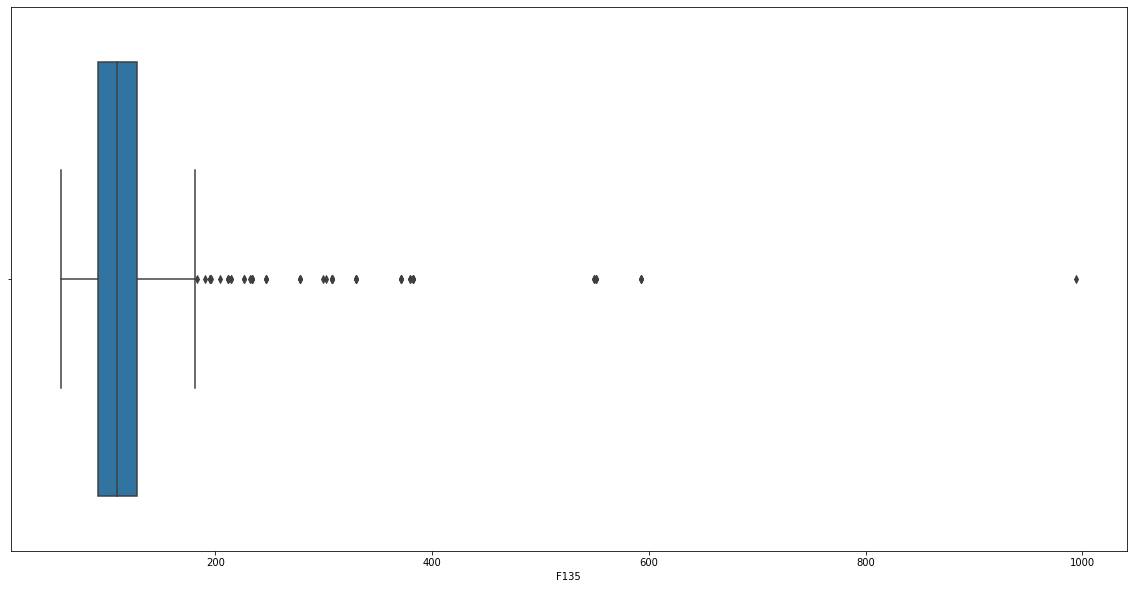

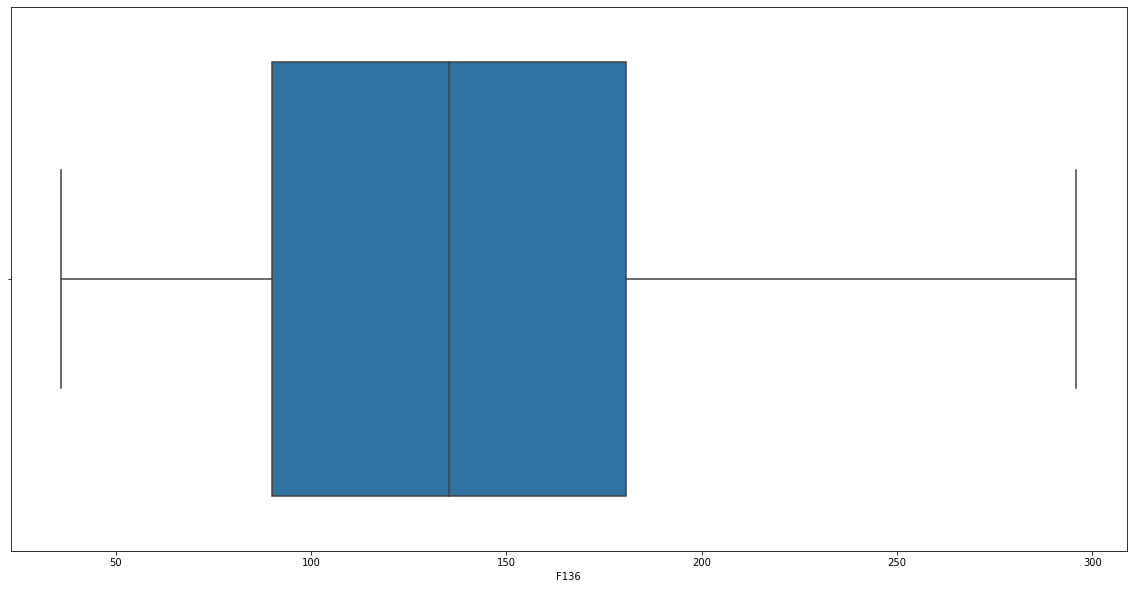

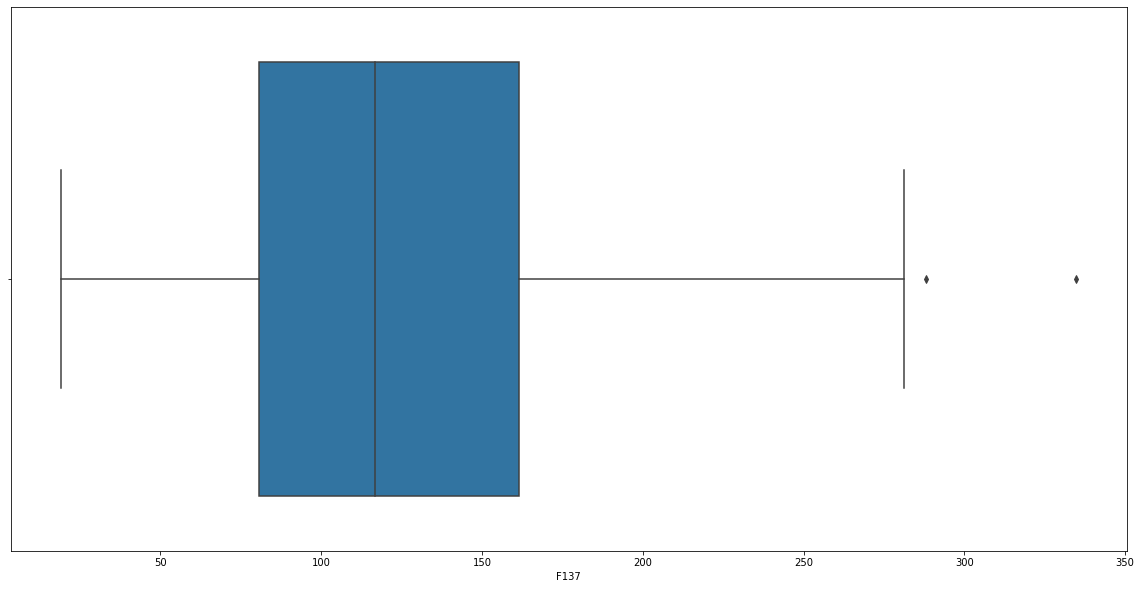

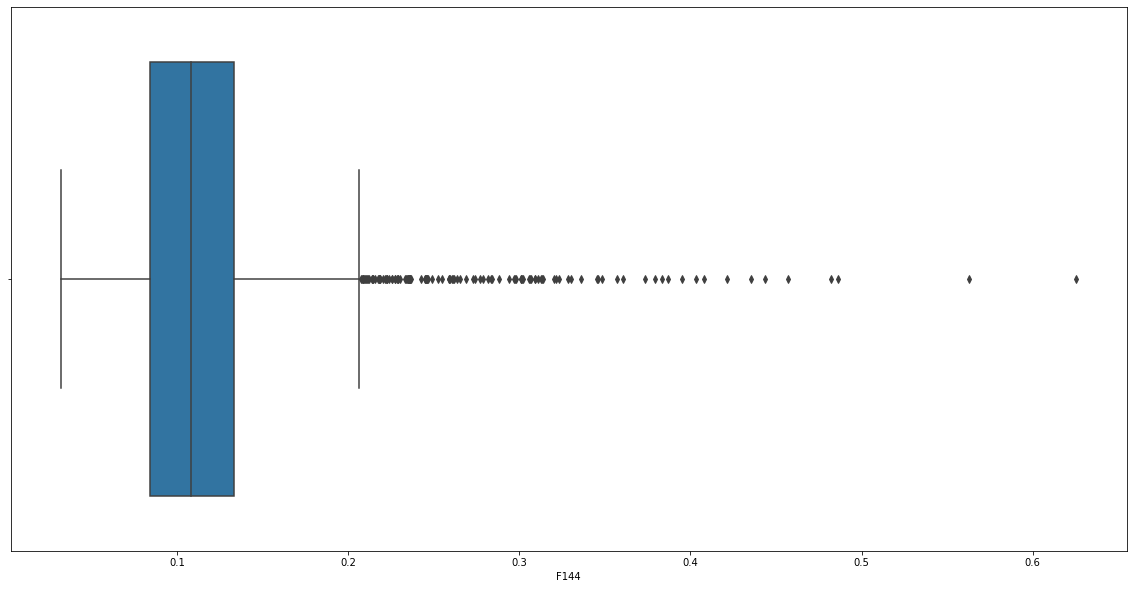

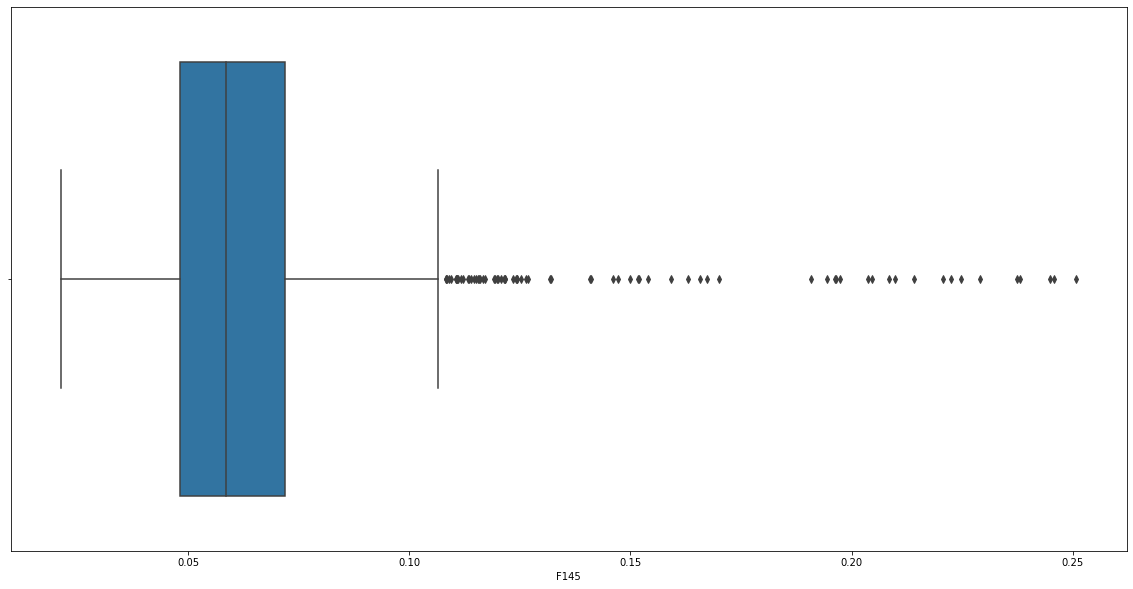

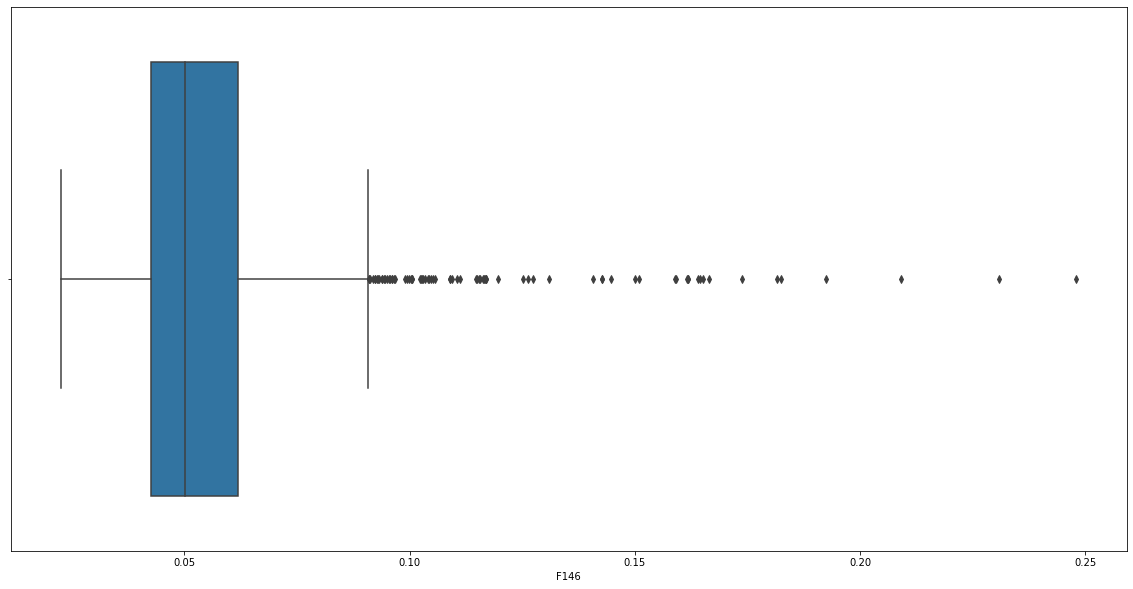

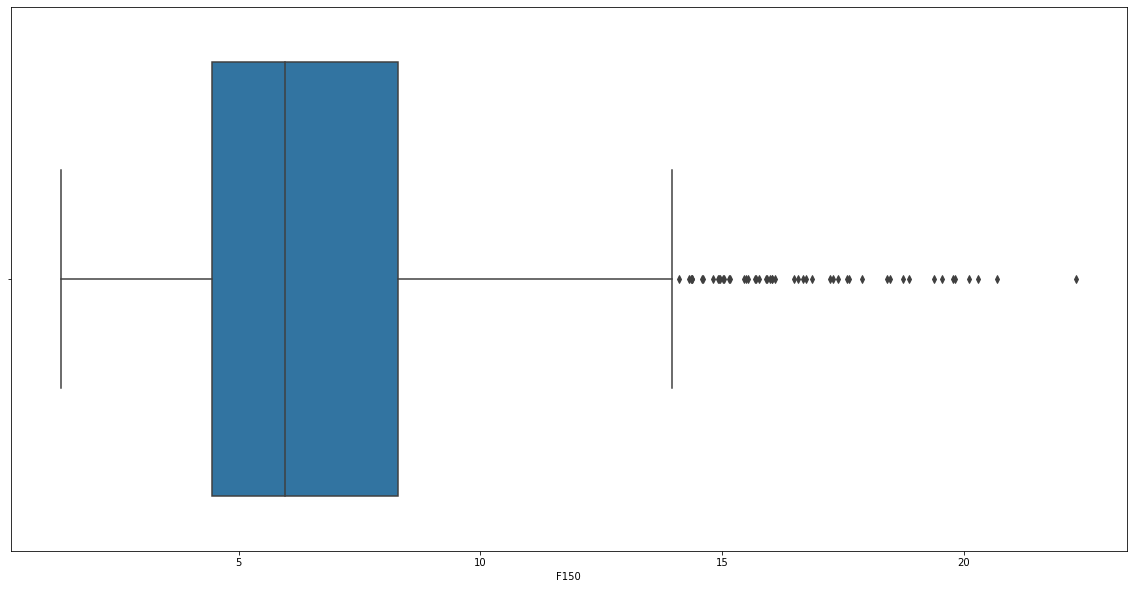

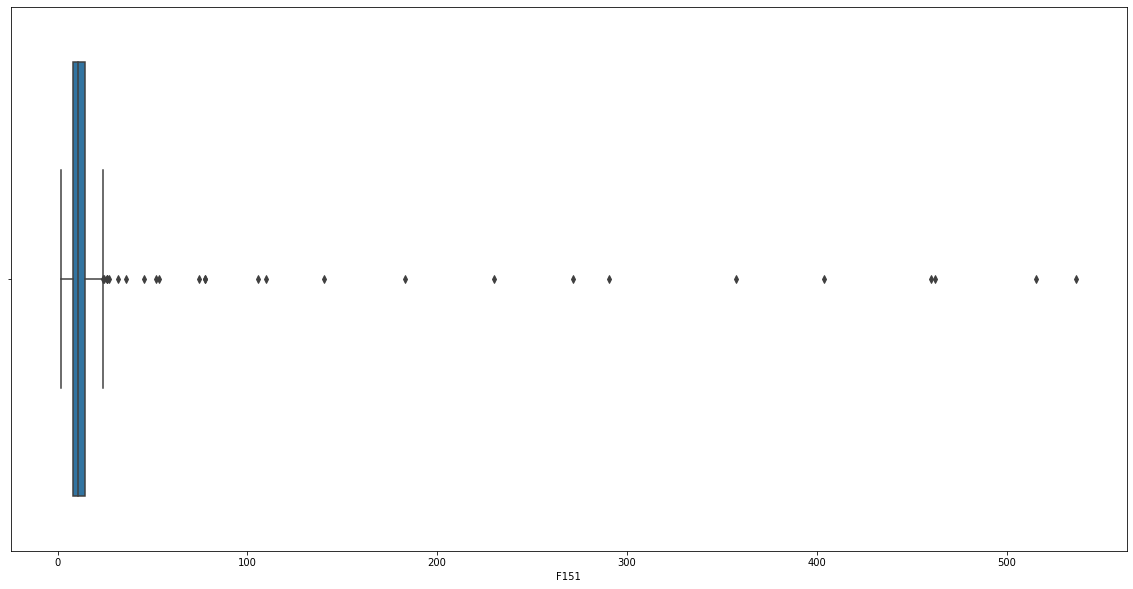

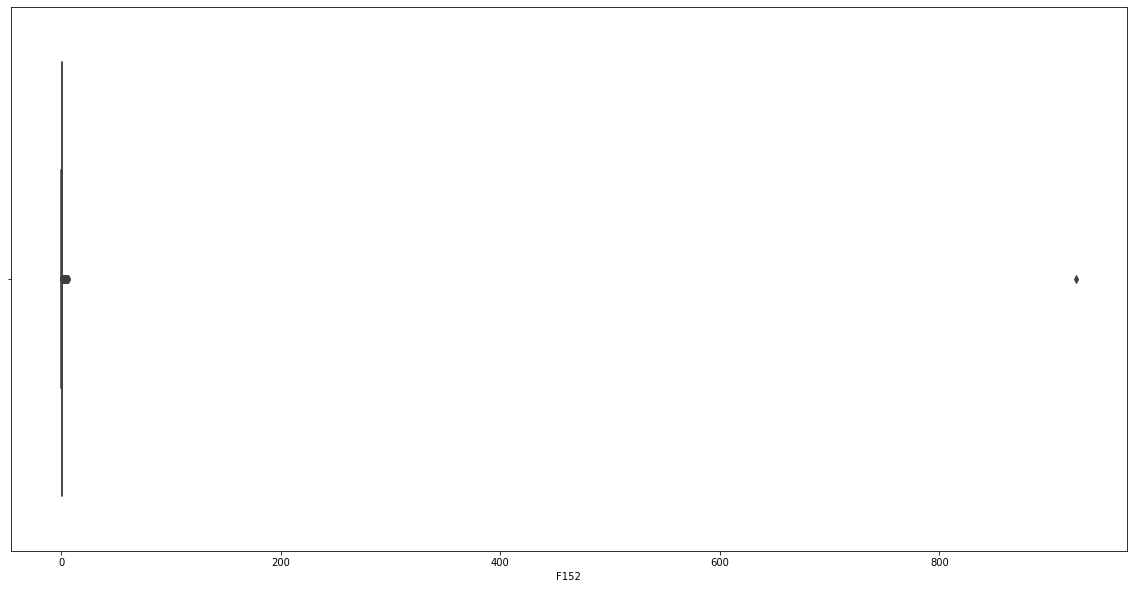

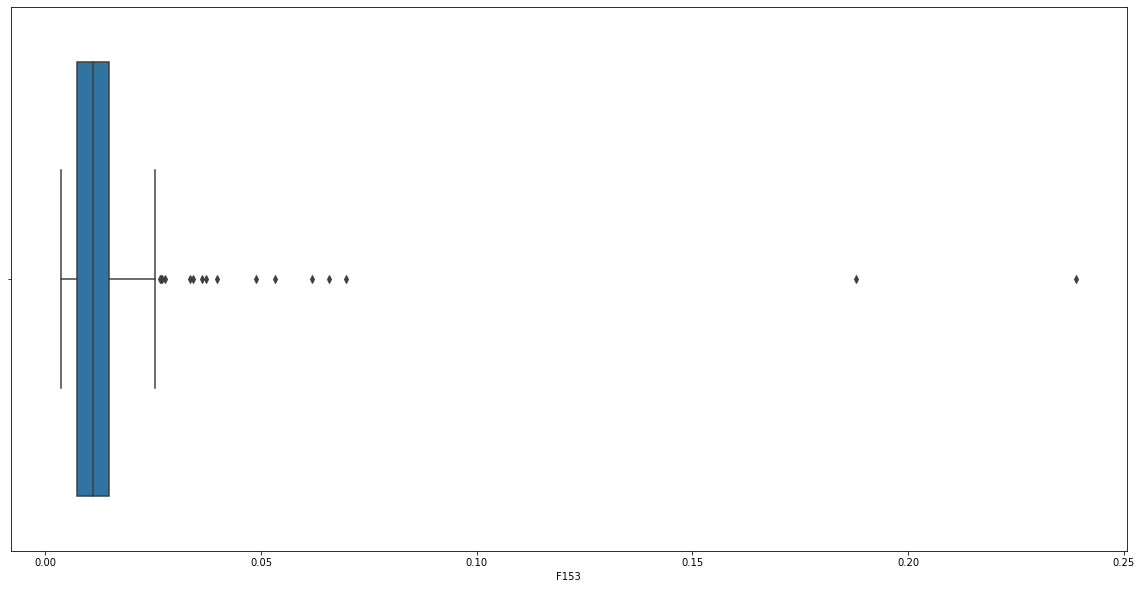

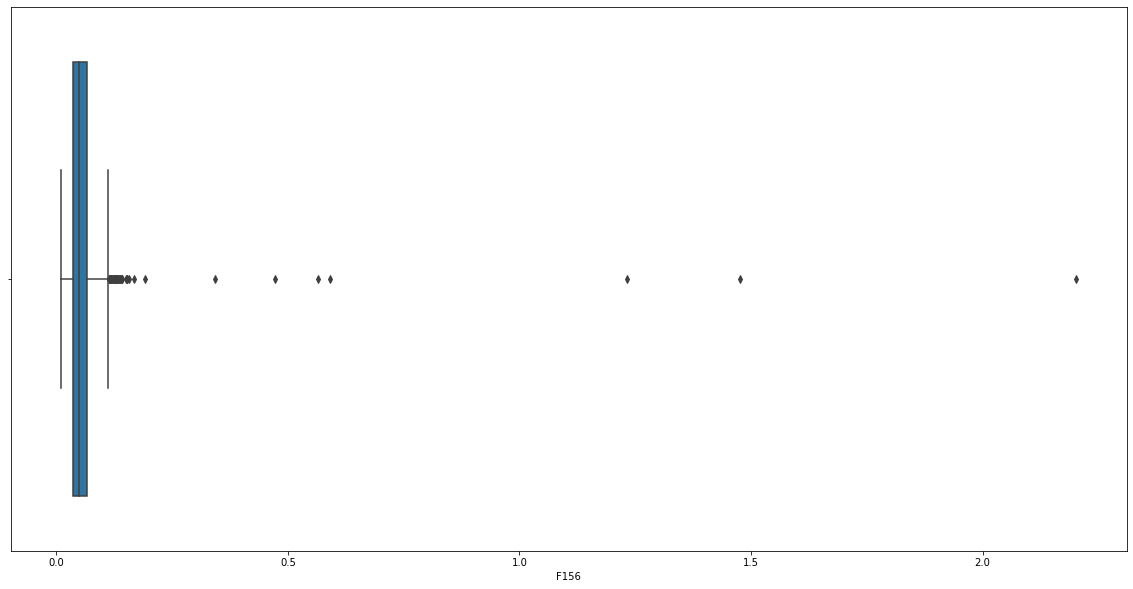

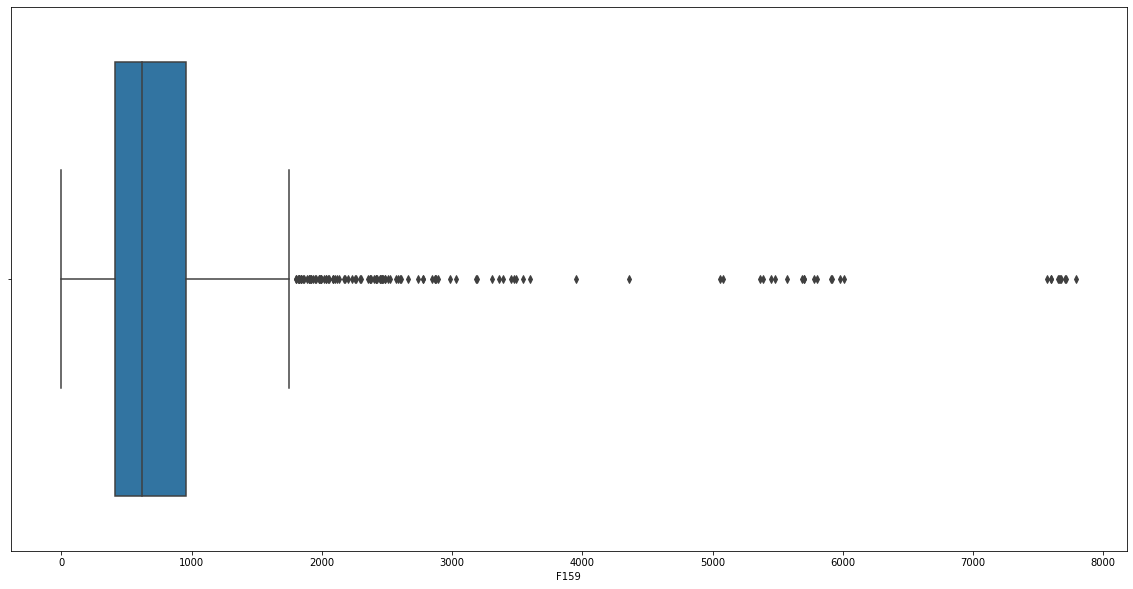

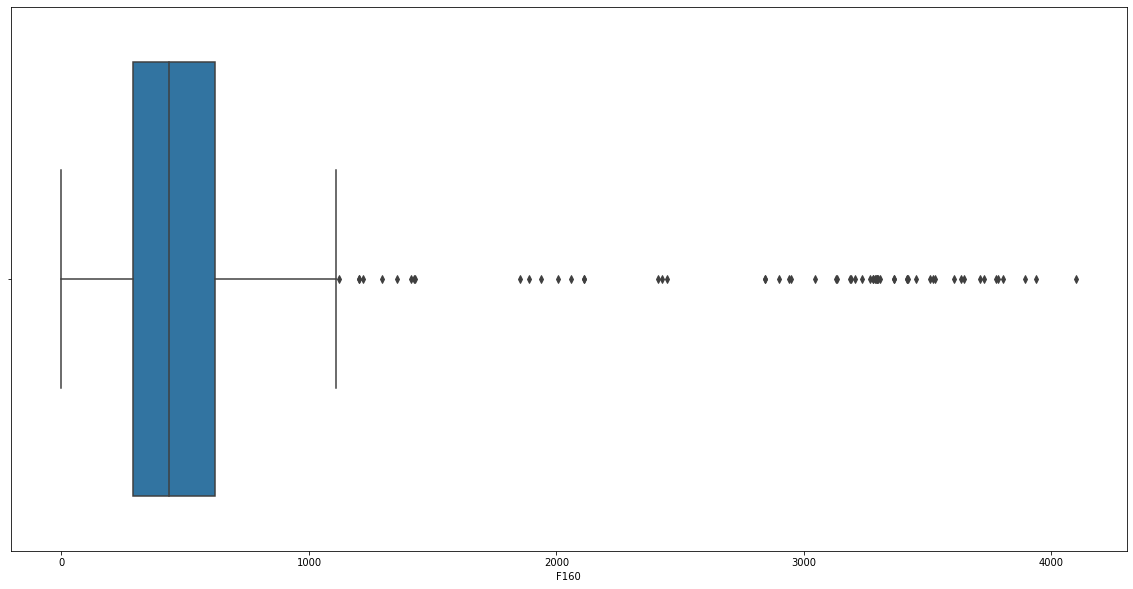

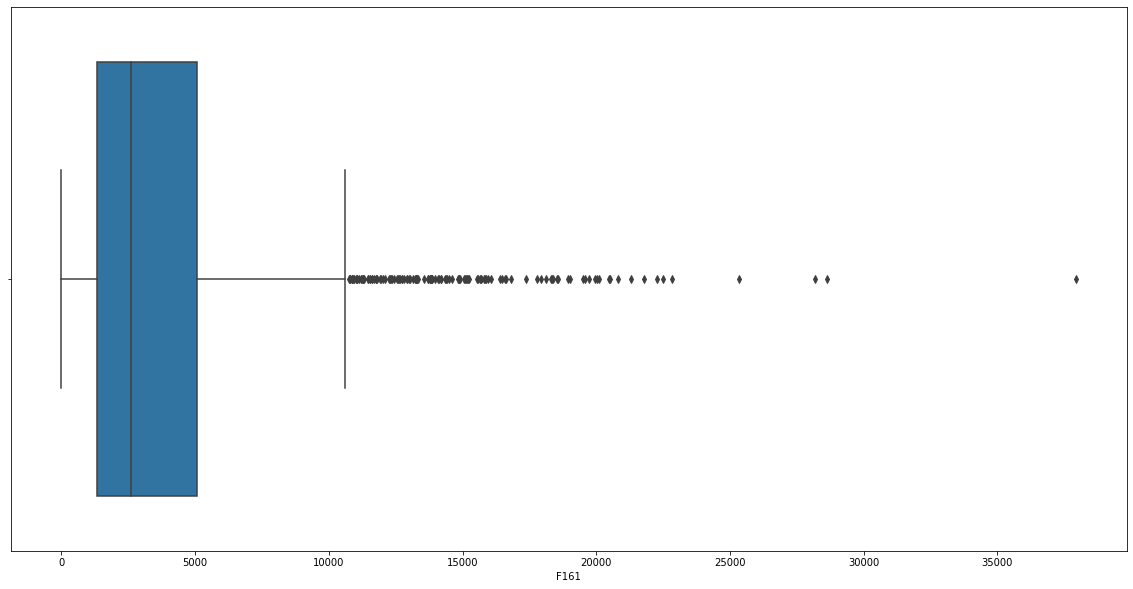

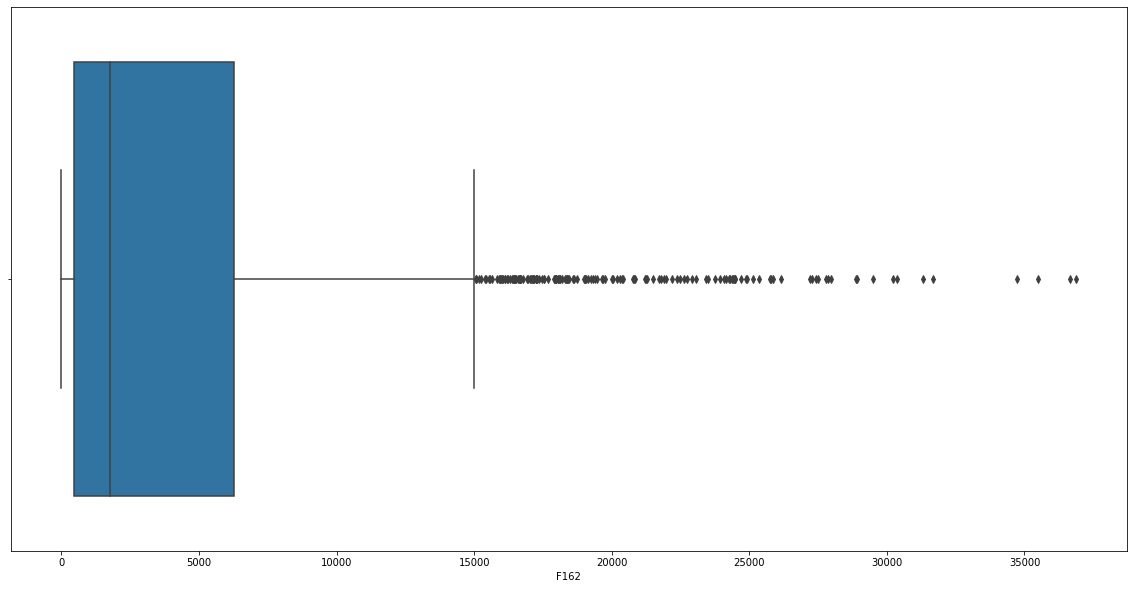

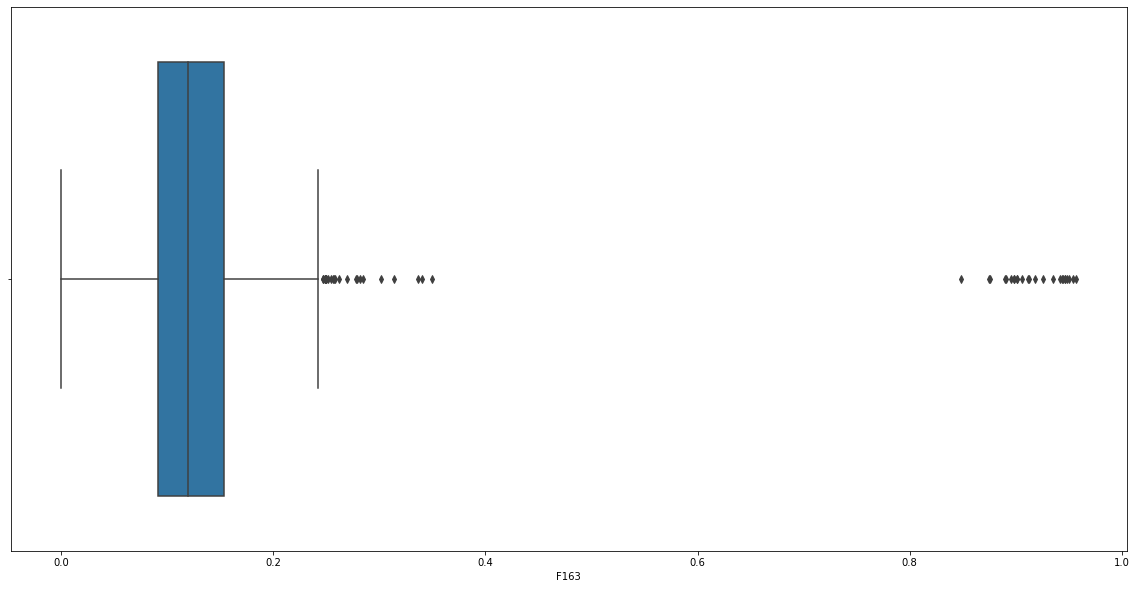

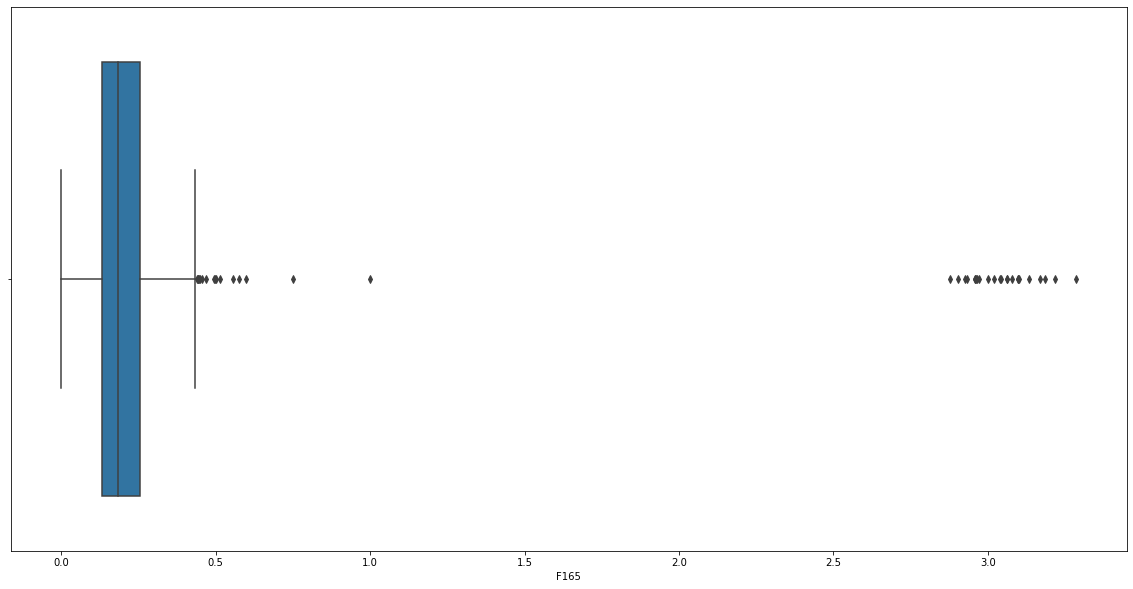

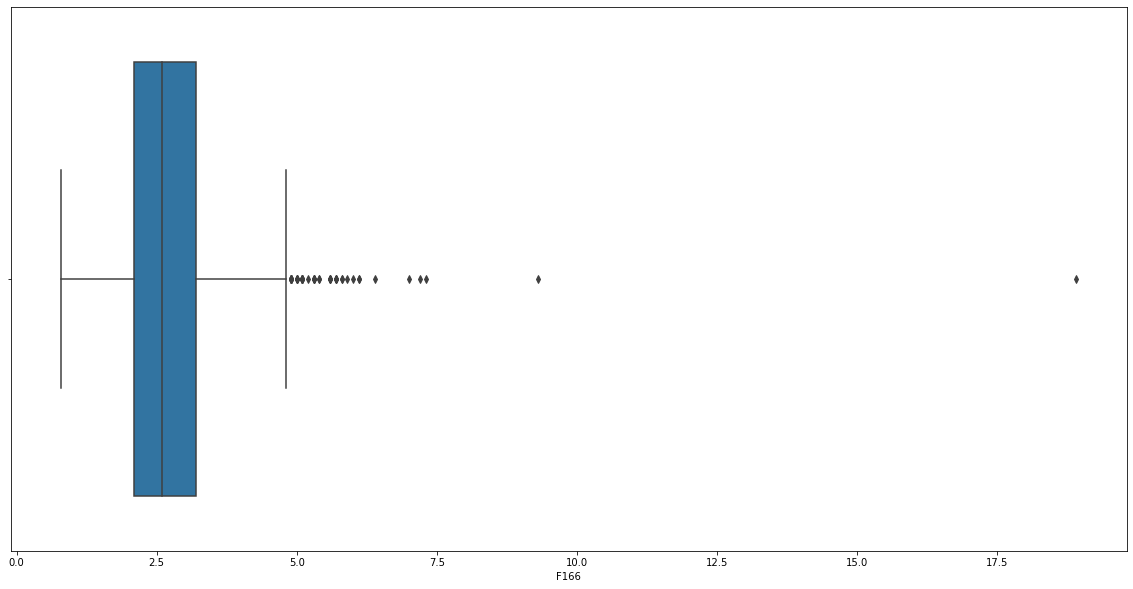

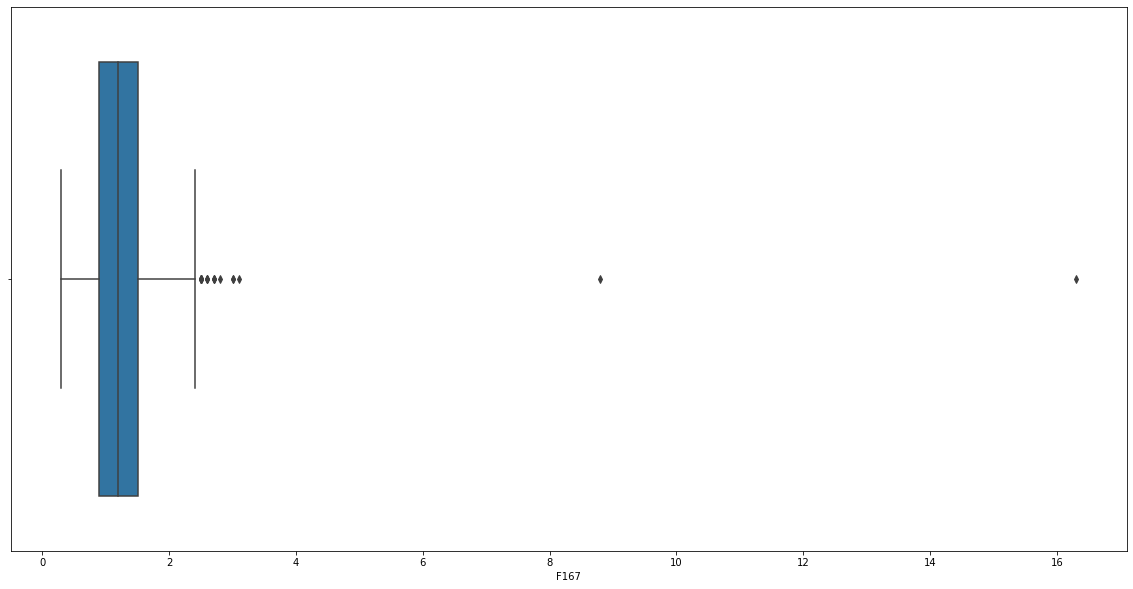

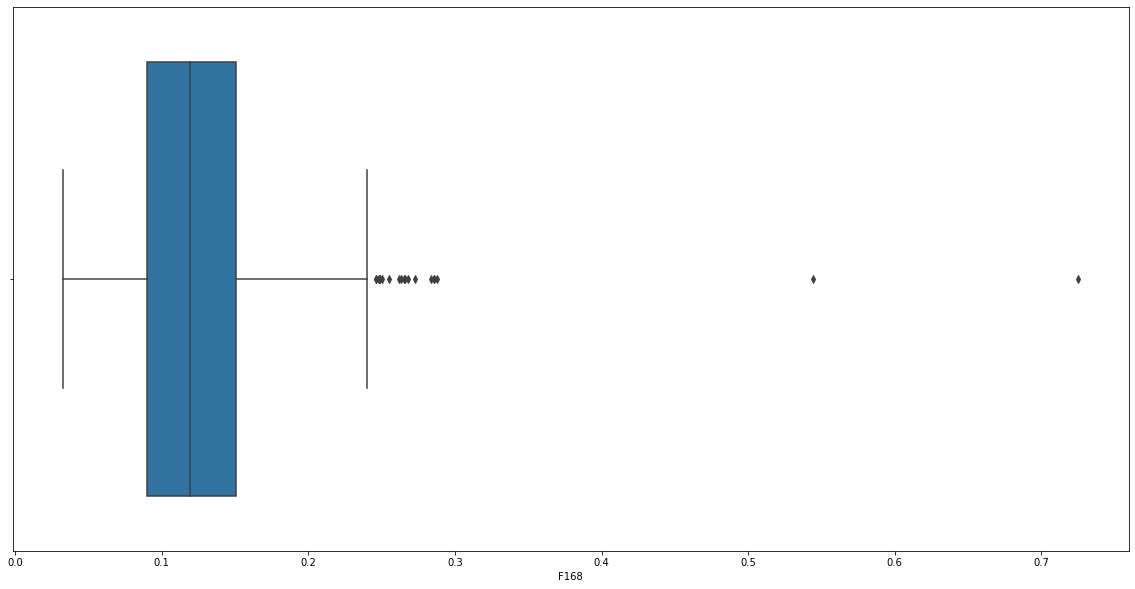

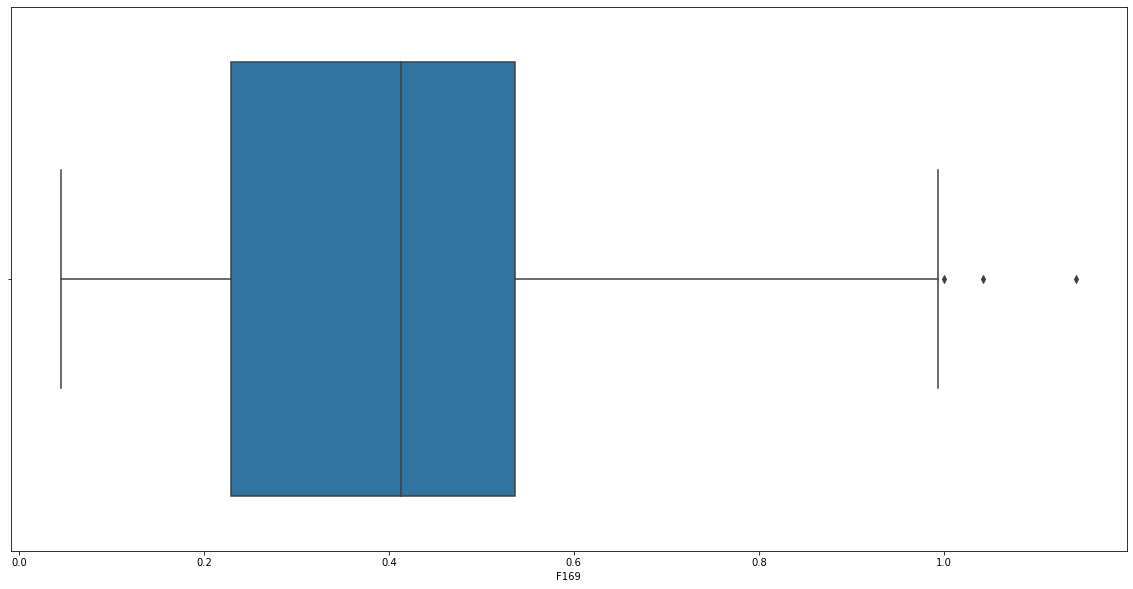

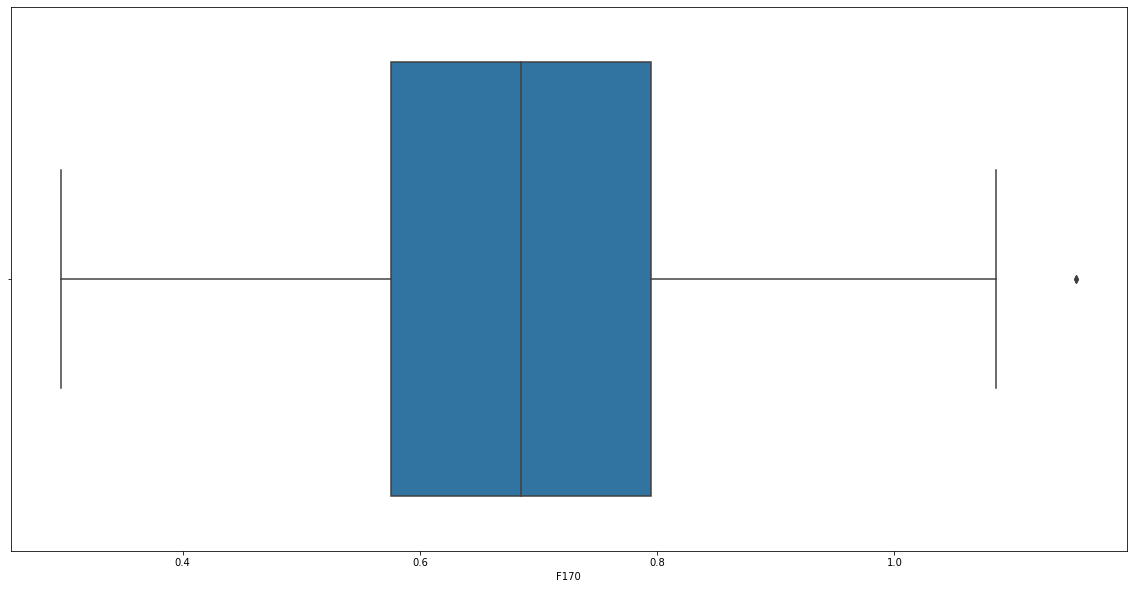

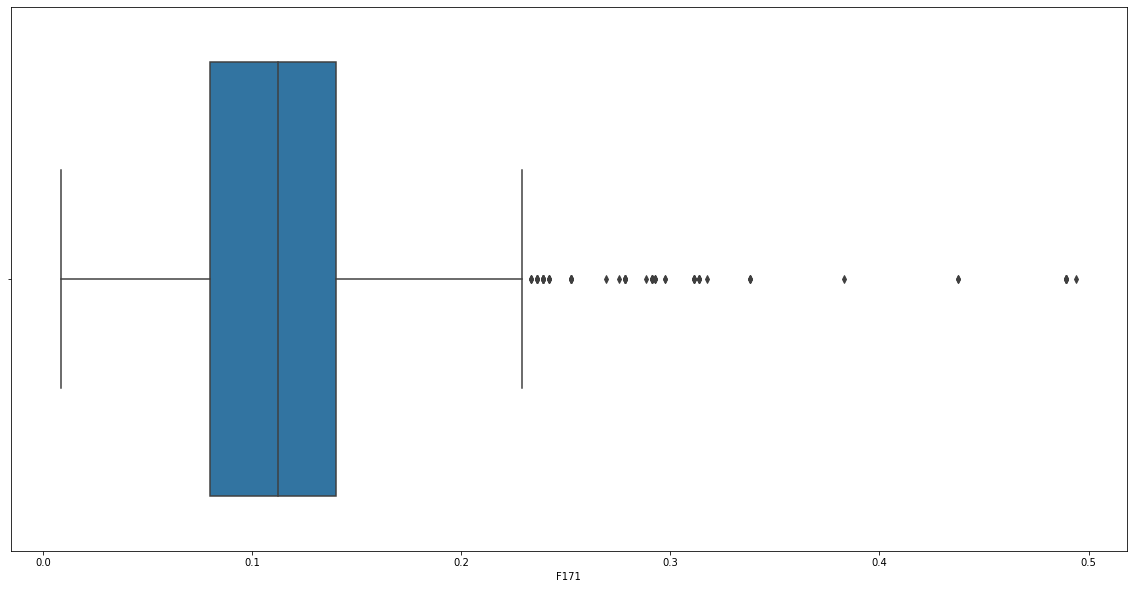

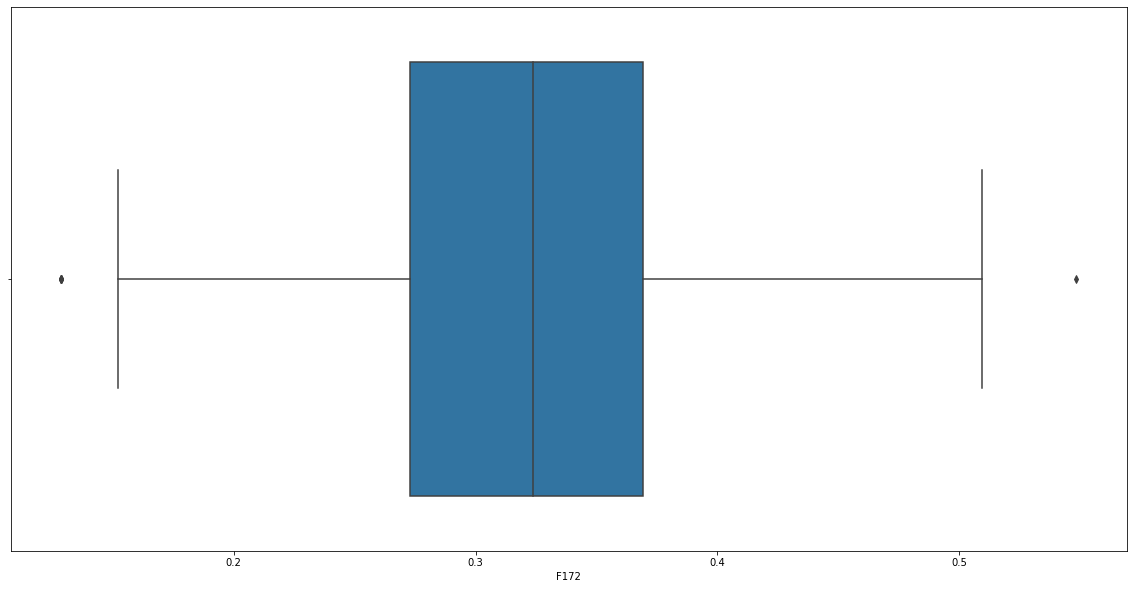

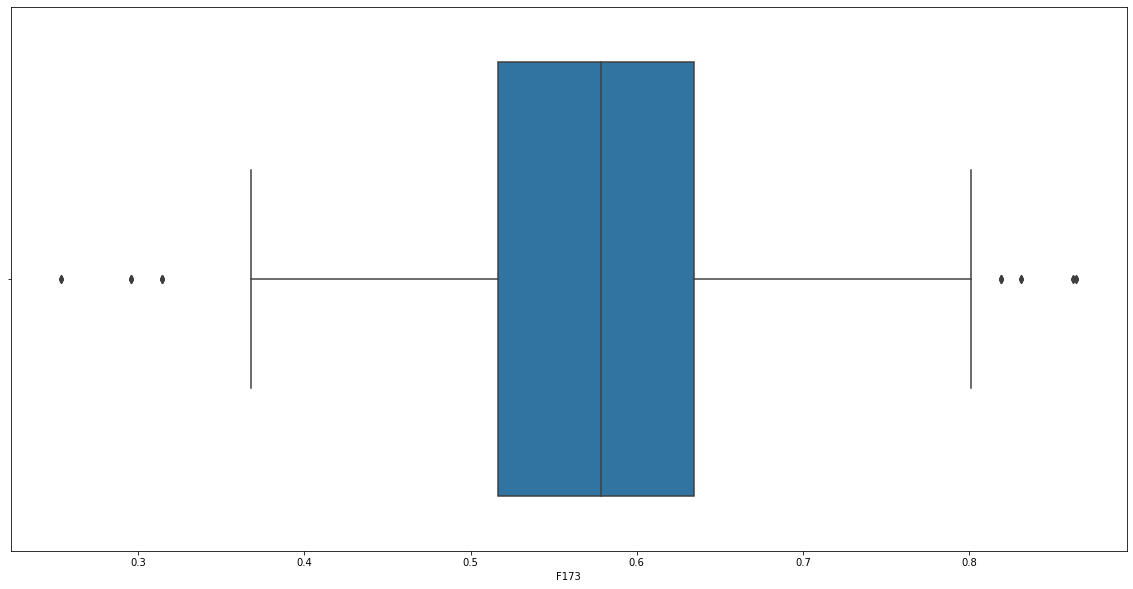

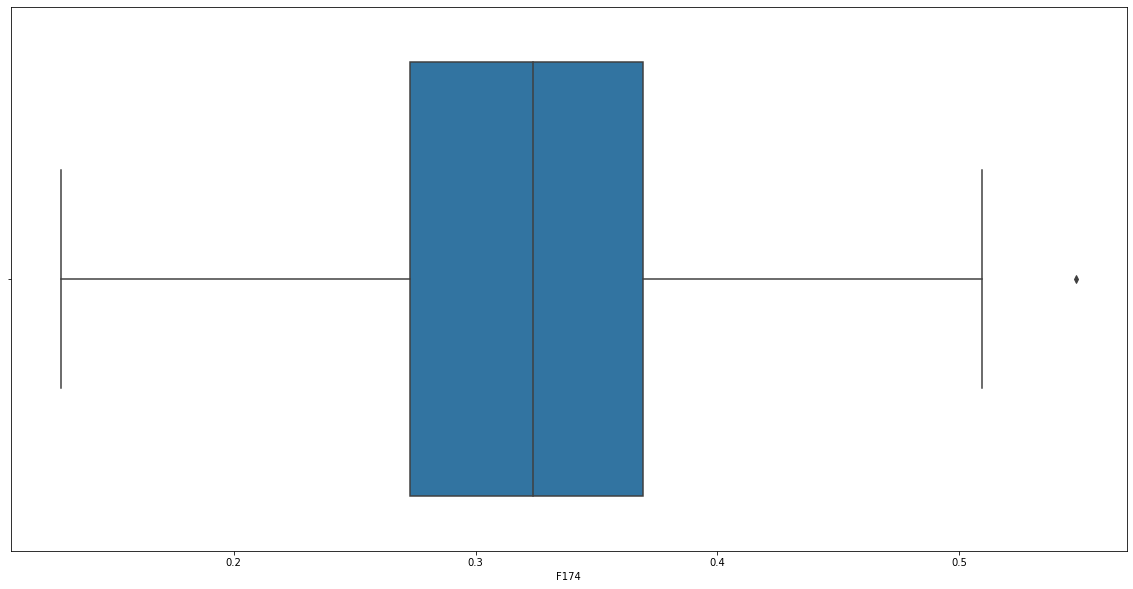

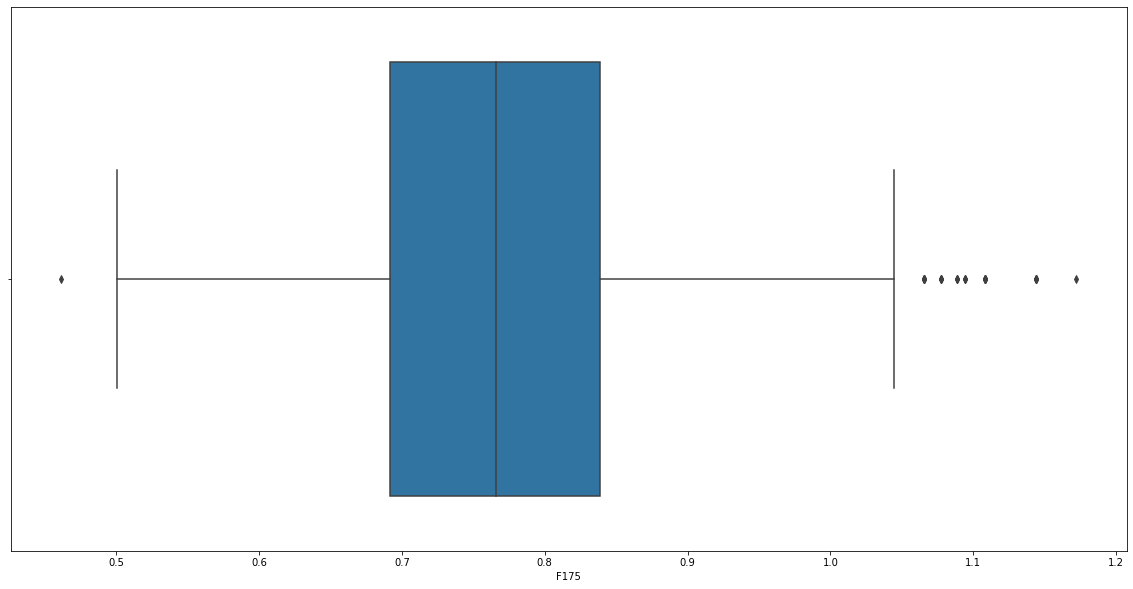

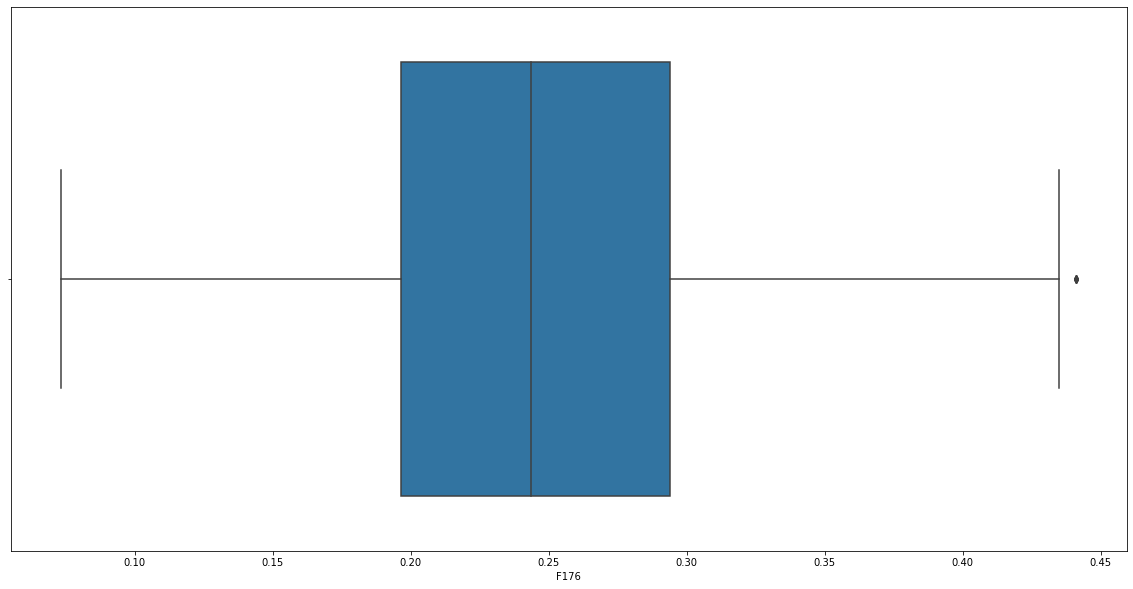

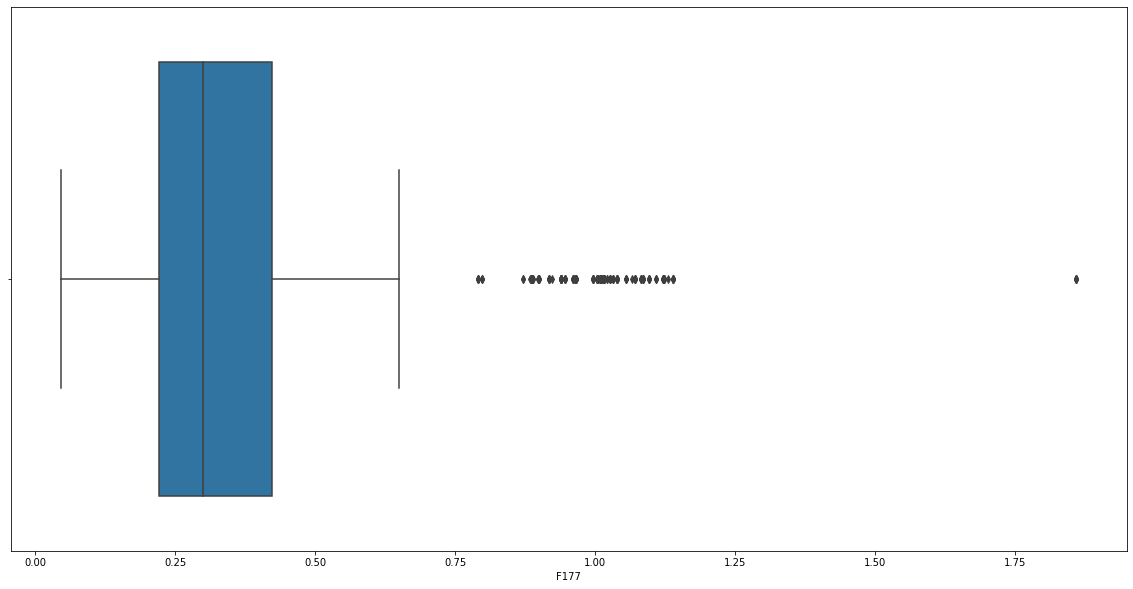

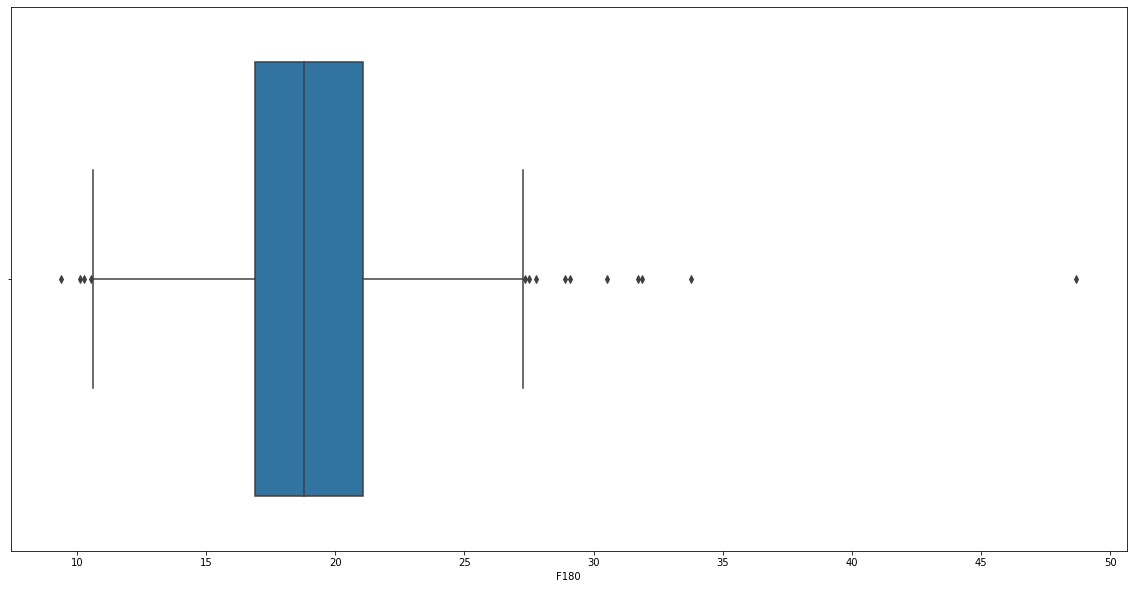

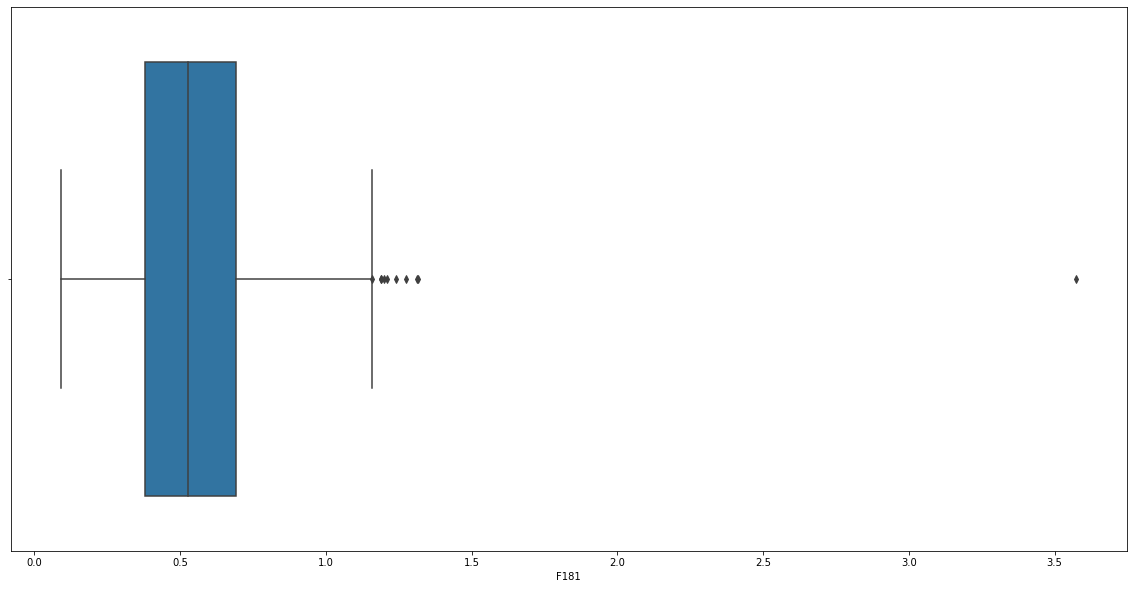

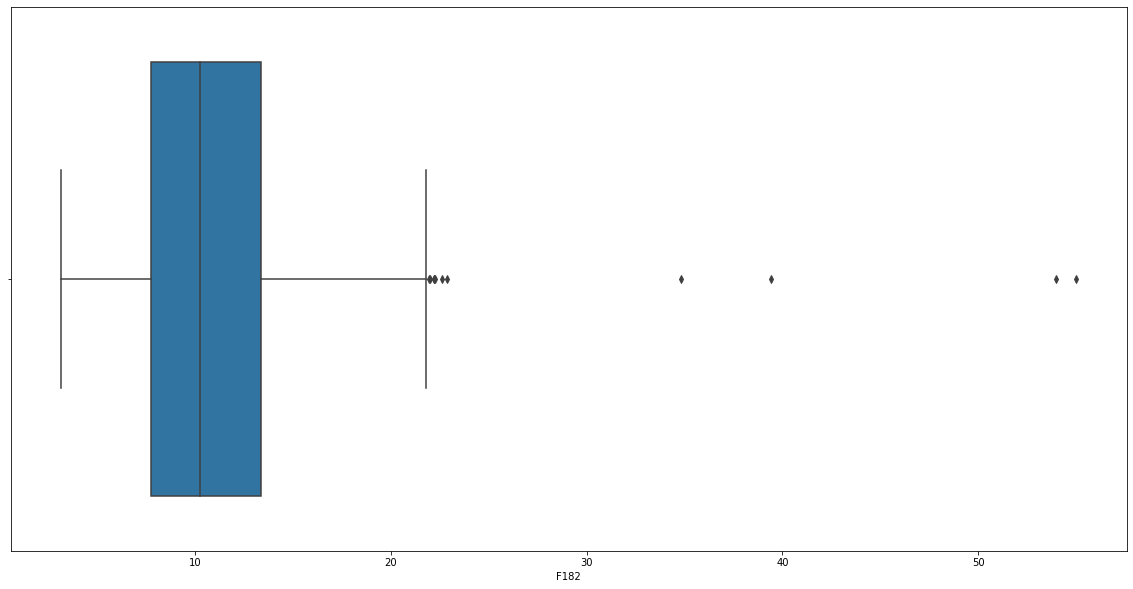

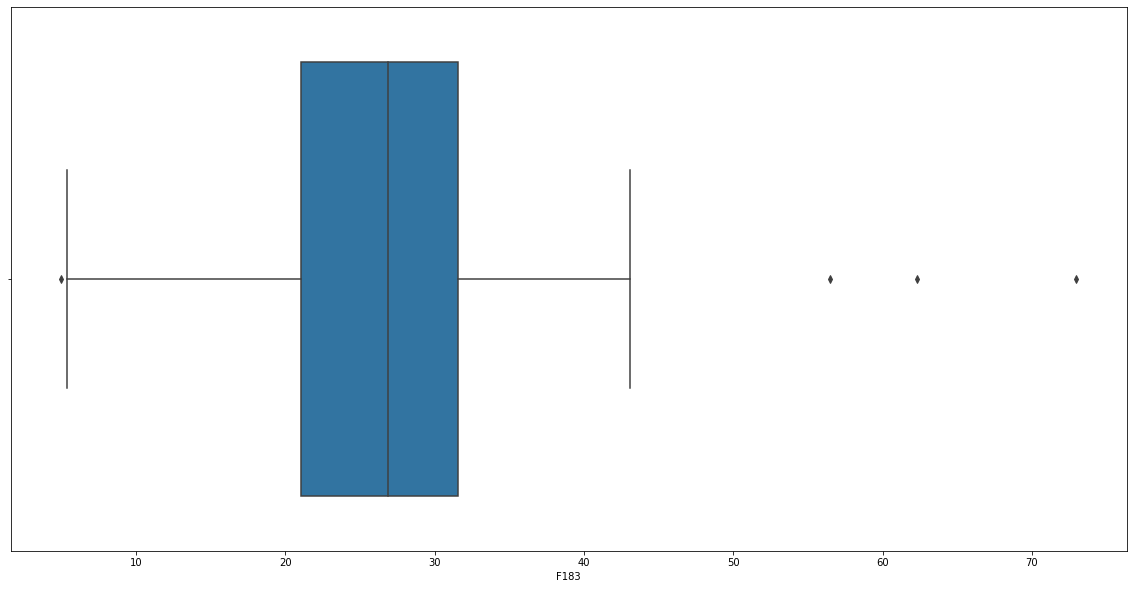

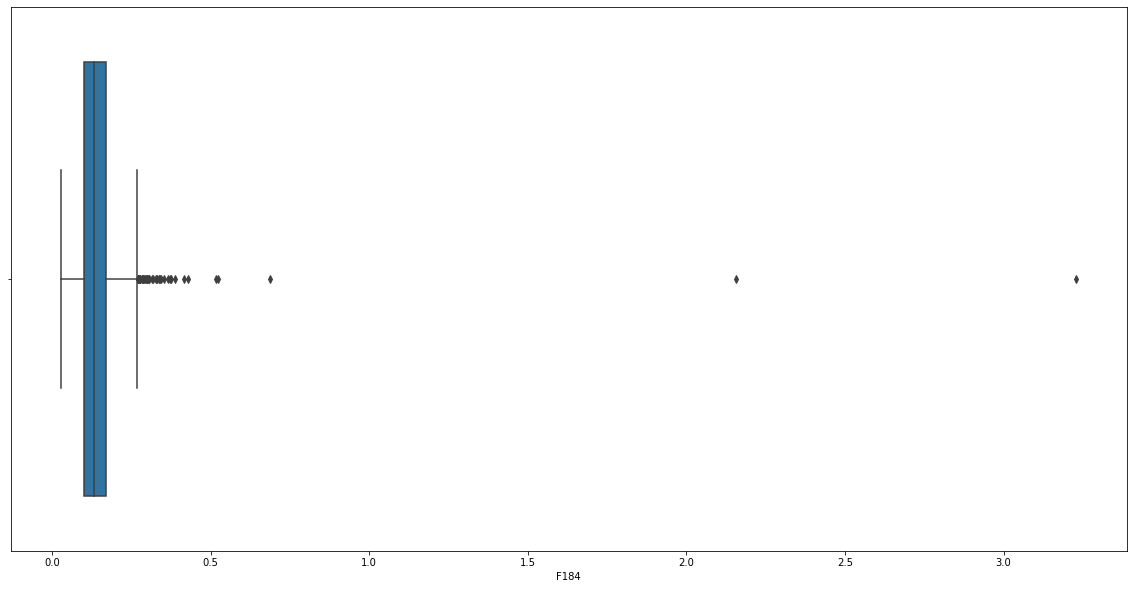

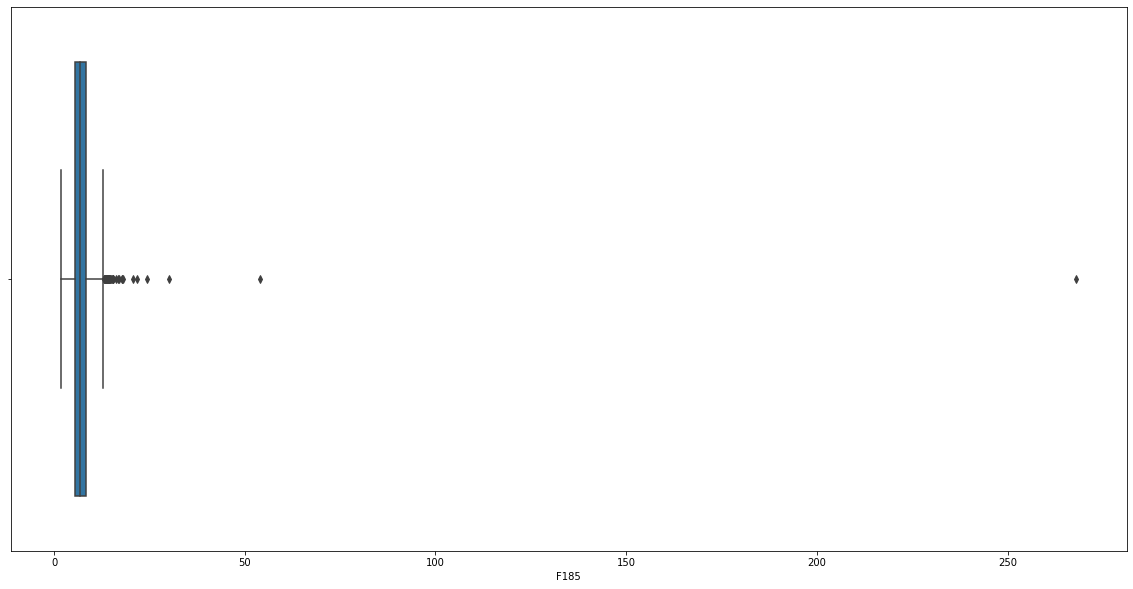

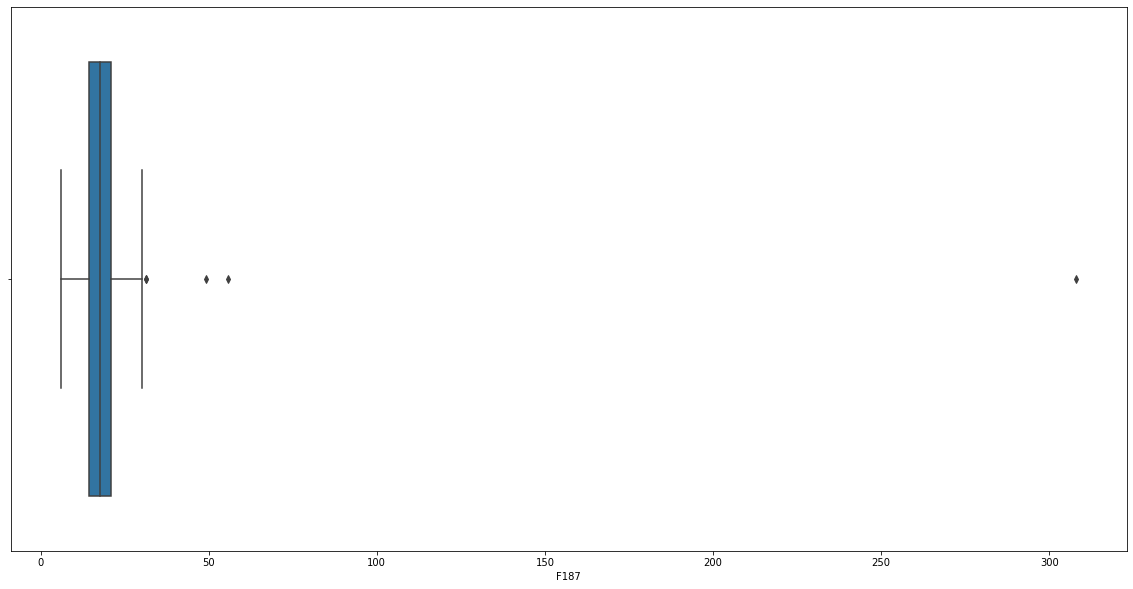

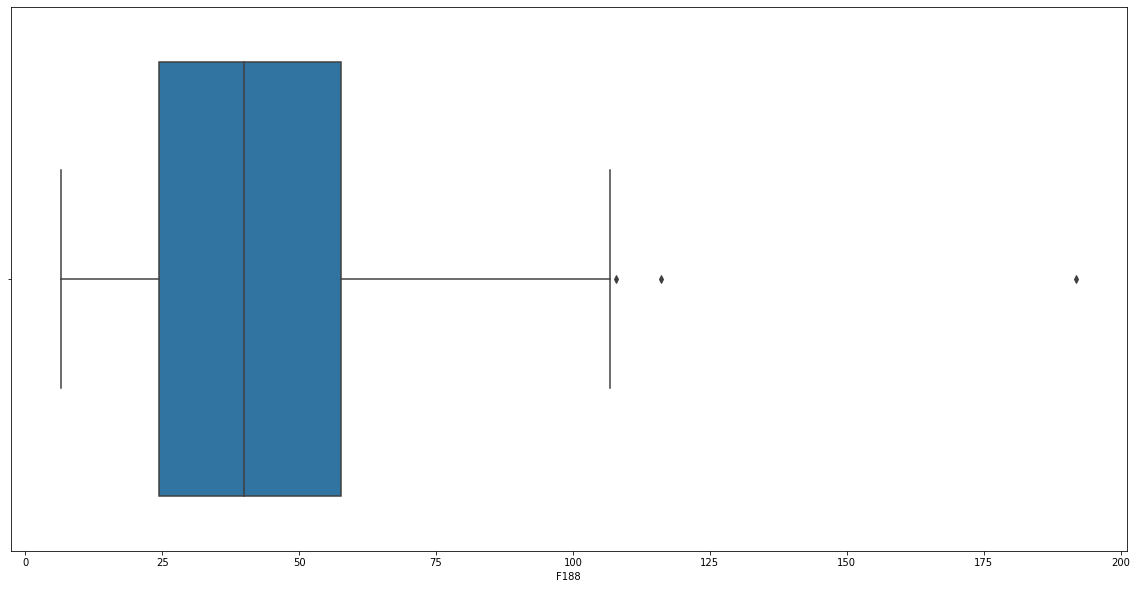

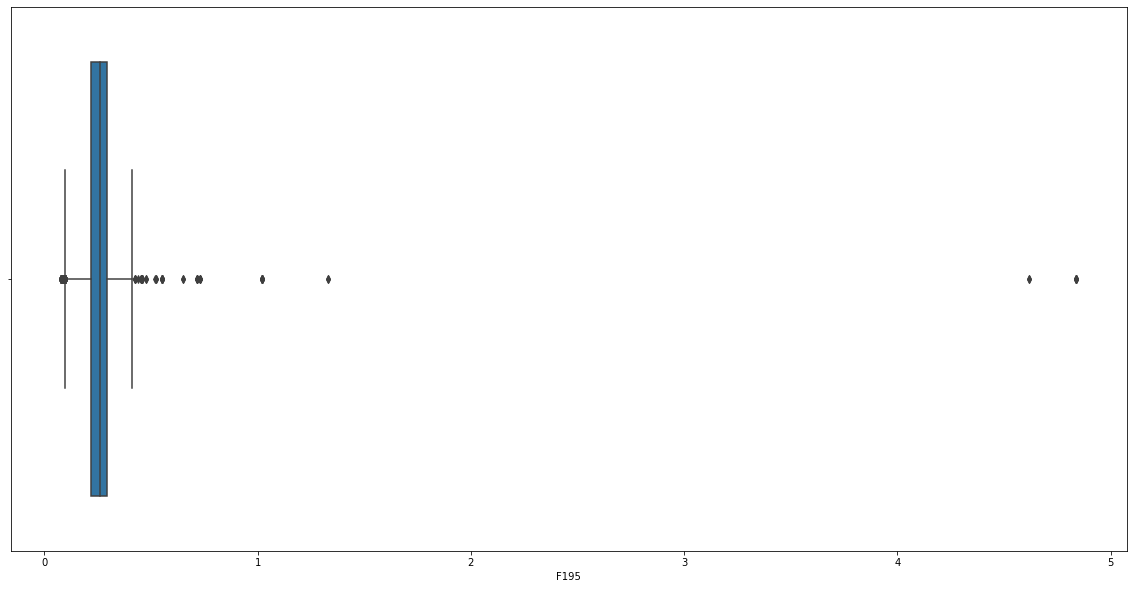

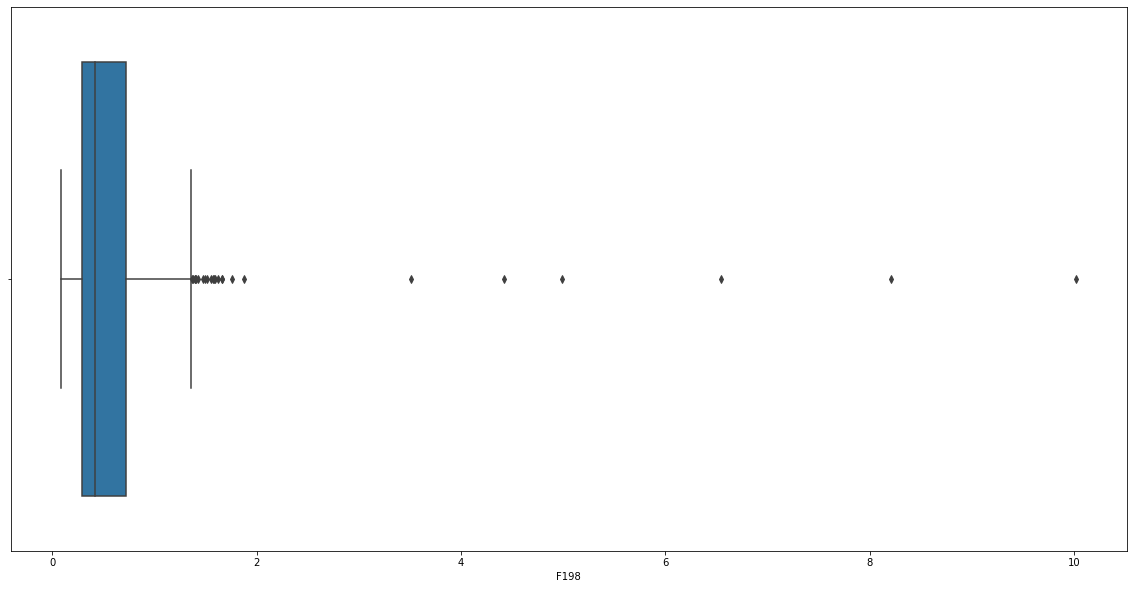

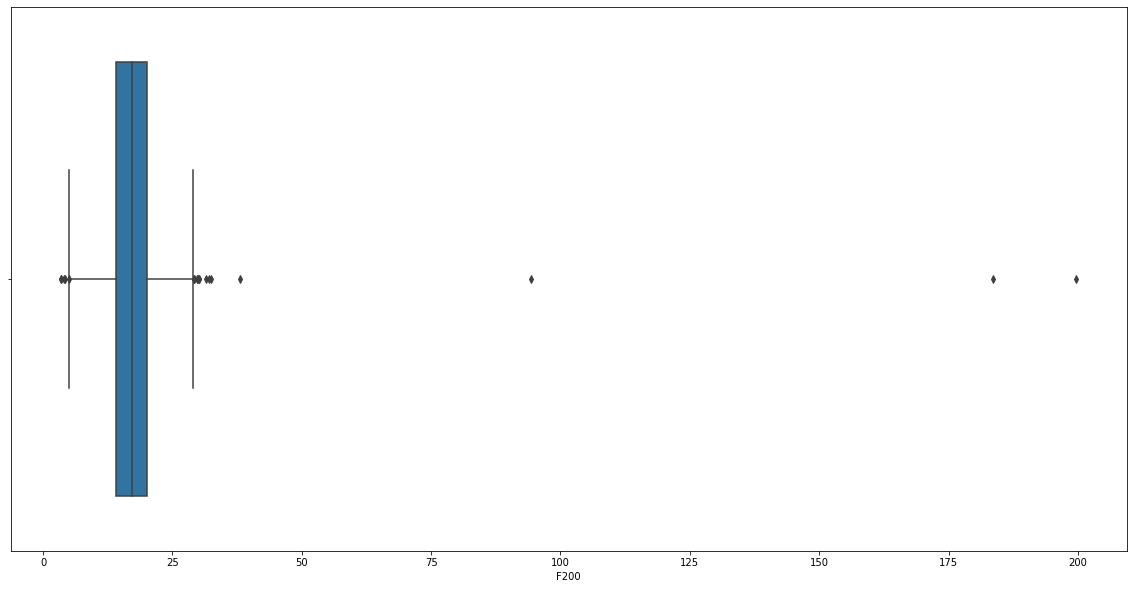

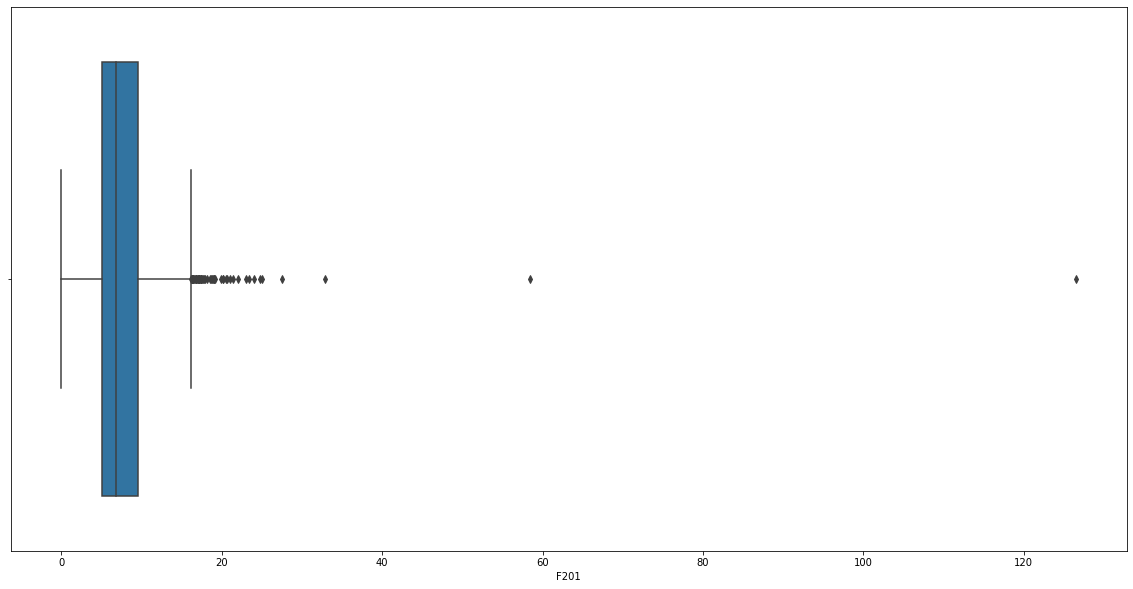

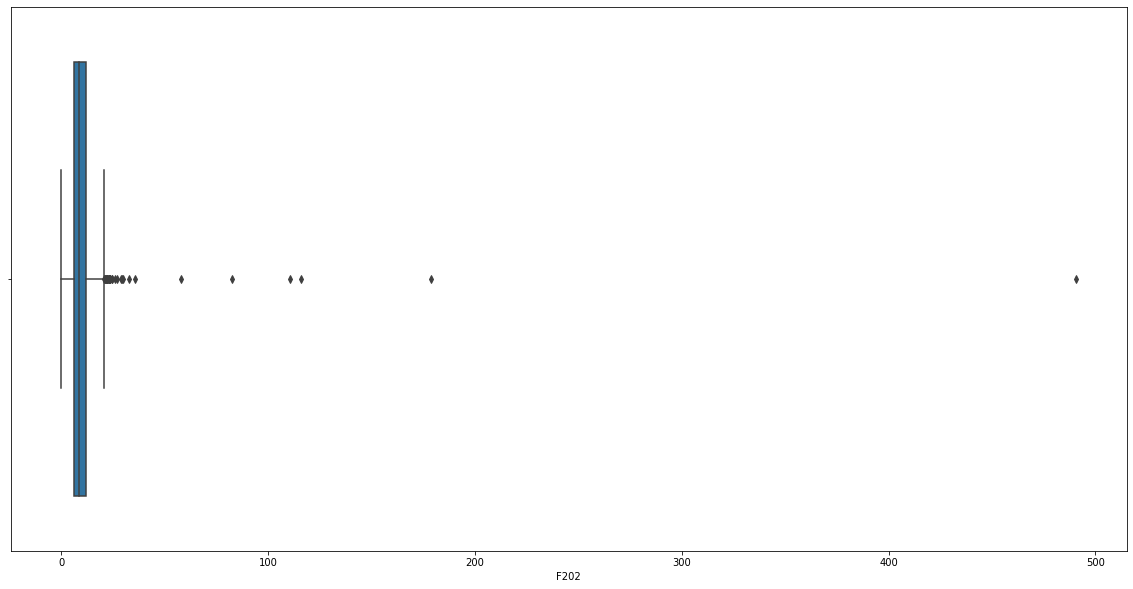

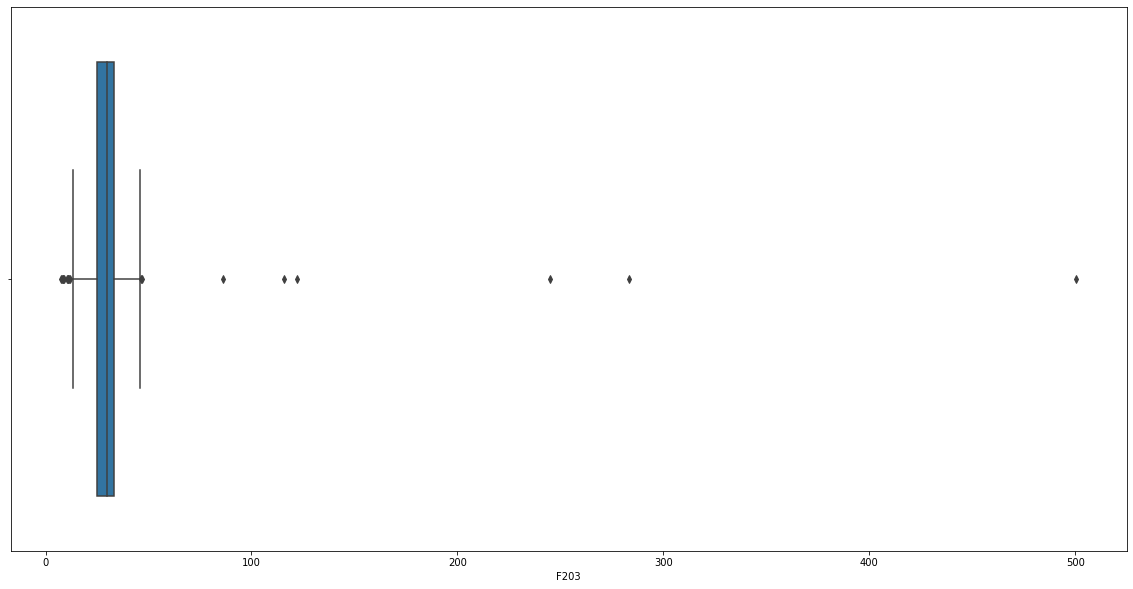

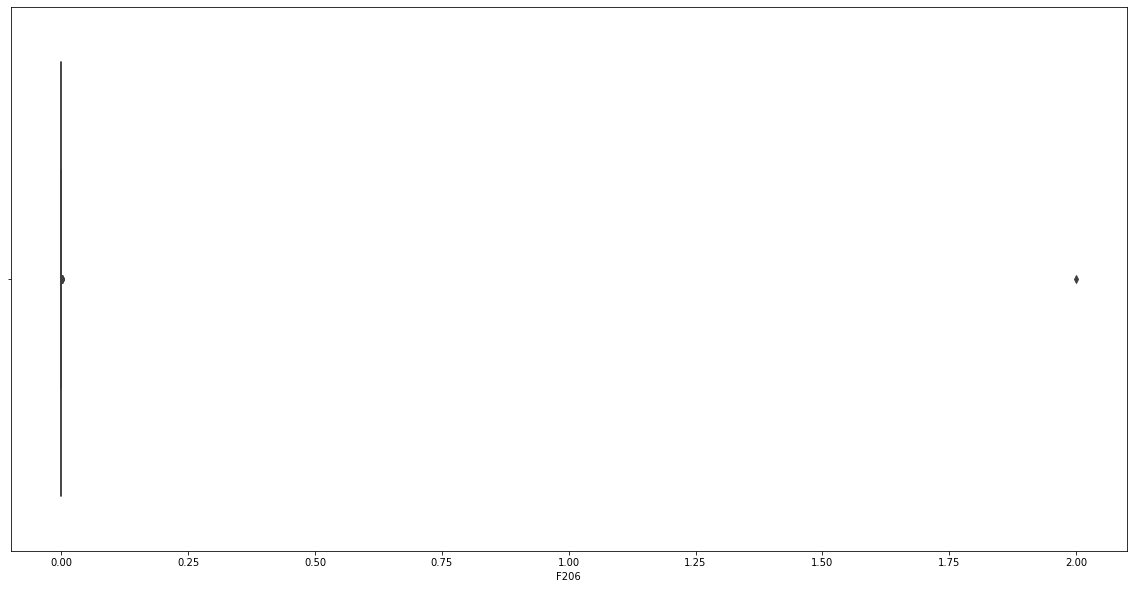

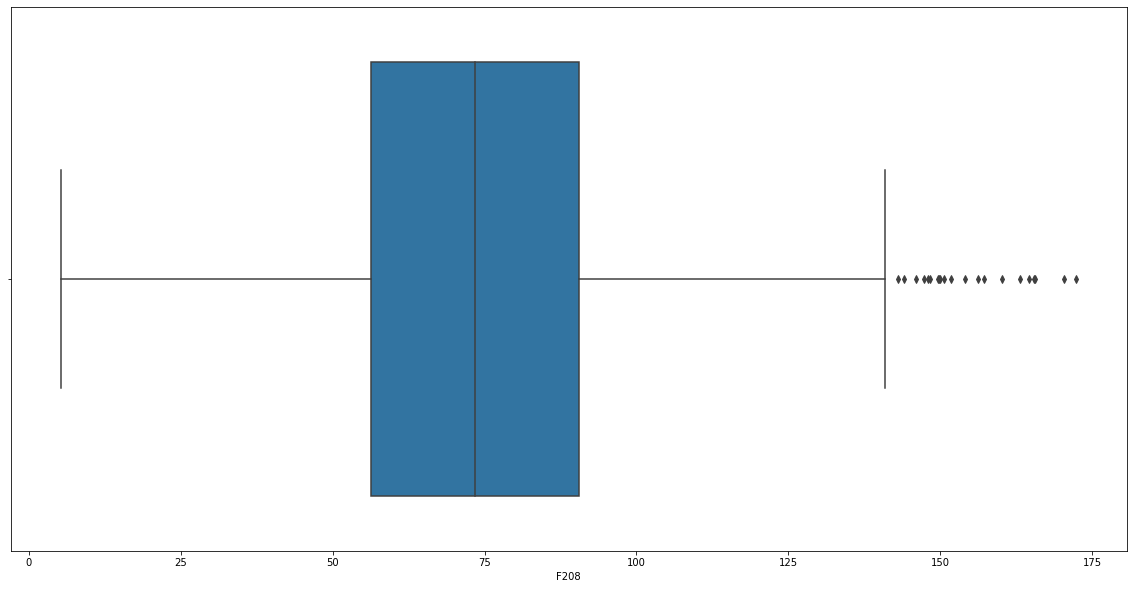

In [ ]:
no_pf = pass_data
del no_pf['Pass/Fail']

for i in no_pf:
    df = no_pf[i]
    sb.boxplot(x = df)
    plt.show()

In [ ]:
no_pf = fail_data
del no_pf['Pass/Fail']

for i in no_pf:
    df = no_pf[i]
    sb.boxplot(x = df)
    plt.show()
# fail과 pass를 합치는 방향으로 해보겠습니다

#### 2.5.2 이상치 보정

In [ ]:
# IQR 방법 (사분위를 활용)을 사용하여 이상치를 보정함
over_15 = []
w = 2
data_len = len(list(data_refine4.columns))

# 모든 Feature에 대해 확인이 필요하므로 함수를 사용함
def outlier(data, weight, over_list):
    
    for i in range(0, len(list(data_refine4.columns))):
        temp = data_refine4[list(data_refine4.columns)[i]]
        quantile_25 = np.percentile(temp.values, 25)
        quantile_75 = np.percentile(temp.values, 75)
        
        iqr = quantile_75 - quantile_25
        iqr_weight = iqr * weight
        min_val = quantile_25 - iqr_weight
        max_val = quantile_75 - iqr_weight

        outlier_index = list(temp[(temp < min_val) | (temp > max_val)].index)
        min_idx = list(temp[(temp < min_val)].index)
        max_idx = list(temp[(temp > max_val)].index)
        
        if(len(outlier_index) != 0):
            if(len(outlier_index) >= data_len * 0.15):
                over_list.append(list(data_refine4.columns)[i])
                over_list.append(list(outlier_index))
            
            for idx in range(0, len(min_idx)):
                data_refine4.loc[[min_idx[idx]],[list(data_refine4.columns)[i]]] = min_val
            
            for idx in range(0, len(max_idx)):
                data_refine4.loc[[ max_idx[idx]],[list(data_refine4.columns)[i]]] = max_val


In [ ]:
outlier(data_refine4, w, over_15)

밥먹고해야지

In [ ]:
fig, ax = plt.subplots(26, 15)
fig.set_size_inches((35, 22))

for var, subplot in zip(list_of_col, ax.flatten()):
    data_refine4[var].plot(kind='hist', ax=subplot, title=var, edgecolor='black')